# 1. Problem Definition

## 1.1. What is Residual Neural Network (ResNet)? [1]

Residual Learning was proposed as a methodology to address the Degradation Problem that occurs in conventional Neural Networks. This enabled the construction of networks with 152 layers, which was previously impossible with existing methodologies (VGGNet).

### 1.1.1. Degradation Problem

Naive Intuition:

As networks become deeper (as the number of layers increases), networks should be able to learn more features. Therefore, it was assumed that network performance would be proportional to the depth of the network (the number of layers).

Real World Issue:

Contrary to common intuition, it was discovered that networks with more than a certain number of layers show a sharp decline in performance after saturation. Some might refer to this situation as model overfitting. However, this problem cannot be simply dismissed as overfitting.

Difference between Overfitting and Degradation Problem:

> Overfitting: The model learns even the noise in the training data, minimizing training error but degrading generalization performance, leading to an increase in test error.

> Degradation Problem: A situation where a network with a deeper neural network exhibits higher training error than a shallower network.

The degradation problem refers to a situation where learning the training data itself is difficult. This is clearly a problem distinct from overfitting, which involves excessive learning of training data.

### 1.1.2. Residual Learning

Structural Solution:

If we add several layers to a shallow network $A$ to create a deep network $B$, and all added layers perform identity mapping, then $B$ can never perform worse than $A$.

Contradiction with Reality:

Despite the structural solution, the degradation problem still shows performance degradation. This means that the model's solvers have difficulty approximating identity mapping or exploring better solutions within time constraints.

Residual Learning Concept:

When the ideal mapping that multiple layers need to learn is $H(x)$, the authors set the assumption that learning the residual function $F(x) := H(x) - x$ would be easier than directly learning $H(x)$. The mapping $H(x)$ that layers should pursue can be expressed as $F(x) + x$, and based on this idea, the authors propose shortcut connection, which is the core of ResNet.

Why Residual Learning Works:

Let us assume a situation where layers need to learn identity mapping ($H(x) = x$):

- A plain network must directly learn $H(x)$ through numerous nonlinear combinations.
- Since ResNet uses residual functions, it only needs to learn such that $F(x) = 0$. Simply making all weights zero is a much simpler task than recreating $x$ complexly through multiple layers.

However, not all layers always learn identity mapping. Then why does this approach yield effective results? 

The paper assumes that $H(x)$, which layers need to find, would be better as $x$ rather than an initial value of $0$ that requires starting everything from scratch. Rather than completely modifying the input, slightly improving and adjusting the input is a more efficient way to approach the correct answer. Moreover, a simple residual function composed of addition does not introduce additional parameters or computational complexity.

Summary:

ResNet sets passing the input ($x$) as the default value and guides the model to learn only the necessary 'difference' ($F(x)$) to reach the correct answer.

## 1.2. Depth vs. Width [2]

### Depth

In deep learning research, network depth is considered one of the most important factors. This is because accuracy increases as depth increases.

At the time of its publication, ResNet was a model that achieved both low complexity and high accuracy by constructing 152 layers, which was at the SOTA level for image classification models.

However, the two factors, depth and accuracy, are not directly proportional. The higher the desired performance, the more depth is needed for a 1% accuracy improvement—sometimes requiring double the depth. The "cost" of increasing from 50% to 51% differs significantly from the "cost" of increasing from 98% to 99%. There is clearly a limit to performance improvement. This is called diminishing returns.

Additional Problems with Extreme Depth:

- Diminishing Feature Reuse: As networks become too deep, shortcut connections are "abused." Gradients bypass the layers that need learning through identity shortcuts, causing numerous layers to actually do nothing or drastically reduce their contribution to the final result.

- Computational Costs: These problems not only exponentially increase training time but also have the drawback of significantly increasing computational costs.

- Overfitting Risk: Additionally, for small datasets, networks that are too deep risk overfitting.

While ResNet successfully expanded network depth significantly, it conversely raised a new problem: the inefficiency of extreme depth.

### Width

Until now, we need to step away from one axis of expansion (depth) and examine another direction. Is increasing network depth the only solution? Even if a network is not deep, could a wide network sufficiently compensate for the reduced depth? WRN focuses on the opposite idea: width rather than depth.

## 1.3. What are Wide Residual Networks (WRN)? [2]

Wide Residual Networks (WRN), as the name suggests, are based on ResNet. The difference here is that they pursue wide and shallow networks, moving away from thin and deep networks.

### Understanding Width

We have already covered the concept of depth, but the concept of width is still unfamiliar. What does width mean here? 

It refers to the number of channels in the feature map produced by the conv3x3 layer inside a ResNet block. WRN introduces a widening factor $k$ that increases this output channel count by $k$ times.

How It Works:

Suppose a conv3 block of the original ResNet produces 32 output channels. This means 32 3D filters were used. The important point here is that one filter scans all channels of the input at once (e.g., if the previous layer's output was 16 channels, then 16 channels) to produce one output channel. This process is repeated with 32 different filters to produce 32 output channels. 

WRN increases the total number of these filters (32) by $k$ times. That is, if $k=10$, 320 filters are used to produce 320 output channels. This is the concept of increasing the expressive power so that one convolution layer extracts more features, while reducing the number of layers themselves (depth).

### Analogy: Toll Booth Example

Original ResNet (Thin Block):

- A 16-lane toll booth
- One such toll booth (block) can only distinguish and process 16 types of features (cars) at a time
- To perform more complex processing, 1000 such 16-lane toll booths had to be passed through in sequence (deeply)

WRN (Wide Block):

- A 160-lane toll booth (with widening factor $k=10$ applied)
- One such toll booth (block) can simultaneously distinguish and process 160 much more diverse and complex features
- The 'information processing capacity' or 'learning capability (expressive power)' of one block has become 10 times stronger

Conclusion:

The core of the WRN paper is that using 16 high-performance (strong) 160-lane blocks yields better results than using 1000 low-performance 16-lane blocks.

# 2. Dataset

## 2.1. Dataset Definition

This project selects CIFAR-10 [3] from the standard datasets suggested as examples in the guidelines.

* Selected Dataset: CIFAR-10 [3]
* Task: Image Classification across 10 classes
* Dataset Composition: The CIFAR-10 dataset consists of 60,000 color images, each with a resolution of 32×32 pixels. The dataset is divided into a training set of 50,000 images and a test set of 10,000 images, following the standard split. The dataset contains 10 mutually exclusive classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. Each class has 6,000 images (5,000 in the training set and 1,000 in the test set).
* Project Relevance: This dataset was chosen to explore the core research question of this project: "Which factor is more efficient for CNN performance—model depth or width?"

## 2.2. Dataset Selection Justification

1. Substantial Problem for Experimentation: This project aims to compare and analyze the "Thin & Deep" philosophy of ResNet [1] and the "Wide & Shallow" philosophy of WRN [2]. Both foundational papers used CIFAR-10 [3] as a primary experimental benchmark to validate their architectures. Therefore, CIFAR-10 is the most suitable and logical dataset for reproducing and analyzing this "substantial" research topic.

2. Experimental Design: This project must compare and analyze a "significant variation" relative to a baseline.
    * Baseline: ResNet [1] ("Thin & Deep")
    * Modified Model: WRN [2] ("Wide & Shallow")
    
## 2.3. Data Split & Preprocessing

### 2.3.1. Data Split

We follow the standard CIFAR-10 split, using 50,000 training images and 10,000 test images. From the training set, 10% (5,000 images) are separated as a validation set to monitor the model's generalization performance during training.

Actual Data Split:
* Training set: 45,000 images (90% of original training set)
* Validation set: 5,000 images (10% of original training set)
* Test set: 10,000 images (standard CIFAR-10 test set)
* Total: 60,000 images

Reproducibility Settings:
* Random seed: 42 (fixed for data splitting and all random operations)
* `torch.Generator().manual_seed(42)` is used to ensure identical data splits across runs

### 2.3.2. Data Preprocessing & Augmentation

To ensure a fair comparison between the two models (ResNet and WRN), we implement the standard augmentation techniques used in the WRN [2] paper.

Training Set Augmentation (applied in order):
1. Padding: 4-pixel padding with `padding_mode='reflect'` (reflects image boundaries for padding)
2. Random Horizontal Flip: Randomly flips images horizontally with 50% probability
3. Random Crop: Randomly crops 32×32 patches from the padded image
4. ToTensor: Converts PIL Image to Tensor (value range: [0, 1])
5. Normalization: Applies channel-wise normalization

Validation & Test Set Preprocessing:
* Only normalization is applied without augmentation (evaluating on original images)
* Applied in order: ToTensor → Normalization

Normalization Values:
* Standard CIFAR-10 normalization values are used (following WRN paper [2])
* Mean (RGB): [0.4914, 0.4824, 0.4467] (original: [125.3, 123.0, 113.9] / 255.0)
* Std (RGB): [0.2471, 0.2435, 0.2616] (original: [63.0, 62.1, 66.7] / 255.0)

### 2.3.3. DataLoader Configuration

Common Settings:
* Batch Size: 128
* Number of Workers: 4 (for parallel data loading)
* Pin Memory: True (for optimized GPU transfer)

Dataset-Specific Settings:
* Training DataLoader:
  * `shuffle=True` (shuffles data order at each epoch)
  * Total of 352 batches per epoch (45,000 / 128 ≈ 352)
  
* Validation DataLoader:
  * `shuffle=False` (fixed order for consistent evaluation)
  * Total of 40 batches (5,000 / 128 ≈ 40)
  
* Test DataLoader:
  * `shuffle=False` (fixed order for consistent evaluation)
  * Total of 79 batches (10,000 / 128 ≈ 79)

Implementation Details:
* The validation set is split from the original training set but uses a separate transform without augmentation.
* A `TransformDataset` class is implemented to apply different transforms specifically to the validation set.

In [ ]:
# Dataset
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# CIFAR-10 normalization values (from training set)
# These values are standard for CIFAR-10 preprocessing refer to WRN paper
mean = np.array([125.3, 123.0, 113.9]) / 255.0
std = np.array([63.0, 62.1, 66.7]) / 255.0

# Data augmentation for training set
# Following WRN paper: 4-pixel padding, random horizontal flip, random crop
train_transform = transforms.Compose([
    transforms.Pad(4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Transform for validation and test sets (only normalization)
val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load CIFAR-10 dataset
# Training set: 50,000 images
train_full_dataset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=train_transform
)

# Split training set: 45,000 for training, 5,000 for validation (10%)
train_size = 45000
val_size = 5000
train_dataset, val_dataset = random_split(
    train_full_dataset, 
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

# Update validation dataset transform (no augmentation)
# We need to create a new dataset with different transform
class TransformDataset(torch.utils.data.Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
    
    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y
    
    def __len__(self):
        return len(self.subset)

# Get the original dataset from the subset
val_subset = val_dataset.dataset
val_indices = val_dataset.indices

# Create validation dataset with val_test_transform
val_dataset_transformed = torch.utils.data.Subset(
    torchvision.datasets.CIFAR10(
        root='./data',
        train=True,
        download=False,
        transform=val_test_transform
    ),
    val_indices
)

# Test set: 10,000 images
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=val_test_transform
)

# Create DataLoaders
batch_size = 128
num_workers = 4

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset_transformed,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True
)

# Print dataset information
print("=" * 60)
print("CIFAR-10 Dataset Information")
print("=" * 60)
print(f"Training set: {len(train_dataset):,} images")
print(f"Validation set: {len(val_dataset_transformed):,} images")
print(f"Test set: {len(test_dataset):,} images")
print(f"Total: {len(train_dataset) + len(val_dataset_transformed) + len(test_dataset):,} images")
print(f"\nBatch size: {batch_size}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")
print(f"\nNormalization - Mean: {mean}")
print(f"Normalization - Std: {std}")
print("=" * 60)

# CIFAR-10 class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(f"\nClasses: {classes}")

Files already downloaded and verified
Files already downloaded and verified
CIFAR-10 Dataset Information
Training set: 45,000 images
Validation set: 5,000 images
Test set: 10,000 images
Total: 60,000 images

Batch size: 128
Number of training batches: 352
Number of validation batches: 40
Number of test batches: 79

Normalization - Mean: [0.49137255 0.48235294 0.44666667]
Normalization - Std: [0.24705882 0.24352941 0.26156863]

Classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# 3. Model Design & Implementation

To answer the core research question "Which factor is more important for CNN performance improvement—Depth or Width?", we compare three models by controlling the number of parameters as a controlled variable.

## 3.1. Common Residual Block Structure

For a fair comparison, all models adopt the Pre-Activation structure (BN-ReLU-Conv) proposed in the ResNet-v2 and WRN papers as the common Residual Block architecture. This structure is known to exhibit superior performance and training efficiency compared to the conventional Conv-BN-ReLU structure.

## 3.2. Baseline: ResNet-110

ResNet [1] addressed the vanishing gradient and degradation problems through Residual Learning, presenting a "depth"-centric architecture design. In this experiment, we adopt ResNet-110 as the baseline, representing the "depth" philosophy with a "deep and thin" model (parameters: approximately 1.7M, widening factor $k$: 1).

### 3.2.1. Network Structure

We utilize the standard ResNet-110 structure designed for the CIFAR-10 dataset. The depth of ResNet for CIFAR-10 is defined as follows:

$$depth = 6n + 2 = (6 \times 18 + 2) = 110$$

ResNet-110 is a network with $n=18$. The network consists of 3 stages (16, 32, 64 channels) after the conv1 layer, and each stage contains $n=18$, i.e., 18 Residual Blocks.

## 3.3. Variation Model: WRNs

WRN [2] points out that simply increasing depth is inefficient (diminishing feature reuse) and presents the perspective that increasing the width (number of channels) of ResNet Blocks may be more effective. Therefore, WRN is adopted as the representative model of the "width"-centric philosophy.

### 3.3.1. Variation 1: WRN-28-2

The core of this experiment is controlling the "parameter budget." We adopt WRN-28-2 as the first variation model, which has the most similar parameter count (approximately 1.5M) to the baseline ResNet-110 (approximately 1.7M) while clearly demonstrating the "width" philosophy.

Model Structure: WRN-28-2 has a total of 28 convolutional layers and a widening factor $k=2$.

Core Comparison: Through this design, we directly compare which model shows superior performance and efficiency under the same parameter budget of approximately 1.5M~1.7M: "ResNet with 110 layers/width factor 1" versus "WRN with 28 layers/width factor 2."

### 3.3.2. Variation 2: WRN-28-2 + Dropout

As the width of Residual Blocks increases (parameter increase), the risk of overfitting may also increase. To mitigate this, we insert Dropout into the Residual Blocks of the WRN-28-2 model, following the approach proposed in the WRN paper.

Model Structure: Dropout is positioned between the two Conv(3×3) layers inside the Residual Block (i.e., BN-ReLU-Conv-Dropout-BN-ReLU-Conv).

Experimental Purpose: This model allows us to verify whether the generalization performance of WRN-28-2 can be further improved.

## 3.3. Baseline Model(ResNet) Implementation





In [7]:
# ResNet-110
import torch
import torch.nn as nn
import torch.nn.functional as F


class PreActBlock(nn.Module):
    """Pre-Activation Residual Block (BN-ReLU-Conv)"""
    def __init__(self, in_channels, out_channels, stride=1):
        super(PreActBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        
        # Shortcut connection
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
        else:
            self.shortcut = nn.Identity()
    
    def forward(self, x):
        # Pre-activation: BN -> ReLU -> Conv
        out = F.relu(self.bn1(x))
        out = self.conv1(out)
        out = F.relu(self.bn2(out))
        out = self.conv2(out)
        return out + self.shortcut(x)


class ResNet110(nn.Module):
    """
    ResNet-110 for CIFAR-10
    Depth = 6n + 2 = 110, where n = 18
    Pre-Activation structure (BN-ReLU-Conv)
    """
    def __init__(self, num_classes=10):
        super(ResNet110, self).__init__()
        n = 18  # 6n + 2 = 110
        
        # First conv layer: 3 -> 16 channels
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        
        # Stage 1: 16 channels, 18 blocks (32x32)
        self.stage1 = self._make_layer(16, 16, n, stride=1)
        
        # Stage 2: 16 -> 32 channels, 18 blocks (16x16)
        self.stage2 = self._make_layer(16, 32, n, stride=2)
        
        # Stage 3: 32 -> 64 channels, 18 blocks (8x8)
        self.stage3 = self._make_layer(32, 64, n, stride=2)
        
        # Final BN and ReLU
        self.bn = nn.BatchNorm2d(64)
        
        # Global Average Pooling and FC
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)
        
        # Initialize weights
        self._initialize_weights()
    
    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        # First block may have stride > 1 or different channels
        layers.append(PreActBlock(in_channels, out_channels, stride))
        # Remaining blocks have same channels and stride=1
        for _ in range(1, num_blocks):
            layers.append(PreActBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        # First conv
        x = self.conv1(x)
        
        # Three stages
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        
        # Final BN, ReLU, and pooling
        x = F.relu(self.bn(x))
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x

In [15]:
# Create model instance
model_resnet = ResNet110(num_classes=10)
print(f"ResNet-110 model created")
print(f"Total parameters: {sum(p.numel() for p in model_resnet.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in model_resnet.parameters() if p.requires_grad):,}")

ResNet-110 model created
Total parameters: 1,730,522
Trainable parameters: 1,730,522


## 3.4. Modified Model(WRN) Implementation


In [6]:
# WRN-28-2
import torch
import torch.nn as nn
import torch.nn.functional as F


class WideBasicBlock(nn.Module):
    """Wide Residual Block with Pre-Activation structure"""
    def __init__(self, in_channels, out_channels, stride=1, dropout_rate=0.0):
        super(WideBasicBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout = nn.Dropout(dropout_rate) if dropout_rate > 0 else nn.Identity()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        
        # Shortcut connection
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
        else:
            self.shortcut = nn.Identity()
    
    def forward(self, x):
        # Pre-activation: BN -> ReLU -> Conv
        out = F.relu(self.bn1(x))
        out = self.conv1(out)
        
        # Second conv: BN -> ReLU -> [Dropout] -> Conv
        out = F.relu(self.bn2(out))
        out = self.dropout(out)
        out = self.conv2(out)
        
        # Shortcut connection
        if self.shortcut.__class__.__name__ != 'Identity':
            shortcut = self.shortcut(x)
        else:
            shortcut = x
        
        return out + shortcut


class WRN28_2(nn.Module):
    """
    Wide Residual Network-28-2 for CIFAR-10
    Depth = 6n + 4 = 28, where n = 4
    Widening factor k = 2
    Pre-Activation structure (BN-ReLU-Conv)
    """
    def __init__(self, num_classes=10, dropout_rate=0.0):
        super(WRN28_2, self).__init__()
        n = 4  # 6n + 4 = 28
        k = 2  # widening factor
        
        # First conv layer: 3 -> 16 channels
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        
        # Stage 1: 16 -> 32 channels (16*k), 4 blocks (32x32)
        self.stage1 = self._make_layer(16, 16 * k, n, stride=1, dropout_rate=dropout_rate)
        
        # Stage 2: 32 -> 64 channels (32*k), 4 blocks (16x16)
        self.stage2 = self._make_layer(16 * k, 32 * k, n, stride=2, dropout_rate=dropout_rate)
        
        # Stage 3: 64 -> 128 channels (64*k), 4 blocks (8x8)
        self.stage3 = self._make_layer(32 * k, 64 * k, n, stride=2, dropout_rate=dropout_rate)
        
        # Final BN and ReLU
        self.bn = nn.BatchNorm2d(64 * k)
        
        # Global Average Pooling and FC
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64 * k, num_classes)
        
        # Initialize weights
        self._initialize_weights()
    
    def _make_layer(self, in_channels, out_channels, num_blocks, stride, dropout_rate):
        layers = []
        # First block may have stride > 1 or different channels
        layers.append(WideBasicBlock(in_channels, out_channels, stride, dropout_rate))
        # Remaining blocks have same channels and stride=1
        for _ in range(1, num_blocks):
            layers.append(WideBasicBlock(out_channels, out_channels, stride=1, dropout_rate=dropout_rate))
        return nn.Sequential(*layers)
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        # First conv
        x = self.conv1(x)
        
        # Three stages
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        
        # Final BN, ReLU, and pooling
        x = F.relu(self.bn(x))
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x    

In [17]:
# Create WRN-28-2 model instance (without dropout)
model_wrn = WRN28_2(num_classes=10, dropout_rate=0.0)
print(f"WRN-28-2 model created (without dropout)")
print(f"Total parameters: {sum(p.numel() for p in model_wrn.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in model_wrn.parameters() if p.requires_grad):,}")

# WRN-28-2 + Dropout
# Create WRN-28-2 model instance with dropout (dropout_rate=0.3)
model_wrn_dropout = WRN28_2(num_classes=10, dropout_rate=0.3)
print(f"WRN-28-2 model created (with dropout=0.3)")
print(f"Total parameters: {sum(p.numel() for p in model_wrn_dropout.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in model_wrn_dropout.parameters() if p.requires_grad):,}")

WRN-28-2 model created (without dropout)
Total parameters: 1,467,610
Trainable parameters: 1,467,610
WRN-28-2 model created (with dropout=0.3)
Total parameters: 1,467,610
Trainable parameters: 1,467,610


## 3.5. Training Setup & Hyperparameters

To ensure a fair comparison, we apply identical training environments and hyperparameters to all models (ResNet-110, WRN-28-2, WRN-28-2 + Dropout). These settings follow the standard experimental configuration from the WRN paper [2].

### 3.5.1. Common Hyperparameters

Optimization Settings:
* Optimizer: SGD (Stochastic Gradient Descent) with Momentum
* Initial Learning Rate: 0.1
* Momentum: 0.9
* Weight Decay: 0.0005 (L2 regularization)
* Learning Rate Schedule: Multi-step decay
  * Starts with initial learning rate of 0.1
  * Learning rate is reduced by a factor of 0.2 at epochs 60, 120, and 160 (i.e., 0.1 → 0.02 → 0.004 → 0.0008)
  * This is the standard schedule proposed in the WRN paper

Training Settings:
* Batch Size: 128
* Total Epochs: 200
  * Follows the standard setting from the WRN paper [2]
  * The ResNet paper [1] used 64k iterations (approximately 164 epochs), but we unify to 200 epochs for fair comparison with WRN
  * With training set of 45,000 samples and batch size 128: 1 epoch ≈ 352 iterations, 200 epochs ≈ 70,400 iterations
* Loss Function: Cross Entropy Loss
* Random Seed: 42 (fixed for reproducibility)

Data Loading:
* Number of Workers: 4 (for parallel data loading)
* Pin Memory: True (for optimized GPU transfer)

### 3.5.2. Model-Specific Settings

WRN-28-2 + Dropout:
* Dropout Rate: 0.3
* Dropout is applied before the second Conv layer inside the WideBasicBlock (BN-ReLU-Dropout-Conv structure)

ResNet-110 & WRN-28-2 (baseline):
* No dropout is used

### 3.5.3. Training Process

1. Validation Monitoring: Performance is evaluated on the validation set at each epoch to monitor the model's generalization performance.
2. Early Stopping: Early stopping may be considered if validation loss does not improve for a certain number of epochs (optional).
3. Model Checkpointing: The model with the best validation performance is saved.

### 3.5.4. Rationale for Hyperparameter Selection

These hyperparameter settings were selected for the following reasons:

1. Paper Reproducibility: Follows the standard settings used in CIFAR-10 experiments from both the WRN paper [2] and ResNet paper [1].
2. Fair Comparison: Applying identical hyperparameters to all models allows us to compare only the differences in model architectures.
3. Validated Settings: These settings are widely used for CIFAR-10 and ensure validated performance.

# 4. Evaluation & Analysis

## 4.1. Training Models

In [18]:
# Training
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from tqdm import tqdm
import os
import json
from datetime import datetime

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Training hyperparameters (from section 3.5)
initial_lr = 0.1
momentum = 0.9
weight_decay = 0.0005
num_epochs = 200
lr_decay_epochs = [60, 120, 160]
lr_decay_ratio = 0.2

# Models to train
models_config = [
    {
        'name': 'ResNet-110',
        'model': model_resnet,
        'save_dir': './checkpoints/resnet110'
    },
    {
        'name': 'WRN-28-2',
        'model': model_wrn,
        'save_dir': './checkpoints/wrn28_2'
    },
    {
        'name': 'WRN-28-2-Dropout',
        'model': model_wrn_dropout,
        'save_dir': './checkpoints/wrn28_2_dropout'
    }
]

def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    pbar = tqdm(train_loader, desc='Training', leave=False)
    for inputs, targets in pbar:
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        # Update progress bar
        pbar.set_postfix({
            'loss': f'{running_loss/(pbar.n+1):.4f}',
            'acc': f'{100.*correct/total:.2f}%'
        })
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

def validate(model, val_loader, criterion, device):
    """Validate the model"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation', leave=False)
        for inputs, targets in pbar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            pbar.set_postfix({
                'loss': f'{running_loss/(pbar.n+1):.4f}',
                'acc': f'{100.*correct/total:.2f}%'
            })
    
    epoch_loss = running_loss / len(val_loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

def train_model(model_config, train_loader, val_loader, device):
    """Train a single model"""
    model_name = model_config['name']
    model = model_config['model']
    save_dir = model_config['save_dir']
    
    # Create save directory
    os.makedirs(save_dir, exist_ok=True)
    
    # Move model to device
    model = model.to(device)
    
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(
        model.parameters(),
        lr=initial_lr,
        momentum=momentum,
        weight_decay=weight_decay
    )
    
    # Learning rate scheduler (multi-step decay)
    scheduler = MultiStepLR(optimizer, milestones=lr_decay_epochs, gamma=lr_decay_ratio)
    
    # Training history
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
        'lr': []
    }
    
    best_val_acc = 0.0
    best_epoch = 0
    
    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}")
    print(f"Total parameters: {sum(p.numel() for p in model.parameters()):,}")
    print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
    print(f"{'='*60}\n")
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs} (LR: {optimizer.param_groups[0]['lr']:.6f})")
        
        # Train
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        
        # Validate
        val_loss, val_acc = validate(model, val_loader, criterion, device)
        
        # Update learning rate
        scheduler.step()
        
        # Save history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['lr'].append(optimizer.param_groups[0]['lr'])
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_epoch = epoch + 1
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'val_acc': val_acc,
                'val_loss': val_loss,
                'train_acc': train_acc,
                'train_loss': train_loss,
            }, os.path.join(save_dir, 'best_model.pth'))
        
        # Print epoch summary
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}% | "
              f"Best Val Acc: {best_val_acc:.2f}% (Epoch {best_epoch})")
        print("-" * 60)
        
        # Save checkpoint every 20 epochs
        if (epoch + 1) % 20 == 0:
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'val_acc': val_acc,
                'val_loss': val_loss,
                'train_acc': train_acc,
                'train_loss': train_loss,
                'history': history
            }, os.path.join(save_dir, f'checkpoint_epoch_{epoch+1}.pth'))
    
    # Save final model and history
    torch.save({
        'epoch': num_epochs,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'val_acc': val_acc,
        'val_loss': val_loss,
        'train_acc': train_acc,
        'train_loss': train_loss,
        'history': history
    }, os.path.join(save_dir, 'final_model.pth'))
    
    # Save training history as JSON
    with open(os.path.join(save_dir, 'training_history.json'), 'w') as f:
        json.dump(history, f, indent=2)
    
    print(f"\n{'='*60}")
    print(f"Training completed for {model_name}")
    print(f"Best Validation Accuracy: {best_val_acc:.2f}% (Epoch {best_epoch})")
    print(f"Final Validation Accuracy: {val_acc:.2f}%")
    print(f"Results saved to: {save_dir}")
    print(f"{'='*60}\n")
    
    return history, best_val_acc

# Train all models
print("="*60)
print("Starting Training for All Models")
print("="*60)
print(f"Training Configuration:")
print(f"  - Initial Learning Rate: {initial_lr}")
print(f"  - Momentum: {momentum}")
print(f"  - Weight Decay: {weight_decay}")
print(f"  - Total Epochs: {num_epochs}")
print(f"  - LR Decay Epochs: {lr_decay_epochs}")
print(f"  - LR Decay Ratio: {lr_decay_ratio}")
print(f"  - Device: {device}")
print("="*60)

# Store results for all models
all_results = {}

for model_config in models_config:
    history, best_val_acc = train_model(model_config, train_loader, val_loader, device)
    all_results[model_config['name']] = {
        'best_val_acc': best_val_acc,
        'final_val_acc': history['val_acc'][-1],
        'final_train_acc': history['train_acc'][-1]
    }

# Print summary
print("\n" + "="*60)
print("Training Summary")
print("="*60)
for model_name, results in all_results.items():
    print(f"{model_name}:")
    print(f"  Best Val Acc: {results['best_val_acc']:.2f}%")
    print(f"  Final Val Acc: {results['final_val_acc']:.2f}%")
    print(f"  Final Train Acc: {results['final_train_acc']:.2f}%")
    print()
print("="*60)


Using device: cuda
Starting Training for All Models
Training Configuration:
  - Initial Learning Rate: 0.1
  - Momentum: 0.9
  - Weight Decay: 0.0005
  - Total Epochs: 200
  - LR Decay Epochs: [60, 120, 160]
  - LR Decay Ratio: 0.2
  - Device: cuda

Training ResNet-110
Total parameters: 1,730,522
Trainable parameters: 1,730,522

Epoch 1/200 (LR: 0.100000)


Train Loss: 1.5882, Train Acc: 40.29% | Val Loss: 1.6965, Val Acc: 40.46% | Best Val Acc: 40.46% (Epoch 1)
------------------------------------------------------------
Epoch 2/200 (LR: 0.100000)


Train Loss: 1.1207, Train Acc: 59.54% | Val Loss: 1.7682, Val Acc: 46.34% | Best Val Acc: 46.34% (Epoch 2)
------------------------------------------------------------
Epoch 3/200 (LR: 0.100000)


Train Loss: 0.9353, Train Acc: 66.80% | Val Loss: 0.9517, Val Acc: 67.02% | Best Val Acc: 67.02% (Epoch 3)
------------------------------------------------------------
Epoch 4/200 (LR: 0.100000)


Train Loss: 0.8167, Train Acc: 71.24% | Val Loss: 1.0804, Val Acc: 63.98% | Best Val Acc: 67.02% (Epoch 3)
------------------------------------------------------------
Epoch 5/200 (LR: 0.100000)


Train Loss: 0.7196, Train Acc: 74.84% | Val Loss: 0.7647, Val Acc: 73.44% | Best Val Acc: 73.44% (Epoch 5)
------------------------------------------------------------
Epoch 6/200 (LR: 0.100000)


Train Loss: 0.6608, Train Acc: 77.24% | Val Loss: 1.0902, Val Acc: 64.10% | Best Val Acc: 73.44% (Epoch 5)
------------------------------------------------------------
Epoch 7/200 (LR: 0.100000)


Train Loss: 0.6229, Train Acc: 78.56% | Val Loss: 0.8093, Val Acc: 72.44% | Best Val Acc: 73.44% (Epoch 5)
------------------------------------------------------------
Epoch 8/200 (LR: 0.100000)


Train Loss: 0.5991, Train Acc: 79.26% | Val Loss: 1.1643, Val Acc: 62.60% | Best Val Acc: 73.44% (Epoch 5)
------------------------------------------------------------
Epoch 9/200 (LR: 0.100000)


Train Loss: 0.5835, Train Acc: 79.94% | Val Loss: 0.6326, Val Acc: 78.32% | Best Val Acc: 78.32% (Epoch 9)
------------------------------------------------------------
Epoch 10/200 (LR: 0.100000)


Train Loss: 0.5590, Train Acc: 80.59% | Val Loss: 0.6806, Val Acc: 76.56% | Best Val Acc: 78.32% (Epoch 9)
------------------------------------------------------------
Epoch 11/200 (LR: 0.100000)


Train Loss: 0.5485, Train Acc: 81.07% | Val Loss: 0.7415, Val Acc: 76.12% | Best Val Acc: 78.32% (Epoch 9)
------------------------------------------------------------
Epoch 12/200 (LR: 0.100000)


Train Loss: 0.5357, Train Acc: 81.63% | Val Loss: 0.7751, Val Acc: 75.00% | Best Val Acc: 78.32% (Epoch 9)
------------------------------------------------------------
Epoch 13/200 (LR: 0.100000)


Train Loss: 0.5239, Train Acc: 82.01% | Val Loss: 0.7009, Val Acc: 76.18% | Best Val Acc: 78.32% (Epoch 9)
------------------------------------------------------------
Epoch 14/200 (LR: 0.100000)


Train Loss: 0.5122, Train Acc: 82.61% | Val Loss: 0.5390, Val Acc: 80.88% | Best Val Acc: 80.88% (Epoch 14)
------------------------------------------------------------
Epoch 15/200 (LR: 0.100000)


Train Loss: 0.5005, Train Acc: 82.98% | Val Loss: 0.6678, Val Acc: 78.06% | Best Val Acc: 80.88% (Epoch 14)
------------------------------------------------------------
Epoch 16/200 (LR: 0.100000)


Train Loss: 0.5017, Train Acc: 82.80% | Val Loss: 0.6421, Val Acc: 77.92% | Best Val Acc: 80.88% (Epoch 14)
------------------------------------------------------------
Epoch 17/200 (LR: 0.100000)


Train Loss: 0.4838, Train Acc: 83.49% | Val Loss: 0.5469, Val Acc: 81.18% | Best Val Acc: 81.18% (Epoch 17)
------------------------------------------------------------
Epoch 18/200 (LR: 0.100000)


Train Loss: 0.4833, Train Acc: 83.50% | Val Loss: 0.5559, Val Acc: 79.80% | Best Val Acc: 81.18% (Epoch 17)
------------------------------------------------------------
Epoch 19/200 (LR: 0.100000)


Train Loss: 0.4694, Train Acc: 83.81% | Val Loss: 0.5262, Val Acc: 81.62% | Best Val Acc: 81.62% (Epoch 19)
------------------------------------------------------------
Epoch 20/200 (LR: 0.100000)


Train Loss: 0.4667, Train Acc: 83.93% | Val Loss: 0.5169, Val Acc: 82.18% | Best Val Acc: 82.18% (Epoch 20)
------------------------------------------------------------
Epoch 21/200 (LR: 0.100000)


Train Loss: 0.4665, Train Acc: 84.11% | Val Loss: 0.9469, Val Acc: 69.72% | Best Val Acc: 82.18% (Epoch 20)
------------------------------------------------------------
Epoch 22/200 (LR: 0.100000)


Train Loss: 0.4522, Train Acc: 84.63% | Val Loss: 0.5030, Val Acc: 82.22% | Best Val Acc: 82.22% (Epoch 22)
------------------------------------------------------------
Epoch 23/200 (LR: 0.100000)


Train Loss: 0.4496, Train Acc: 84.60% | Val Loss: 0.5155, Val Acc: 81.96% | Best Val Acc: 82.22% (Epoch 22)
------------------------------------------------------------
Epoch 24/200 (LR: 0.100000)


Train Loss: 0.4485, Train Acc: 84.62% | Val Loss: 0.5504, Val Acc: 80.70% | Best Val Acc: 82.22% (Epoch 22)
------------------------------------------------------------
Epoch 25/200 (LR: 0.100000)


Train Loss: 0.4411, Train Acc: 84.85% | Val Loss: 0.6350, Val Acc: 79.02% | Best Val Acc: 82.22% (Epoch 22)
------------------------------------------------------------
Epoch 26/200 (LR: 0.100000)


Train Loss: 0.4326, Train Acc: 85.26% | Val Loss: 0.6215, Val Acc: 78.60% | Best Val Acc: 82.22% (Epoch 22)
------------------------------------------------------------
Epoch 27/200 (LR: 0.100000)


Train Loss: 0.4345, Train Acc: 85.28% | Val Loss: 0.6347, Val Acc: 78.76% | Best Val Acc: 82.22% (Epoch 22)
------------------------------------------------------------
Epoch 28/200 (LR: 0.100000)


Train Loss: 0.4315, Train Acc: 85.30% | Val Loss: 0.5769, Val Acc: 80.16% | Best Val Acc: 82.22% (Epoch 22)
------------------------------------------------------------
Epoch 29/200 (LR: 0.100000)


Train Loss: 0.4205, Train Acc: 85.66% | Val Loss: 0.5926, Val Acc: 79.56% | Best Val Acc: 82.22% (Epoch 22)
------------------------------------------------------------
Epoch 30/200 (LR: 0.100000)


Train Loss: 0.4314, Train Acc: 85.23% | Val Loss: 0.5434, Val Acc: 82.46% | Best Val Acc: 82.46% (Epoch 30)
------------------------------------------------------------
Epoch 31/200 (LR: 0.100000)


Train Loss: 0.4313, Train Acc: 85.50% | Val Loss: 0.5199, Val Acc: 81.86% | Best Val Acc: 82.46% (Epoch 30)
------------------------------------------------------------
Epoch 32/200 (LR: 0.100000)


Train Loss: 0.4254, Train Acc: 85.44% | Val Loss: 0.6051, Val Acc: 79.76% | Best Val Acc: 82.46% (Epoch 30)
------------------------------------------------------------
Epoch 33/200 (LR: 0.100000)


Train Loss: 0.4220, Train Acc: 85.63% | Val Loss: 0.4151, Val Acc: 85.12% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 34/200 (LR: 0.100000)


Train Loss: 0.4117, Train Acc: 85.89% | Val Loss: 0.5386, Val Acc: 81.68% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 35/200 (LR: 0.100000)


Train Loss: 0.4164, Train Acc: 85.67% | Val Loss: 0.6139, Val Acc: 79.68% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 36/200 (LR: 0.100000)


Train Loss: 0.4106, Train Acc: 85.92% | Val Loss: 0.4858, Val Acc: 82.96% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 37/200 (LR: 0.100000)


Train Loss: 0.4036, Train Acc: 86.09% | Val Loss: 0.5317, Val Acc: 81.74% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 38/200 (LR: 0.100000)


Train Loss: 0.4105, Train Acc: 86.16% | Val Loss: 0.7366, Val Acc: 76.00% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 39/200 (LR: 0.100000)


Train Loss: 0.4059, Train Acc: 86.06% | Val Loss: 0.6188, Val Acc: 78.72% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 40/200 (LR: 0.100000)


Train Loss: 0.4085, Train Acc: 85.97% | Val Loss: 0.6798, Val Acc: 78.24% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 41/200 (LR: 0.100000)


Train Loss: 0.4088, Train Acc: 86.03% | Val Loss: 0.5727, Val Acc: 80.88% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 42/200 (LR: 0.100000)


Train Loss: 0.4011, Train Acc: 86.24% | Val Loss: 0.5268, Val Acc: 81.86% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 43/200 (LR: 0.100000)


Train Loss: 0.4059, Train Acc: 86.07% | Val Loss: 0.4752, Val Acc: 82.70% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 44/200 (LR: 0.100000)


Train Loss: 0.4087, Train Acc: 86.00% | Val Loss: 0.5334, Val Acc: 81.46% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 45/200 (LR: 0.100000)


Train Loss: 0.4034, Train Acc: 86.17% | Val Loss: 0.5034, Val Acc: 83.26% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 46/200 (LR: 0.100000)


Train Loss: 0.3948, Train Acc: 86.51% | Val Loss: 0.4666, Val Acc: 84.10% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 47/200 (LR: 0.100000)


Train Loss: 0.4038, Train Acc: 86.11% | Val Loss: 0.4769, Val Acc: 83.04% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 48/200 (LR: 0.100000)


Train Loss: 0.3948, Train Acc: 86.54% | Val Loss: 0.4975, Val Acc: 82.46% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 49/200 (LR: 0.100000)


Train Loss: 0.3944, Train Acc: 86.54% | Val Loss: 0.6558, Val Acc: 78.26% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 50/200 (LR: 0.100000)


Train Loss: 0.3953, Train Acc: 86.61% | Val Loss: 0.5411, Val Acc: 81.58% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 51/200 (LR: 0.100000)


Train Loss: 0.4031, Train Acc: 86.15% | Val Loss: 0.7042, Val Acc: 76.74% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 52/200 (LR: 0.100000)


Train Loss: 0.3914, Train Acc: 86.58% | Val Loss: 0.7353, Val Acc: 76.66% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 53/200 (LR: 0.100000)


Train Loss: 0.3931, Train Acc: 86.42% | Val Loss: 0.4813, Val Acc: 83.74% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 54/200 (LR: 0.100000)


Train Loss: 0.3892, Train Acc: 86.70% | Val Loss: 0.5802, Val Acc: 80.16% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 55/200 (LR: 0.100000)


Train Loss: 0.3922, Train Acc: 86.38% | Val Loss: 0.6891, Val Acc: 77.46% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 56/200 (LR: 0.100000)


Train Loss: 0.3878, Train Acc: 86.60% | Val Loss: 0.4881, Val Acc: 83.22% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 57/200 (LR: 0.100000)


Train Loss: 0.3918, Train Acc: 86.65% | Val Loss: 0.5557, Val Acc: 81.18% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 58/200 (LR: 0.100000)


Train Loss: 0.3950, Train Acc: 86.42% | Val Loss: 0.4773, Val Acc: 83.58% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 59/200 (LR: 0.100000)


Train Loss: 0.3846, Train Acc: 86.88% | Val Loss: 0.5174, Val Acc: 81.98% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 60/200 (LR: 0.100000)


Train Loss: 0.3868, Train Acc: 86.82% | Val Loss: 0.8026, Val Acc: 75.50% | Best Val Acc: 85.12% (Epoch 33)
------------------------------------------------------------
Epoch 61/200 (LR: 0.020000)


Train Loss: 0.2289, Train Acc: 92.32% | Val Loss: 0.2240, Val Acc: 91.84% | Best Val Acc: 91.84% (Epoch 61)
------------------------------------------------------------
Epoch 62/200 (LR: 0.020000)


Train Loss: 0.1850, Train Acc: 93.72% | Val Loss: 0.2293, Val Acc: 91.88% | Best Val Acc: 91.88% (Epoch 62)
------------------------------------------------------------
Epoch 63/200 (LR: 0.020000)


Train Loss: 0.1671, Train Acc: 94.33% | Val Loss: 0.2271, Val Acc: 92.04% | Best Val Acc: 92.04% (Epoch 63)
------------------------------------------------------------
Epoch 64/200 (LR: 0.020000)


Train Loss: 0.1557, Train Acc: 94.68% | Val Loss: 0.2202, Val Acc: 92.30% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 65/200 (LR: 0.020000)


Train Loss: 0.1486, Train Acc: 94.97% | Val Loss: 0.2469, Val Acc: 91.32% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 66/200 (LR: 0.020000)


Train Loss: 0.1501, Train Acc: 94.84% | Val Loss: 0.2403, Val Acc: 91.28% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 67/200 (LR: 0.020000)


Train Loss: 0.1475, Train Acc: 95.02% | Val Loss: 0.2381, Val Acc: 91.72% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 68/200 (LR: 0.020000)


Train Loss: 0.1406, Train Acc: 95.22% | Val Loss: 0.2669, Val Acc: 91.06% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 69/200 (LR: 0.020000)


Train Loss: 0.1421, Train Acc: 95.12% | Val Loss: 0.2557, Val Acc: 91.24% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 70/200 (LR: 0.020000)


Train Loss: 0.1404, Train Acc: 95.15% | Val Loss: 0.2615, Val Acc: 90.90% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 71/200 (LR: 0.020000)


Train Loss: 0.1434, Train Acc: 94.93% | Val Loss: 0.2845, Val Acc: 90.42% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 72/200 (LR: 0.020000)


Train Loss: 0.1490, Train Acc: 94.78% | Val Loss: 0.2849, Val Acc: 90.50% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 73/200 (LR: 0.020000)


Train Loss: 0.1401, Train Acc: 95.11% | Val Loss: 0.3210, Val Acc: 89.90% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 74/200 (LR: 0.020000)


Train Loss: 0.1445, Train Acc: 94.98% | Val Loss: 0.3037, Val Acc: 89.94% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 75/200 (LR: 0.020000)


Train Loss: 0.1459, Train Acc: 95.03% | Val Loss: 0.2786, Val Acc: 90.44% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 76/200 (LR: 0.020000)


Train Loss: 0.1405, Train Acc: 95.18% | Val Loss: 0.2796, Val Acc: 90.60% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 77/200 (LR: 0.020000)


Train Loss: 0.1465, Train Acc: 95.03% | Val Loss: 0.2915, Val Acc: 90.54% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 78/200 (LR: 0.020000)


Train Loss: 0.1481, Train Acc: 94.82% | Val Loss: 0.2554, Val Acc: 91.46% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 79/200 (LR: 0.020000)


Train Loss: 0.1478, Train Acc: 94.80% | Val Loss: 0.2721, Val Acc: 91.06% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 80/200 (LR: 0.020000)


Train Loss: 0.1423, Train Acc: 95.14% | Val Loss: 0.2491, Val Acc: 91.68% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 81/200 (LR: 0.020000)


Train Loss: 0.1462, Train Acc: 94.92% | Val Loss: 0.2696, Val Acc: 91.00% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 82/200 (LR: 0.020000)


Train Loss: 0.1411, Train Acc: 95.20% | Val Loss: 0.2523, Val Acc: 91.66% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 83/200 (LR: 0.020000)


Train Loss: 0.1416, Train Acc: 95.18% | Val Loss: 0.2970, Val Acc: 90.36% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 84/200 (LR: 0.020000)


Train Loss: 0.1459, Train Acc: 95.05% | Val Loss: 0.2803, Val Acc: 90.58% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 85/200 (LR: 0.020000)


Train Loss: 0.1429, Train Acc: 95.14% | Val Loss: 0.2775, Val Acc: 90.66% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 86/200 (LR: 0.020000)


Train Loss: 0.1430, Train Acc: 95.12% | Val Loss: 0.3187, Val Acc: 89.76% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 87/200 (LR: 0.020000)


Train Loss: 0.1397, Train Acc: 95.30% | Val Loss: 0.3363, Val Acc: 89.26% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 88/200 (LR: 0.020000)


Train Loss: 0.1419, Train Acc: 95.19% | Val Loss: 0.2833, Val Acc: 90.54% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 89/200 (LR: 0.020000)


Train Loss: 0.1392, Train Acc: 95.20% | Val Loss: 0.3278, Val Acc: 89.40% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 90/200 (LR: 0.020000)


Train Loss: 0.1430, Train Acc: 95.05% | Val Loss: 0.2962, Val Acc: 90.20% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 91/200 (LR: 0.020000)


Train Loss: 0.1418, Train Acc: 95.17% | Val Loss: 0.2951, Val Acc: 90.56% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 92/200 (LR: 0.020000)


Train Loss: 0.1412, Train Acc: 95.24% | Val Loss: 0.3329, Val Acc: 88.62% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 93/200 (LR: 0.020000)


Train Loss: 0.1418, Train Acc: 95.09% | Val Loss: 0.3137, Val Acc: 89.40% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 94/200 (LR: 0.020000)


Train Loss: 0.1397, Train Acc: 95.31% | Val Loss: 0.2785, Val Acc: 90.90% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 95/200 (LR: 0.020000)


Train Loss: 0.1343, Train Acc: 95.35% | Val Loss: 0.2542, Val Acc: 90.88% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 96/200 (LR: 0.020000)


Train Loss: 0.1406, Train Acc: 95.18% | Val Loss: 0.3696, Val Acc: 88.56% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 97/200 (LR: 0.020000)


Train Loss: 0.1363, Train Acc: 95.43% | Val Loss: 0.3190, Val Acc: 90.56% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 98/200 (LR: 0.020000)


Train Loss: 0.1375, Train Acc: 95.28% | Val Loss: 0.2891, Val Acc: 90.30% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 99/200 (LR: 0.020000)


Train Loss: 0.1389, Train Acc: 95.21% | Val Loss: 0.2861, Val Acc: 90.16% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 100/200 (LR: 0.020000)


Train Loss: 0.1328, Train Acc: 95.51% | Val Loss: 0.2965, Val Acc: 90.56% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 101/200 (LR: 0.020000)


Train Loss: 0.1300, Train Acc: 95.51% | Val Loss: 0.2556, Val Acc: 91.44% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 102/200 (LR: 0.020000)


Train Loss: 0.1324, Train Acc: 95.43% | Val Loss: 0.3091, Val Acc: 89.68% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 103/200 (LR: 0.020000)


Train Loss: 0.1339, Train Acc: 95.40% | Val Loss: 0.2850, Val Acc: 90.42% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 104/200 (LR: 0.020000)


Train Loss: 0.1285, Train Acc: 95.63% | Val Loss: 0.2974, Val Acc: 90.00% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 105/200 (LR: 0.020000)


Train Loss: 0.1356, Train Acc: 95.34% | Val Loss: 0.2809, Val Acc: 90.88% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 106/200 (LR: 0.020000)


Train Loss: 0.1337, Train Acc: 95.40% | Val Loss: 0.3512, Val Acc: 89.00% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 107/200 (LR: 0.020000)


Train Loss: 0.1294, Train Acc: 95.50% | Val Loss: 0.2948, Val Acc: 90.36% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 108/200 (LR: 0.020000)


Train Loss: 0.1301, Train Acc: 95.59% | Val Loss: 0.2883, Val Acc: 90.22% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 109/200 (LR: 0.020000)


Train Loss: 0.1339, Train Acc: 95.33% | Val Loss: 0.3566, Val Acc: 88.90% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 110/200 (LR: 0.020000)


Train Loss: 0.1329, Train Acc: 95.45% | Val Loss: 0.2639, Val Acc: 91.02% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 111/200 (LR: 0.020000)


Train Loss: 0.1295, Train Acc: 95.52% | Val Loss: 0.3207, Val Acc: 89.14% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 112/200 (LR: 0.020000)


Train Loss: 0.1301, Train Acc: 95.62% | Val Loss: 0.3180, Val Acc: 89.82% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 113/200 (LR: 0.020000)


Train Loss: 0.1292, Train Acc: 95.55% | Val Loss: 0.2930, Val Acc: 90.18% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 114/200 (LR: 0.020000)


Train Loss: 0.1285, Train Acc: 95.59% | Val Loss: 0.3195, Val Acc: 89.58% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 115/200 (LR: 0.020000)


Train Loss: 0.1245, Train Acc: 95.81% | Val Loss: 0.2966, Val Acc: 90.46% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 116/200 (LR: 0.020000)


Train Loss: 0.1264, Train Acc: 95.74% | Val Loss: 0.3209, Val Acc: 89.48% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 117/200 (LR: 0.020000)


Train Loss: 0.1244, Train Acc: 95.80% | Val Loss: 0.3051, Val Acc: 89.84% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 118/200 (LR: 0.020000)


Train Loss: 0.1278, Train Acc: 95.68% | Val Loss: 0.2747, Val Acc: 90.82% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 119/200 (LR: 0.020000)


Train Loss: 0.1286, Train Acc: 95.53% | Val Loss: 0.2729, Val Acc: 90.94% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 120/200 (LR: 0.020000)


Train Loss: 0.1245, Train Acc: 95.71% | Val Loss: 0.3041, Val Acc: 89.98% | Best Val Acc: 92.30% (Epoch 64)
------------------------------------------------------------
Epoch 121/200 (LR: 0.004000)


Train Loss: 0.0557, Train Acc: 98.24% | Val Loss: 0.1844, Val Acc: 93.86% | Best Val Acc: 93.86% (Epoch 121)
------------------------------------------------------------
Epoch 122/200 (LR: 0.004000)


Train Loss: 0.0361, Train Acc: 98.98% | Val Loss: 0.1935, Val Acc: 93.76% | Best Val Acc: 93.86% (Epoch 121)
------------------------------------------------------------
Epoch 123/200 (LR: 0.004000)


Train Loss: 0.0288, Train Acc: 99.22% | Val Loss: 0.1967, Val Acc: 94.12% | Best Val Acc: 94.12% (Epoch 123)
------------------------------------------------------------
Epoch 124/200 (LR: 0.004000)


Train Loss: 0.0237, Train Acc: 99.36% | Val Loss: 0.2078, Val Acc: 94.00% | Best Val Acc: 94.12% (Epoch 123)
------------------------------------------------------------
Epoch 125/200 (LR: 0.004000)


Train Loss: 0.0228, Train Acc: 99.37% | Val Loss: 0.2124, Val Acc: 93.84% | Best Val Acc: 94.12% (Epoch 123)
------------------------------------------------------------
Epoch 126/200 (LR: 0.004000)


Train Loss: 0.0208, Train Acc: 99.46% | Val Loss: 0.2111, Val Acc: 94.16% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 127/200 (LR: 0.004000)


Train Loss: 0.0194, Train Acc: 99.45% | Val Loss: 0.2066, Val Acc: 94.02% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 128/200 (LR: 0.004000)


Train Loss: 0.0177, Train Acc: 99.56% | Val Loss: 0.2097, Val Acc: 94.12% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 129/200 (LR: 0.004000)


Train Loss: 0.0155, Train Acc: 99.58% | Val Loss: 0.2198, Val Acc: 94.04% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 130/200 (LR: 0.004000)


Train Loss: 0.0163, Train Acc: 99.54% | Val Loss: 0.2254, Val Acc: 93.56% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 131/200 (LR: 0.004000)


Train Loss: 0.0155, Train Acc: 99.58% | Val Loss: 0.2250, Val Acc: 93.78% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 132/200 (LR: 0.004000)


Train Loss: 0.0135, Train Acc: 99.65% | Val Loss: 0.2245, Val Acc: 93.82% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 133/200 (LR: 0.004000)


Train Loss: 0.0136, Train Acc: 99.66% | Val Loss: 0.2191, Val Acc: 93.72% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 134/200 (LR: 0.004000)


Train Loss: 0.0138, Train Acc: 99.63% | Val Loss: 0.2340, Val Acc: 93.84% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 135/200 (LR: 0.004000)


Train Loss: 0.0136, Train Acc: 99.66% | Val Loss: 0.2292, Val Acc: 94.04% | Best Val Acc: 94.16% (Epoch 126)
------------------------------------------------------------
Epoch 136/200 (LR: 0.004000)


Train Loss: 0.0135, Train Acc: 99.67% | Val Loss: 0.2294, Val Acc: 94.18% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 137/200 (LR: 0.004000)


Train Loss: 0.0123, Train Acc: 99.70% | Val Loss: 0.2362, Val Acc: 93.90% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 138/200 (LR: 0.004000)


Train Loss: 0.0112, Train Acc: 99.72% | Val Loss: 0.2303, Val Acc: 94.10% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 139/200 (LR: 0.004000)


Train Loss: 0.0127, Train Acc: 99.64% | Val Loss: 0.2376, Val Acc: 94.00% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 140/200 (LR: 0.004000)


Train Loss: 0.0131, Train Acc: 99.62% | Val Loss: 0.2484, Val Acc: 93.64% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 141/200 (LR: 0.004000)


Train Loss: 0.0130, Train Acc: 99.64% | Val Loss: 0.2368, Val Acc: 94.00% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 142/200 (LR: 0.004000)


Train Loss: 0.0150, Train Acc: 99.54% | Val Loss: 0.2516, Val Acc: 93.76% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 143/200 (LR: 0.004000)


Train Loss: 0.0146, Train Acc: 99.59% | Val Loss: 0.2497, Val Acc: 93.74% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 144/200 (LR: 0.004000)


Train Loss: 0.0124, Train Acc: 99.66% | Val Loss: 0.2513, Val Acc: 93.56% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 145/200 (LR: 0.004000)


Train Loss: 0.0139, Train Acc: 99.61% | Val Loss: 0.2383, Val Acc: 93.54% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 146/200 (LR: 0.004000)


Train Loss: 0.0134, Train Acc: 99.61% | Val Loss: 0.2550, Val Acc: 93.60% | Best Val Acc: 94.18% (Epoch 136)
------------------------------------------------------------
Epoch 147/200 (LR: 0.004000)


Train Loss: 0.0128, Train Acc: 99.67% | Val Loss: 0.2369, Val Acc: 94.20% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 148/200 (LR: 0.004000)


Train Loss: 0.0126, Train Acc: 99.67% | Val Loss: 0.2562, Val Acc: 93.62% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 149/200 (LR: 0.004000)


Train Loss: 0.0136, Train Acc: 99.63% | Val Loss: 0.2446, Val Acc: 93.80% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 150/200 (LR: 0.004000)


Train Loss: 0.0119, Train Acc: 99.69% | Val Loss: 0.2513, Val Acc: 93.40% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 151/200 (LR: 0.004000)


Train Loss: 0.0131, Train Acc: 99.65% | Val Loss: 0.2454, Val Acc: 93.78% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 152/200 (LR: 0.004000)


Train Loss: 0.0129, Train Acc: 99.66% | Val Loss: 0.2666, Val Acc: 93.38% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 153/200 (LR: 0.004000)


Train Loss: 0.0120, Train Acc: 99.71% | Val Loss: 0.2648, Val Acc: 93.32% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 154/200 (LR: 0.004000)


Train Loss: 0.0140, Train Acc: 99.58% | Val Loss: 0.2880, Val Acc: 93.22% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 155/200 (LR: 0.004000)


Train Loss: 0.0170, Train Acc: 99.50% | Val Loss: 0.2644, Val Acc: 93.72% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 156/200 (LR: 0.004000)


Train Loss: 0.0153, Train Acc: 99.59% | Val Loss: 0.2503, Val Acc: 93.72% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 157/200 (LR: 0.004000)


Train Loss: 0.0179, Train Acc: 99.49% | Val Loss: 0.2624, Val Acc: 93.26% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 158/200 (LR: 0.004000)


Train Loss: 0.0156, Train Acc: 99.54% | Val Loss: 0.2745, Val Acc: 93.34% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 159/200 (LR: 0.004000)


Train Loss: 0.0165, Train Acc: 99.49% | Val Loss: 0.2647, Val Acc: 93.34% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 160/200 (LR: 0.004000)


Train Loss: 0.0160, Train Acc: 99.56% | Val Loss: 0.2581, Val Acc: 93.94% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 161/200 (LR: 0.000800)


Train Loss: 0.0099, Train Acc: 99.74% | Val Loss: 0.2338, Val Acc: 94.02% | Best Val Acc: 94.20% (Epoch 147)
------------------------------------------------------------
Epoch 162/200 (LR: 0.000800)


Train Loss: 0.0071, Train Acc: 99.84% | Val Loss: 0.2343, Val Acc: 94.22% | Best Val Acc: 94.22% (Epoch 162)
------------------------------------------------------------
Epoch 163/200 (LR: 0.000800)


Train Loss: 0.0064, Train Acc: 99.88% | Val Loss: 0.2369, Val Acc: 94.24% | Best Val Acc: 94.24% (Epoch 163)
------------------------------------------------------------
Epoch 164/200 (LR: 0.000800)


Train Loss: 0.0057, Train Acc: 99.86% | Val Loss: 0.2398, Val Acc: 94.22% | Best Val Acc: 94.24% (Epoch 163)
------------------------------------------------------------
Epoch 165/200 (LR: 0.000800)


Train Loss: 0.0050, Train Acc: 99.90% | Val Loss: 0.2415, Val Acc: 94.16% | Best Val Acc: 94.24% (Epoch 163)
------------------------------------------------------------
Epoch 166/200 (LR: 0.000800)


Train Loss: 0.0045, Train Acc: 99.93% | Val Loss: 0.2412, Val Acc: 94.20% | Best Val Acc: 94.24% (Epoch 163)
------------------------------------------------------------
Epoch 167/200 (LR: 0.000800)


Train Loss: 0.0050, Train Acc: 99.90% | Val Loss: 0.2465, Val Acc: 94.08% | Best Val Acc: 94.24% (Epoch 163)
------------------------------------------------------------
Epoch 168/200 (LR: 0.000800)


Train Loss: 0.0044, Train Acc: 99.92% | Val Loss: 0.2398, Val Acc: 94.34% | Best Val Acc: 94.34% (Epoch 168)
------------------------------------------------------------
Epoch 169/200 (LR: 0.000800)


Train Loss: 0.0050, Train Acc: 99.90% | Val Loss: 0.2403, Val Acc: 94.20% | Best Val Acc: 94.34% (Epoch 168)
------------------------------------------------------------
Epoch 170/200 (LR: 0.000800)


Train Loss: 0.0039, Train Acc: 99.94% | Val Loss: 0.2462, Val Acc: 94.14% | Best Val Acc: 94.34% (Epoch 168)
------------------------------------------------------------
Epoch 171/200 (LR: 0.000800)


Train Loss: 0.0041, Train Acc: 99.92% | Val Loss: 0.2428, Val Acc: 94.30% | Best Val Acc: 94.34% (Epoch 168)
------------------------------------------------------------
Epoch 172/200 (LR: 0.000800)


Train Loss: 0.0041, Train Acc: 99.92% | Val Loss: 0.2504, Val Acc: 94.36% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 173/200 (LR: 0.000800)


Train Loss: 0.0043, Train Acc: 99.93% | Val Loss: 0.2472, Val Acc: 94.20% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 174/200 (LR: 0.000800)


Train Loss: 0.0042, Train Acc: 99.92% | Val Loss: 0.2520, Val Acc: 94.10% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 175/200 (LR: 0.000800)


Train Loss: 0.0038, Train Acc: 99.95% | Val Loss: 0.2560, Val Acc: 94.08% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 176/200 (LR: 0.000800)


Train Loss: 0.0035, Train Acc: 99.95% | Val Loss: 0.2518, Val Acc: 94.16% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 177/200 (LR: 0.000800)


Train Loss: 0.0038, Train Acc: 99.93% | Val Loss: 0.2522, Val Acc: 94.18% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 178/200 (LR: 0.000800)


Train Loss: 0.0034, Train Acc: 99.95% | Val Loss: 0.2488, Val Acc: 94.12% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 179/200 (LR: 0.000800)


Train Loss: 0.0040, Train Acc: 99.94% | Val Loss: 0.2479, Val Acc: 94.26% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 180/200 (LR: 0.000800)


Train Loss: 0.0033, Train Acc: 99.95% | Val Loss: 0.2556, Val Acc: 93.94% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 181/200 (LR: 0.000800)


Train Loss: 0.0034, Train Acc: 99.94% | Val Loss: 0.2585, Val Acc: 94.20% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 182/200 (LR: 0.000800)


Train Loss: 0.0037, Train Acc: 99.93% | Val Loss: 0.2519, Val Acc: 94.16% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 183/200 (LR: 0.000800)


Train Loss: 0.0033, Train Acc: 99.95% | Val Loss: 0.2576, Val Acc: 94.02% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 184/200 (LR: 0.000800)


Train Loss: 0.0033, Train Acc: 99.94% | Val Loss: 0.2491, Val Acc: 94.10% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 185/200 (LR: 0.000800)


Train Loss: 0.0032, Train Acc: 99.95% | Val Loss: 0.2537, Val Acc: 94.12% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 186/200 (LR: 0.000800)


Train Loss: 0.0029, Train Acc: 99.98% | Val Loss: 0.2509, Val Acc: 94.20% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 187/200 (LR: 0.000800)


Train Loss: 0.0033, Train Acc: 99.95% | Val Loss: 0.2516, Val Acc: 94.08% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 188/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.96% | Val Loss: 0.2555, Val Acc: 94.04% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 189/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.96% | Val Loss: 0.2537, Val Acc: 94.20% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 190/200 (LR: 0.000800)


Train Loss: 0.0027, Train Acc: 99.97% | Val Loss: 0.2541, Val Acc: 94.24% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 191/200 (LR: 0.000800)


Train Loss: 0.0027, Train Acc: 99.97% | Val Loss: 0.2528, Val Acc: 93.98% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 192/200 (LR: 0.000800)


Train Loss: 0.0027, Train Acc: 99.96% | Val Loss: 0.2535, Val Acc: 94.14% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 193/200 (LR: 0.000800)


Train Loss: 0.0029, Train Acc: 99.96% | Val Loss: 0.2573, Val Acc: 94.20% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 194/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.95% | Val Loss: 0.2598, Val Acc: 93.94% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 195/200 (LR: 0.000800)


Train Loss: 0.0027, Train Acc: 99.98% | Val Loss: 0.2597, Val Acc: 94.28% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 196/200 (LR: 0.000800)


Train Loss: 0.0027, Train Acc: 99.96% | Val Loss: 0.2601, Val Acc: 94.04% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 197/200 (LR: 0.000800)


Train Loss: 0.0026, Train Acc: 99.96% | Val Loss: 0.2565, Val Acc: 94.08% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 198/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.94% | Val Loss: 0.2621, Val Acc: 93.82% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 199/200 (LR: 0.000800)


Train Loss: 0.0027, Train Acc: 99.96% | Val Loss: 0.2636, Val Acc: 94.04% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------
Epoch 200/200 (LR: 0.000800)


Train Loss: 0.0028, Train Acc: 99.96% | Val Loss: 0.2601, Val Acc: 94.16% | Best Val Acc: 94.36% (Epoch 172)
------------------------------------------------------------

Training completed for ResNet-110
Best Validation Accuracy: 94.36% (Epoch 172)
Final Validation Accuracy: 94.16%
Results saved to: ./checkpoints/resnet110


Training WRN-28-2
Total parameters: 1,467,610
Trainable parameters: 1,467,610

Epoch 1/200 (LR: 0.100000)


Train Loss: 1.5136, Train Acc: 43.89% | Val Loss: 1.8492, Val Acc: 42.46% | Best Val Acc: 42.46% (Epoch 1)
------------------------------------------------------------
Epoch 2/200 (LR: 0.100000)


Train Loss: 1.0530, Train Acc: 62.24% | Val Loss: 1.3214, Val Acc: 54.78% | Best Val Acc: 54.78% (Epoch 2)
------------------------------------------------------------
Epoch 3/200 (LR: 0.100000)


Train Loss: 0.8650, Train Acc: 69.50% | Val Loss: 1.0078, Val Acc: 63.38% | Best Val Acc: 63.38% (Epoch 3)
------------------------------------------------------------
Epoch 4/200 (LR: 0.100000)


Train Loss: 0.7403, Train Acc: 73.98% | Val Loss: 0.8334, Val Acc: 69.14% | Best Val Acc: 69.14% (Epoch 4)
------------------------------------------------------------
Epoch 5/200 (LR: 0.100000)


Train Loss: 0.6697, Train Acc: 76.78% | Val Loss: 0.8152, Val Acc: 71.98% | Best Val Acc: 71.98% (Epoch 5)
------------------------------------------------------------
Epoch 6/200 (LR: 0.100000)


Train Loss: 0.6120, Train Acc: 78.88% | Val Loss: 0.7830, Val Acc: 72.58% | Best Val Acc: 72.58% (Epoch 6)
------------------------------------------------------------
Epoch 7/200 (LR: 0.100000)


Train Loss: 0.5821, Train Acc: 79.84% | Val Loss: 0.6329, Val Acc: 77.60% | Best Val Acc: 77.60% (Epoch 7)
------------------------------------------------------------
Epoch 8/200 (LR: 0.100000)


Train Loss: 0.5573, Train Acc: 80.92% | Val Loss: 0.7192, Val Acc: 75.64% | Best Val Acc: 77.60% (Epoch 7)
------------------------------------------------------------
Epoch 9/200 (LR: 0.100000)


Train Loss: 0.5405, Train Acc: 81.42% | Val Loss: 0.6990, Val Acc: 76.22% | Best Val Acc: 77.60% (Epoch 7)
------------------------------------------------------------
Epoch 10/200 (LR: 0.100000)


Train Loss: 0.5298, Train Acc: 81.92% | Val Loss: 0.6155, Val Acc: 78.36% | Best Val Acc: 78.36% (Epoch 10)
------------------------------------------------------------
Epoch 11/200 (LR: 0.100000)


Train Loss: 0.5173, Train Acc: 82.21% | Val Loss: 0.7615, Val Acc: 73.00% | Best Val Acc: 78.36% (Epoch 10)
------------------------------------------------------------
Epoch 12/200 (LR: 0.100000)


Train Loss: 0.5046, Train Acc: 82.78% | Val Loss: 0.6381, Val Acc: 77.96% | Best Val Acc: 78.36% (Epoch 10)
------------------------------------------------------------
Epoch 13/200 (LR: 0.100000)


Train Loss: 0.4851, Train Acc: 83.31% | Val Loss: 0.5262, Val Acc: 81.06% | Best Val Acc: 81.06% (Epoch 13)
------------------------------------------------------------
Epoch 14/200 (LR: 0.100000)


Train Loss: 0.4839, Train Acc: 83.42% | Val Loss: 0.5627, Val Acc: 80.02% | Best Val Acc: 81.06% (Epoch 13)
------------------------------------------------------------
Epoch 15/200 (LR: 0.100000)


Train Loss: 0.4671, Train Acc: 84.06% | Val Loss: 0.5966, Val Acc: 79.04% | Best Val Acc: 81.06% (Epoch 13)
------------------------------------------------------------
Epoch 16/200 (LR: 0.100000)


Train Loss: 0.4652, Train Acc: 83.96% | Val Loss: 0.5456, Val Acc: 80.66% | Best Val Acc: 81.06% (Epoch 13)
------------------------------------------------------------
Epoch 17/200 (LR: 0.100000)


Train Loss: 0.4602, Train Acc: 84.38% | Val Loss: 0.5687, Val Acc: 80.20% | Best Val Acc: 81.06% (Epoch 13)
------------------------------------------------------------
Epoch 18/200 (LR: 0.100000)


Train Loss: 0.4428, Train Acc: 84.77% | Val Loss: 0.7124, Val Acc: 77.48% | Best Val Acc: 81.06% (Epoch 13)
------------------------------------------------------------
Epoch 19/200 (LR: 0.100000)


Train Loss: 0.4512, Train Acc: 84.46% | Val Loss: 0.4789, Val Acc: 83.48% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 20/200 (LR: 0.100000)


Train Loss: 0.4377, Train Acc: 84.94% | Val Loss: 0.5173, Val Acc: 81.70% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 21/200 (LR: 0.100000)


Train Loss: 0.4295, Train Acc: 85.22% | Val Loss: 0.6094, Val Acc: 78.90% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 22/200 (LR: 0.100000)


Train Loss: 0.4230, Train Acc: 85.47% | Val Loss: 0.8411, Val Acc: 72.40% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 23/200 (LR: 0.100000)


Train Loss: 0.4200, Train Acc: 85.66% | Val Loss: 0.7449, Val Acc: 75.32% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 24/200 (LR: 0.100000)


Train Loss: 0.4218, Train Acc: 85.67% | Val Loss: 1.2055, Val Acc: 61.26% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 25/200 (LR: 0.100000)


Train Loss: 0.4211, Train Acc: 85.67% | Val Loss: 0.5520, Val Acc: 80.48% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 26/200 (LR: 0.100000)


Train Loss: 0.4149, Train Acc: 85.86% | Val Loss: 0.7013, Val Acc: 77.78% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 27/200 (LR: 0.100000)


Train Loss: 0.4169, Train Acc: 85.71% | Val Loss: 0.7078, Val Acc: 75.30% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 28/200 (LR: 0.100000)


Train Loss: 0.4111, Train Acc: 85.89% | Val Loss: 0.5679, Val Acc: 80.52% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 29/200 (LR: 0.100000)


Train Loss: 0.3991, Train Acc: 86.55% | Val Loss: 0.7163, Val Acc: 75.82% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 30/200 (LR: 0.100000)


Train Loss: 0.4072, Train Acc: 86.16% | Val Loss: 0.4776, Val Acc: 83.34% | Best Val Acc: 83.48% (Epoch 19)
------------------------------------------------------------
Epoch 31/200 (LR: 0.100000)


Train Loss: 0.4055, Train Acc: 86.04% | Val Loss: 0.4439, Val Acc: 84.54% | Best Val Acc: 84.54% (Epoch 31)
------------------------------------------------------------
Epoch 32/200 (LR: 0.100000)


Train Loss: 0.4013, Train Acc: 86.39% | Val Loss: 0.5064, Val Acc: 82.80% | Best Val Acc: 84.54% (Epoch 31)
------------------------------------------------------------
Epoch 33/200 (LR: 0.100000)


Train Loss: 0.3953, Train Acc: 86.52% | Val Loss: 0.5519, Val Acc: 80.96% | Best Val Acc: 84.54% (Epoch 31)
------------------------------------------------------------
Epoch 34/200 (LR: 0.100000)


Train Loss: 0.3964, Train Acc: 86.39% | Val Loss: 1.0731, Val Acc: 69.66% | Best Val Acc: 84.54% (Epoch 31)
------------------------------------------------------------
Epoch 35/200 (LR: 0.100000)


Train Loss: 0.3970, Train Acc: 86.45% | Val Loss: 0.4254, Val Acc: 84.92% | Best Val Acc: 84.92% (Epoch 35)
------------------------------------------------------------
Epoch 36/200 (LR: 0.100000)


Train Loss: 0.3883, Train Acc: 86.81% | Val Loss: 0.7005, Val Acc: 76.44% | Best Val Acc: 84.92% (Epoch 35)
------------------------------------------------------------
Epoch 37/200 (LR: 0.100000)


Train Loss: 0.3871, Train Acc: 86.68% | Val Loss: 0.4439, Val Acc: 84.42% | Best Val Acc: 84.92% (Epoch 35)
------------------------------------------------------------
Epoch 38/200 (LR: 0.100000)


Train Loss: 0.3978, Train Acc: 86.29% | Val Loss: 0.4188, Val Acc: 85.54% | Best Val Acc: 85.54% (Epoch 38)
------------------------------------------------------------
Epoch 39/200 (LR: 0.100000)


Train Loss: 0.3910, Train Acc: 86.67% | Val Loss: 0.5053, Val Acc: 83.66% | Best Val Acc: 85.54% (Epoch 38)
------------------------------------------------------------
Epoch 40/200 (LR: 0.100000)


Train Loss: 0.3810, Train Acc: 86.94% | Val Loss: 0.4579, Val Acc: 84.30% | Best Val Acc: 85.54% (Epoch 38)
------------------------------------------------------------
Epoch 41/200 (LR: 0.100000)


Train Loss: 0.3878, Train Acc: 86.87% | Val Loss: 0.5047, Val Acc: 83.04% | Best Val Acc: 85.54% (Epoch 38)
------------------------------------------------------------
Epoch 42/200 (LR: 0.100000)


Train Loss: 0.3872, Train Acc: 86.78% | Val Loss: 0.5982, Val Acc: 80.58% | Best Val Acc: 85.54% (Epoch 38)
------------------------------------------------------------
Epoch 43/200 (LR: 0.100000)


Train Loss: 0.3867, Train Acc: 86.52% | Val Loss: 0.4178, Val Acc: 85.88% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 44/200 (LR: 0.100000)


Train Loss: 0.3812, Train Acc: 86.99% | Val Loss: 0.6444, Val Acc: 79.02% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 45/200 (LR: 0.100000)


Train Loss: 0.3862, Train Acc: 86.69% | Val Loss: 0.5673, Val Acc: 80.40% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 46/200 (LR: 0.100000)


Train Loss: 0.3730, Train Acc: 87.38% | Val Loss: 0.5756, Val Acc: 81.32% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 47/200 (LR: 0.100000)


Train Loss: 0.3747, Train Acc: 87.26% | Val Loss: 0.4321, Val Acc: 85.16% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 48/200 (LR: 0.100000)


Train Loss: 0.3766, Train Acc: 87.23% | Val Loss: 0.5259, Val Acc: 81.68% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 49/200 (LR: 0.100000)


Train Loss: 0.3749, Train Acc: 87.26% | Val Loss: 0.5029, Val Acc: 83.06% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 50/200 (LR: 0.100000)


Train Loss: 0.3786, Train Acc: 87.18% | Val Loss: 0.5197, Val Acc: 82.80% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 51/200 (LR: 0.100000)


Train Loss: 0.3729, Train Acc: 87.24% | Val Loss: 0.5907, Val Acc: 80.46% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 52/200 (LR: 0.100000)


Train Loss: 0.3717, Train Acc: 87.19% | Val Loss: 0.7974, Val Acc: 76.92% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 53/200 (LR: 0.100000)


Train Loss: 0.3775, Train Acc: 87.26% | Val Loss: 0.6202, Val Acc: 78.46% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 54/200 (LR: 0.100000)


Train Loss: 0.3735, Train Acc: 87.17% | Val Loss: 0.5080, Val Acc: 82.64% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 55/200 (LR: 0.100000)


Train Loss: 0.3668, Train Acc: 87.57% | Val Loss: 0.5038, Val Acc: 82.62% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 56/200 (LR: 0.100000)


Train Loss: 0.3760, Train Acc: 87.13% | Val Loss: 0.4759, Val Acc: 83.12% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 57/200 (LR: 0.100000)


Train Loss: 0.3657, Train Acc: 87.42% | Val Loss: 0.4681, Val Acc: 83.88% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 58/200 (LR: 0.100000)


Train Loss: 0.3682, Train Acc: 87.37% | Val Loss: 0.5775, Val Acc: 80.42% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 59/200 (LR: 0.100000)


Train Loss: 0.3670, Train Acc: 87.61% | Val Loss: 0.5749, Val Acc: 80.68% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 60/200 (LR: 0.100000)


Train Loss: 0.3693, Train Acc: 87.46% | Val Loss: 0.7349, Val Acc: 76.94% | Best Val Acc: 85.88% (Epoch 43)
------------------------------------------------------------
Epoch 61/200 (LR: 0.020000)


Train Loss: 0.2130, Train Acc: 92.73% | Val Loss: 0.2260, Val Acc: 92.02% | Best Val Acc: 92.02% (Epoch 61)
------------------------------------------------------------
Epoch 62/200 (LR: 0.020000)


Train Loss: 0.1643, Train Acc: 94.48% | Val Loss: 0.2248, Val Acc: 92.40% | Best Val Acc: 92.40% (Epoch 62)
------------------------------------------------------------
Epoch 63/200 (LR: 0.020000)


Train Loss: 0.1464, Train Acc: 95.04% | Val Loss: 0.2438, Val Acc: 91.80% | Best Val Acc: 92.40% (Epoch 62)
------------------------------------------------------------
Epoch 64/200 (LR: 0.020000)


Train Loss: 0.1370, Train Acc: 95.37% | Val Loss: 0.2191, Val Acc: 92.64% | Best Val Acc: 92.64% (Epoch 64)
------------------------------------------------------------
Epoch 65/200 (LR: 0.020000)


Train Loss: 0.1285, Train Acc: 95.67% | Val Loss: 0.2325, Val Acc: 92.28% | Best Val Acc: 92.64% (Epoch 64)
------------------------------------------------------------
Epoch 66/200 (LR: 0.020000)


Train Loss: 0.1286, Train Acc: 95.70% | Val Loss: 0.2473, Val Acc: 91.76% | Best Val Acc: 92.64% (Epoch 64)
------------------------------------------------------------
Epoch 67/200 (LR: 0.020000)


Train Loss: 0.1157, Train Acc: 96.10% | Val Loss: 0.2202, Val Acc: 92.86% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 68/200 (LR: 0.020000)


Train Loss: 0.1211, Train Acc: 95.83% | Val Loss: 0.2299, Val Acc: 92.66% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 69/200 (LR: 0.020000)


Train Loss: 0.1177, Train Acc: 96.05% | Val Loss: 0.2560, Val Acc: 91.82% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 70/200 (LR: 0.020000)


Train Loss: 0.1190, Train Acc: 95.95% | Val Loss: 0.2574, Val Acc: 91.72% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 71/200 (LR: 0.020000)


Train Loss: 0.1186, Train Acc: 95.94% | Val Loss: 0.2421, Val Acc: 91.84% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 72/200 (LR: 0.020000)


Train Loss: 0.1183, Train Acc: 96.05% | Val Loss: 0.2907, Val Acc: 90.68% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 73/200 (LR: 0.020000)


Train Loss: 0.1234, Train Acc: 95.82% | Val Loss: 0.2691, Val Acc: 91.42% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 74/200 (LR: 0.020000)


Train Loss: 0.1226, Train Acc: 95.81% | Val Loss: 0.2760, Val Acc: 91.10% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 75/200 (LR: 0.020000)


Train Loss: 0.1231, Train Acc: 95.79% | Val Loss: 0.3019, Val Acc: 90.10% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 76/200 (LR: 0.020000)


Train Loss: 0.1232, Train Acc: 95.85% | Val Loss: 0.2685, Val Acc: 91.32% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 77/200 (LR: 0.020000)


Train Loss: 0.1238, Train Acc: 95.79% | Val Loss: 0.2791, Val Acc: 90.68% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 78/200 (LR: 0.020000)


Train Loss: 0.1190, Train Acc: 96.00% | Val Loss: 0.2906, Val Acc: 90.40% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 79/200 (LR: 0.020000)


Train Loss: 0.1281, Train Acc: 95.55% | Val Loss: 0.3467, Val Acc: 88.56% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 80/200 (LR: 0.020000)


Train Loss: 0.1268, Train Acc: 95.61% | Val Loss: 0.3282, Val Acc: 90.14% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 81/200 (LR: 0.020000)


Train Loss: 0.1254, Train Acc: 95.66% | Val Loss: 0.2874, Val Acc: 90.92% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 82/200 (LR: 0.020000)


Train Loss: 0.1219, Train Acc: 95.84% | Val Loss: 0.2651, Val Acc: 91.54% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 83/200 (LR: 0.020000)


Train Loss: 0.1280, Train Acc: 95.59% | Val Loss: 0.2971, Val Acc: 90.44% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 84/200 (LR: 0.020000)


Train Loss: 0.1238, Train Acc: 95.78% | Val Loss: 0.3269, Val Acc: 89.90% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 85/200 (LR: 0.020000)


Train Loss: 0.1226, Train Acc: 95.76% | Val Loss: 0.2787, Val Acc: 90.98% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 86/200 (LR: 0.020000)


Train Loss: 0.1204, Train Acc: 95.82% | Val Loss: 0.2659, Val Acc: 90.88% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 87/200 (LR: 0.020000)


Train Loss: 0.1263, Train Acc: 95.68% | Val Loss: 0.2902, Val Acc: 90.10% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 88/200 (LR: 0.020000)


Train Loss: 0.1242, Train Acc: 95.75% | Val Loss: 0.2763, Val Acc: 90.80% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 89/200 (LR: 0.020000)


Train Loss: 0.1304, Train Acc: 95.50% | Val Loss: 0.3335, Val Acc: 89.64% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 90/200 (LR: 0.020000)


Train Loss: 0.1227, Train Acc: 95.88% | Val Loss: 0.2845, Val Acc: 90.56% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 91/200 (LR: 0.020000)


Train Loss: 0.1194, Train Acc: 95.95% | Val Loss: 0.3085, Val Acc: 90.44% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 92/200 (LR: 0.020000)


Train Loss: 0.1233, Train Acc: 95.81% | Val Loss: 0.2844, Val Acc: 90.44% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 93/200 (LR: 0.020000)


Train Loss: 0.1210, Train Acc: 95.90% | Val Loss: 0.3868, Val Acc: 88.44% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 94/200 (LR: 0.020000)


Train Loss: 0.1206, Train Acc: 95.95% | Val Loss: 0.2735, Val Acc: 90.74% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 95/200 (LR: 0.020000)


Train Loss: 0.1185, Train Acc: 95.89% | Val Loss: 0.3140, Val Acc: 90.18% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 96/200 (LR: 0.020000)


Train Loss: 0.1190, Train Acc: 96.01% | Val Loss: 0.3043, Val Acc: 90.28% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 97/200 (LR: 0.020000)


Train Loss: 0.1142, Train Acc: 96.13% | Val Loss: 0.2605, Val Acc: 91.40% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 98/200 (LR: 0.020000)


Train Loss: 0.1156, Train Acc: 96.03% | Val Loss: 0.2851, Val Acc: 90.54% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 99/200 (LR: 0.020000)


Train Loss: 0.1231, Train Acc: 95.70% | Val Loss: 0.3042, Val Acc: 90.36% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 100/200 (LR: 0.020000)


Train Loss: 0.1177, Train Acc: 96.01% | Val Loss: 0.2612, Val Acc: 91.26% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 101/200 (LR: 0.020000)


Train Loss: 0.1165, Train Acc: 96.16% | Val Loss: 0.3665, Val Acc: 88.72% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 102/200 (LR: 0.020000)


Train Loss: 0.1214, Train Acc: 95.82% | Val Loss: 0.2833, Val Acc: 90.42% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 103/200 (LR: 0.020000)


Train Loss: 0.1111, Train Acc: 96.36% | Val Loss: 0.2839, Val Acc: 91.10% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 104/200 (LR: 0.020000)


Train Loss: 0.1178, Train Acc: 96.09% | Val Loss: 0.2914, Val Acc: 90.98% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 105/200 (LR: 0.020000)


Train Loss: 0.1131, Train Acc: 96.22% | Val Loss: 0.3198, Val Acc: 89.84% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 106/200 (LR: 0.020000)


Train Loss: 0.1104, Train Acc: 96.29% | Val Loss: 0.2797, Val Acc: 91.58% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 107/200 (LR: 0.020000)


Train Loss: 0.1176, Train Acc: 96.01% | Val Loss: 0.2955, Val Acc: 91.12% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 108/200 (LR: 0.020000)


Train Loss: 0.1130, Train Acc: 96.13% | Val Loss: 0.2736, Val Acc: 90.92% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 109/200 (LR: 0.020000)


Train Loss: 0.1154, Train Acc: 96.13% | Val Loss: 0.2985, Val Acc: 89.96% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 110/200 (LR: 0.020000)


Train Loss: 0.1122, Train Acc: 96.25% | Val Loss: 0.3097, Val Acc: 90.44% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 111/200 (LR: 0.020000)


Train Loss: 0.1174, Train Acc: 95.94% | Val Loss: 0.2662, Val Acc: 91.58% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 112/200 (LR: 0.020000)


Train Loss: 0.1081, Train Acc: 96.39% | Val Loss: 0.2790, Val Acc: 91.00% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 113/200 (LR: 0.020000)


Train Loss: 0.1126, Train Acc: 96.10% | Val Loss: 0.2957, Val Acc: 90.68% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 114/200 (LR: 0.020000)


Train Loss: 0.1088, Train Acc: 96.28% | Val Loss: 0.3125, Val Acc: 89.98% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 115/200 (LR: 0.020000)


Train Loss: 0.1135, Train Acc: 96.10% | Val Loss: 0.2696, Val Acc: 90.82% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 116/200 (LR: 0.020000)


Train Loss: 0.1041, Train Acc: 96.50% | Val Loss: 0.2711, Val Acc: 91.44% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 117/200 (LR: 0.020000)


Train Loss: 0.1113, Train Acc: 96.21% | Val Loss: 0.2711, Val Acc: 90.96% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 118/200 (LR: 0.020000)


Train Loss: 0.1097, Train Acc: 96.23% | Val Loss: 0.2683, Val Acc: 90.66% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 119/200 (LR: 0.020000)


Train Loss: 0.1061, Train Acc: 96.37% | Val Loss: 0.3199, Val Acc: 89.98% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 120/200 (LR: 0.020000)


Train Loss: 0.1063, Train Acc: 96.40% | Val Loss: 0.2859, Val Acc: 91.06% | Best Val Acc: 92.86% (Epoch 67)
------------------------------------------------------------
Epoch 121/200 (LR: 0.004000)


Train Loss: 0.0473, Train Acc: 98.64% | Val Loss: 0.1803, Val Acc: 94.32% | Best Val Acc: 94.32% (Epoch 121)
------------------------------------------------------------
Epoch 122/200 (LR: 0.004000)


Train Loss: 0.0275, Train Acc: 99.31% | Val Loss: 0.1751, Val Acc: 94.52% | Best Val Acc: 94.52% (Epoch 122)
------------------------------------------------------------
Epoch 123/200 (LR: 0.004000)


Train Loss: 0.0221, Train Acc: 99.49% | Val Loss: 0.1795, Val Acc: 94.42% | Best Val Acc: 94.52% (Epoch 122)
------------------------------------------------------------
Epoch 124/200 (LR: 0.004000)


Train Loss: 0.0202, Train Acc: 99.52% | Val Loss: 0.1781, Val Acc: 94.54% | Best Val Acc: 94.54% (Epoch 124)
------------------------------------------------------------
Epoch 125/200 (LR: 0.004000)


Train Loss: 0.0181, Train Acc: 99.57% | Val Loss: 0.1767, Val Acc: 94.46% | Best Val Acc: 94.54% (Epoch 124)
------------------------------------------------------------
Epoch 126/200 (LR: 0.004000)


Train Loss: 0.0164, Train Acc: 99.65% | Val Loss: 0.1785, Val Acc: 94.80% | Best Val Acc: 94.80% (Epoch 126)
------------------------------------------------------------
Epoch 127/200 (LR: 0.004000)


Train Loss: 0.0130, Train Acc: 99.77% | Val Loss: 0.1905, Val Acc: 94.32% | Best Val Acc: 94.80% (Epoch 126)
------------------------------------------------------------
Epoch 128/200 (LR: 0.004000)


Train Loss: 0.0124, Train Acc: 99.75% | Val Loss: 0.1784, Val Acc: 94.74% | Best Val Acc: 94.80% (Epoch 126)
------------------------------------------------------------
Epoch 129/200 (LR: 0.004000)


Train Loss: 0.0117, Train Acc: 99.80% | Val Loss: 0.1796, Val Acc: 94.94% | Best Val Acc: 94.94% (Epoch 129)
------------------------------------------------------------
Epoch 130/200 (LR: 0.004000)


Train Loss: 0.0116, Train Acc: 99.78% | Val Loss: 0.1889, Val Acc: 94.58% | Best Val Acc: 94.94% (Epoch 129)
------------------------------------------------------------
Epoch 131/200 (LR: 0.004000)


Train Loss: 0.0103, Train Acc: 99.82% | Val Loss: 0.1838, Val Acc: 94.70% | Best Val Acc: 94.94% (Epoch 129)
------------------------------------------------------------
Epoch 132/200 (LR: 0.004000)


Train Loss: 0.0089, Train Acc: 99.86% | Val Loss: 0.1785, Val Acc: 94.72% | Best Val Acc: 94.94% (Epoch 129)
------------------------------------------------------------
Epoch 133/200 (LR: 0.004000)


Train Loss: 0.0101, Train Acc: 99.80% | Val Loss: 0.1770, Val Acc: 94.96% | Best Val Acc: 94.96% (Epoch 133)
------------------------------------------------------------
Epoch 134/200 (LR: 0.004000)


Train Loss: 0.0091, Train Acc: 99.83% | Val Loss: 0.1792, Val Acc: 94.90% | Best Val Acc: 94.96% (Epoch 133)
------------------------------------------------------------
Epoch 135/200 (LR: 0.004000)


Train Loss: 0.0080, Train Acc: 99.90% | Val Loss: 0.1760, Val Acc: 95.06% | Best Val Acc: 95.06% (Epoch 135)
------------------------------------------------------------
Epoch 136/200 (LR: 0.004000)


Train Loss: 0.0081, Train Acc: 99.86% | Val Loss: 0.1797, Val Acc: 94.92% | Best Val Acc: 95.06% (Epoch 135)
------------------------------------------------------------
Epoch 137/200 (LR: 0.004000)


Train Loss: 0.0076, Train Acc: 99.89% | Val Loss: 0.1835, Val Acc: 94.82% | Best Val Acc: 95.06% (Epoch 135)
------------------------------------------------------------
Epoch 138/200 (LR: 0.004000)


Train Loss: 0.0078, Train Acc: 99.87% | Val Loss: 0.1841, Val Acc: 94.72% | Best Val Acc: 95.06% (Epoch 135)
------------------------------------------------------------
Epoch 139/200 (LR: 0.004000)


Train Loss: 0.0084, Train Acc: 99.83% | Val Loss: 0.1799, Val Acc: 95.12% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 140/200 (LR: 0.004000)


Train Loss: 0.0077, Train Acc: 99.86% | Val Loss: 0.1931, Val Acc: 94.74% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 141/200 (LR: 0.004000)


Train Loss: 0.0073, Train Acc: 99.92% | Val Loss: 0.1821, Val Acc: 94.84% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 142/200 (LR: 0.004000)


Train Loss: 0.0067, Train Acc: 99.92% | Val Loss: 0.1874, Val Acc: 94.86% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 143/200 (LR: 0.004000)


Train Loss: 0.0064, Train Acc: 99.93% | Val Loss: 0.1956, Val Acc: 94.54% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 144/200 (LR: 0.004000)


Train Loss: 0.0062, Train Acc: 99.92% | Val Loss: 0.1889, Val Acc: 94.70% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 145/200 (LR: 0.004000)


Train Loss: 0.0065, Train Acc: 99.90% | Val Loss: 0.1915, Val Acc: 94.86% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 146/200 (LR: 0.004000)


Train Loss: 0.0058, Train Acc: 99.94% | Val Loss: 0.1923, Val Acc: 94.84% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 147/200 (LR: 0.004000)


Train Loss: 0.0064, Train Acc: 99.90% | Val Loss: 0.1947, Val Acc: 94.94% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 148/200 (LR: 0.004000)


Train Loss: 0.0069, Train Acc: 99.89% | Val Loss: 0.1919, Val Acc: 94.66% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 149/200 (LR: 0.004000)


Train Loss: 0.0063, Train Acc: 99.93% | Val Loss: 0.1862, Val Acc: 94.94% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 150/200 (LR: 0.004000)


Train Loss: 0.0064, Train Acc: 99.90% | Val Loss: 0.1920, Val Acc: 94.64% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 151/200 (LR: 0.004000)


Train Loss: 0.0060, Train Acc: 99.92% | Val Loss: 0.1919, Val Acc: 94.82% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 152/200 (LR: 0.004000)


Train Loss: 0.0068, Train Acc: 99.90% | Val Loss: 0.1963, Val Acc: 94.52% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 153/200 (LR: 0.004000)


Train Loss: 0.0067, Train Acc: 99.91% | Val Loss: 0.1939, Val Acc: 94.60% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 154/200 (LR: 0.004000)


Train Loss: 0.0061, Train Acc: 99.91% | Val Loss: 0.1886, Val Acc: 94.94% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 155/200 (LR: 0.004000)


Train Loss: 0.0061, Train Acc: 99.91% | Val Loss: 0.1880, Val Acc: 94.58% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 156/200 (LR: 0.004000)


Train Loss: 0.0058, Train Acc: 99.92% | Val Loss: 0.1891, Val Acc: 94.76% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 157/200 (LR: 0.004000)


Train Loss: 0.0061, Train Acc: 99.92% | Val Loss: 0.1790, Val Acc: 95.00% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 158/200 (LR: 0.004000)


Train Loss: 0.0059, Train Acc: 99.91% | Val Loss: 0.1859, Val Acc: 94.86% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 159/200 (LR: 0.004000)


Train Loss: 0.0065, Train Acc: 99.89% | Val Loss: 0.1918, Val Acc: 94.64% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 160/200 (LR: 0.004000)


Train Loss: 0.0076, Train Acc: 99.86% | Val Loss: 0.1882, Val Acc: 94.90% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 161/200 (LR: 0.000800)


Train Loss: 0.0051, Train Acc: 99.94% | Val Loss: 0.1836, Val Acc: 95.00% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 162/200 (LR: 0.000800)


Train Loss: 0.0045, Train Acc: 99.97% | Val Loss: 0.1797, Val Acc: 95.06% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 163/200 (LR: 0.000800)


Train Loss: 0.0041, Train Acc: 99.97% | Val Loss: 0.1824, Val Acc: 95.00% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 164/200 (LR: 0.000800)


Train Loss: 0.0038, Train Acc: 99.97% | Val Loss: 0.1830, Val Acc: 95.12% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 165/200 (LR: 0.000800)


Train Loss: 0.0042, Train Acc: 99.95% | Val Loss: 0.1781, Val Acc: 95.10% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 166/200 (LR: 0.000800)


Train Loss: 0.0038, Train Acc: 99.97% | Val Loss: 0.1794, Val Acc: 95.06% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 167/200 (LR: 0.000800)


Train Loss: 0.0037, Train Acc: 99.98% | Val Loss: 0.1792, Val Acc: 94.98% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 168/200 (LR: 0.000800)


Train Loss: 0.0037, Train Acc: 99.97% | Val Loss: 0.1803, Val Acc: 95.06% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 169/200 (LR: 0.000800)


Train Loss: 0.0035, Train Acc: 99.98% | Val Loss: 0.1816, Val Acc: 94.84% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 170/200 (LR: 0.000800)


Train Loss: 0.0036, Train Acc: 99.98% | Val Loss: 0.1792, Val Acc: 95.12% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 171/200 (LR: 0.000800)


Train Loss: 0.0035, Train Acc: 99.98% | Val Loss: 0.1814, Val Acc: 95.04% | Best Val Acc: 95.12% (Epoch 139)
------------------------------------------------------------
Epoch 172/200 (LR: 0.000800)


Train Loss: 0.0035, Train Acc: 99.98% | Val Loss: 0.1804, Val Acc: 95.16% | Best Val Acc: 95.16% (Epoch 172)
------------------------------------------------------------
Epoch 173/200 (LR: 0.000800)


Train Loss: 0.0036, Train Acc: 99.97% | Val Loss: 0.1827, Val Acc: 95.12% | Best Val Acc: 95.16% (Epoch 172)
------------------------------------------------------------
Epoch 174/200 (LR: 0.000800)


Train Loss: 0.0037, Train Acc: 99.96% | Val Loss: 0.1783, Val Acc: 94.96% | Best Val Acc: 95.16% (Epoch 172)
------------------------------------------------------------
Epoch 175/200 (LR: 0.000800)


Train Loss: 0.0034, Train Acc: 99.98% | Val Loss: 0.1780, Val Acc: 95.20% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 176/200 (LR: 0.000800)


Train Loss: 0.0035, Train Acc: 99.98% | Val Loss: 0.1787, Val Acc: 95.06% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 177/200 (LR: 0.000800)


Train Loss: 0.0036, Train Acc: 99.96% | Val Loss: 0.1787, Val Acc: 95.06% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 178/200 (LR: 0.000800)


Train Loss: 0.0033, Train Acc: 99.97% | Val Loss: 0.1821, Val Acc: 94.88% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 179/200 (LR: 0.000800)


Train Loss: 0.0034, Train Acc: 99.98% | Val Loss: 0.1805, Val Acc: 94.90% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 180/200 (LR: 0.000800)


Train Loss: 0.0032, Train Acc: 99.98% | Val Loss: 0.1758, Val Acc: 95.06% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 181/200 (LR: 0.000800)


Train Loss: 0.0035, Train Acc: 99.97% | Val Loss: 0.1776, Val Acc: 95.00% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 182/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.99% | Val Loss: 0.1767, Val Acc: 94.98% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 183/200 (LR: 0.000800)


Train Loss: 0.0033, Train Acc: 99.98% | Val Loss: 0.1788, Val Acc: 94.98% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 184/200 (LR: 0.000800)


Train Loss: 0.0032, Train Acc: 99.98% | Val Loss: 0.1787, Val Acc: 95.04% | Best Val Acc: 95.20% (Epoch 175)
------------------------------------------------------------
Epoch 185/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.99% | Val Loss: 0.1781, Val Acc: 95.22% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 186/200 (LR: 0.000800)


Train Loss: 0.0032, Train Acc: 99.99% | Val Loss: 0.1766, Val Acc: 95.20% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 187/200 (LR: 0.000800)


Train Loss: 0.0032, Train Acc: 99.98% | Val Loss: 0.1769, Val Acc: 95.12% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 188/200 (LR: 0.000800)


Train Loss: 0.0034, Train Acc: 99.98% | Val Loss: 0.1825, Val Acc: 94.84% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 189/200 (LR: 0.000800)


Train Loss: 0.0032, Train Acc: 99.98% | Val Loss: 0.1784, Val Acc: 95.14% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 190/200 (LR: 0.000800)


Train Loss: 0.0031, Train Acc: 99.99% | Val Loss: 0.1812, Val Acc: 95.16% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 191/200 (LR: 0.000800)


Train Loss: 0.0029, Train Acc: 99.99% | Val Loss: 0.1787, Val Acc: 95.06% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 192/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.99% | Val Loss: 0.1831, Val Acc: 94.78% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 193/200 (LR: 0.000800)


Train Loss: 0.0029, Train Acc: 99.99% | Val Loss: 0.1819, Val Acc: 95.04% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 194/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.99% | Val Loss: 0.1799, Val Acc: 95.08% | Best Val Acc: 95.22% (Epoch 185)
------------------------------------------------------------
Epoch 195/200 (LR: 0.000800)


Train Loss: 0.0031, Train Acc: 99.98% | Val Loss: 0.1809, Val Acc: 95.24% | Best Val Acc: 95.24% (Epoch 195)
------------------------------------------------------------
Epoch 196/200 (LR: 0.000800)


Train Loss: 0.0031, Train Acc: 99.98% | Val Loss: 0.1799, Val Acc: 95.14% | Best Val Acc: 95.24% (Epoch 195)
------------------------------------------------------------
Epoch 197/200 (LR: 0.000800)


Train Loss: 0.0028, Train Acc: 99.99% | Val Loss: 0.1813, Val Acc: 95.22% | Best Val Acc: 95.24% (Epoch 195)
------------------------------------------------------------
Epoch 198/200 (LR: 0.000800)


Train Loss: 0.0032, Train Acc: 99.98% | Val Loss: 0.1838, Val Acc: 95.12% | Best Val Acc: 95.24% (Epoch 195)
------------------------------------------------------------
Epoch 199/200 (LR: 0.000800)


Train Loss: 0.0031, Train Acc: 99.98% | Val Loss: 0.1799, Val Acc: 95.18% | Best Val Acc: 95.24% (Epoch 195)
------------------------------------------------------------
Epoch 200/200 (LR: 0.000800)


Train Loss: 0.0030, Train Acc: 99.99% | Val Loss: 0.1802, Val Acc: 95.08% | Best Val Acc: 95.24% (Epoch 195)
------------------------------------------------------------

Training completed for WRN-28-2
Best Validation Accuracy: 95.24% (Epoch 195)
Final Validation Accuracy: 95.08%
Results saved to: ./checkpoints/wrn28_2


Training WRN-28-2-Dropout
Total parameters: 1,467,610
Trainable parameters: 1,467,610

Epoch 1/200 (LR: 0.100000)


Train Loss: 1.6192, Train Acc: 39.27% | Val Loss: 1.4075, Val Acc: 52.38% | Best Val Acc: 52.38% (Epoch 1)
------------------------------------------------------------
Epoch 2/200 (LR: 0.100000)


Train Loss: 1.1569, Train Acc: 58.25% | Val Loss: 1.2678, Val Acc: 57.60% | Best Val Acc: 57.60% (Epoch 2)
------------------------------------------------------------
Epoch 3/200 (LR: 0.100000)


Train Loss: 0.9927, Train Acc: 64.54% | Val Loss: 1.0496, Val Acc: 63.10% | Best Val Acc: 63.10% (Epoch 3)
------------------------------------------------------------
Epoch 4/200 (LR: 0.100000)


Train Loss: 0.8965, Train Acc: 68.21% | Val Loss: 0.9345, Val Acc: 65.60% | Best Val Acc: 65.60% (Epoch 4)
------------------------------------------------------------
Epoch 5/200 (LR: 0.100000)


Train Loss: 0.8122, Train Acc: 71.29% | Val Loss: 0.9755, Val Acc: 65.14% | Best Val Acc: 65.60% (Epoch 4)
------------------------------------------------------------
Epoch 6/200 (LR: 0.100000)


Train Loss: 0.7461, Train Acc: 73.95% | Val Loss: 0.7294, Val Acc: 74.80% | Best Val Acc: 74.80% (Epoch 6)
------------------------------------------------------------
Epoch 7/200 (LR: 0.100000)


Train Loss: 0.7064, Train Acc: 75.26% | Val Loss: 0.7691, Val Acc: 74.38% | Best Val Acc: 74.80% (Epoch 6)
------------------------------------------------------------
Epoch 8/200 (LR: 0.100000)


Train Loss: 0.6636, Train Acc: 77.16% | Val Loss: 0.7148, Val Acc: 75.42% | Best Val Acc: 75.42% (Epoch 8)
------------------------------------------------------------
Epoch 9/200 (LR: 0.100000)


Train Loss: 0.6413, Train Acc: 77.65% | Val Loss: 0.6405, Val Acc: 77.10% | Best Val Acc: 77.10% (Epoch 9)
------------------------------------------------------------
Epoch 10/200 (LR: 0.100000)


Train Loss: 0.6182, Train Acc: 78.69% | Val Loss: 0.7277, Val Acc: 74.46% | Best Val Acc: 77.10% (Epoch 9)
------------------------------------------------------------
Epoch 11/200 (LR: 0.100000)


Train Loss: 0.6007, Train Acc: 79.32% | Val Loss: 0.9244, Val Acc: 70.32% | Best Val Acc: 77.10% (Epoch 9)
------------------------------------------------------------
Epoch 12/200 (LR: 0.100000)


Train Loss: 0.5951, Train Acc: 79.46% | Val Loss: 0.6870, Val Acc: 77.02% | Best Val Acc: 77.10% (Epoch 9)
------------------------------------------------------------
Epoch 13/200 (LR: 0.100000)


Train Loss: 0.5721, Train Acc: 80.18% | Val Loss: 0.7280, Val Acc: 75.48% | Best Val Acc: 77.10% (Epoch 9)
------------------------------------------------------------
Epoch 14/200 (LR: 0.100000)


Train Loss: 0.5608, Train Acc: 80.77% | Val Loss: 0.7200, Val Acc: 75.26% | Best Val Acc: 77.10% (Epoch 9)
------------------------------------------------------------
Epoch 15/200 (LR: 0.100000)


Train Loss: 0.5517, Train Acc: 80.98% | Val Loss: 0.6319, Val Acc: 77.80% | Best Val Acc: 77.80% (Epoch 15)
------------------------------------------------------------
Epoch 16/200 (LR: 0.100000)


Train Loss: 0.5455, Train Acc: 81.51% | Val Loss: 0.6355, Val Acc: 77.88% | Best Val Acc: 77.88% (Epoch 16)
------------------------------------------------------------
Epoch 17/200 (LR: 0.100000)


Train Loss: 0.5315, Train Acc: 81.97% | Val Loss: 0.7049, Val Acc: 76.68% | Best Val Acc: 77.88% (Epoch 16)
------------------------------------------------------------
Epoch 18/200 (LR: 0.100000)


Train Loss: 0.5312, Train Acc: 81.86% | Val Loss: 0.5340, Val Acc: 81.34% | Best Val Acc: 81.34% (Epoch 18)
------------------------------------------------------------
Epoch 19/200 (LR: 0.100000)


Train Loss: 0.5292, Train Acc: 81.86% | Val Loss: 0.6152, Val Acc: 78.32% | Best Val Acc: 81.34% (Epoch 18)
------------------------------------------------------------
Epoch 20/200 (LR: 0.100000)


Train Loss: 0.5287, Train Acc: 81.99% | Val Loss: 0.6284, Val Acc: 79.12% | Best Val Acc: 81.34% (Epoch 18)
------------------------------------------------------------
Epoch 21/200 (LR: 0.100000)


Train Loss: 0.5116, Train Acc: 82.54% | Val Loss: 0.5477, Val Acc: 80.64% | Best Val Acc: 81.34% (Epoch 18)
------------------------------------------------------------
Epoch 22/200 (LR: 0.100000)


Train Loss: 0.5107, Train Acc: 82.62% | Val Loss: 0.4666, Val Acc: 84.04% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 23/200 (LR: 0.100000)


Train Loss: 0.5074, Train Acc: 82.64% | Val Loss: 0.6573, Val Acc: 77.14% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 24/200 (LR: 0.100000)


Train Loss: 0.5003, Train Acc: 82.92% | Val Loss: 0.6378, Val Acc: 78.52% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 25/200 (LR: 0.100000)


Train Loss: 0.4968, Train Acc: 82.99% | Val Loss: 0.5409, Val Acc: 82.18% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 26/200 (LR: 0.100000)


Train Loss: 0.4881, Train Acc: 83.34% | Val Loss: 0.4769, Val Acc: 83.26% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 27/200 (LR: 0.100000)


Train Loss: 0.4947, Train Acc: 83.01% | Val Loss: 0.5024, Val Acc: 82.74% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 28/200 (LR: 0.100000)


Train Loss: 0.4925, Train Acc: 83.05% | Val Loss: 0.5055, Val Acc: 81.44% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 29/200 (LR: 0.100000)


Train Loss: 0.4908, Train Acc: 83.17% | Val Loss: 0.5152, Val Acc: 81.62% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 30/200 (LR: 0.100000)


Train Loss: 0.4852, Train Acc: 83.31% | Val Loss: 0.6008, Val Acc: 79.58% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 31/200 (LR: 0.100000)


Train Loss: 0.4829, Train Acc: 83.56% | Val Loss: 0.5578, Val Acc: 80.16% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 32/200 (LR: 0.100000)


Train Loss: 0.4777, Train Acc: 83.30% | Val Loss: 0.5357, Val Acc: 82.22% | Best Val Acc: 84.04% (Epoch 22)
------------------------------------------------------------
Epoch 33/200 (LR: 0.100000)


Train Loss: 0.4756, Train Acc: 83.63% | Val Loss: 0.4502, Val Acc: 84.30% | Best Val Acc: 84.30% (Epoch 33)
------------------------------------------------------------
Epoch 34/200 (LR: 0.100000)


Train Loss: 0.4704, Train Acc: 83.85% | Val Loss: 0.5766, Val Acc: 81.26% | Best Val Acc: 84.30% (Epoch 33)
------------------------------------------------------------
Epoch 35/200 (LR: 0.100000)


Train Loss: 0.4674, Train Acc: 83.97% | Val Loss: 0.4367, Val Acc: 84.68% | Best Val Acc: 84.68% (Epoch 35)
------------------------------------------------------------
Epoch 36/200 (LR: 0.100000)


Train Loss: 0.4622, Train Acc: 84.17% | Val Loss: 0.5301, Val Acc: 81.76% | Best Val Acc: 84.68% (Epoch 35)
------------------------------------------------------------
Epoch 37/200 (LR: 0.100000)


Train Loss: 0.4717, Train Acc: 83.83% | Val Loss: 0.6525, Val Acc: 79.62% | Best Val Acc: 84.68% (Epoch 35)
------------------------------------------------------------
Epoch 38/200 (LR: 0.100000)


Train Loss: 0.4657, Train Acc: 84.01% | Val Loss: 0.5594, Val Acc: 81.16% | Best Val Acc: 84.68% (Epoch 35)
------------------------------------------------------------
Epoch 39/200 (LR: 0.100000)


Train Loss: 0.4674, Train Acc: 84.07% | Val Loss: 0.4313, Val Acc: 85.08% | Best Val Acc: 85.08% (Epoch 39)
------------------------------------------------------------
Epoch 40/200 (LR: 0.100000)


Train Loss: 0.4681, Train Acc: 83.92% | Val Loss: 0.5544, Val Acc: 81.44% | Best Val Acc: 85.08% (Epoch 39)
------------------------------------------------------------
Epoch 41/200 (LR: 0.100000)


Train Loss: 0.4581, Train Acc: 84.22% | Val Loss: 0.8240, Val Acc: 74.28% | Best Val Acc: 85.08% (Epoch 39)
------------------------------------------------------------
Epoch 42/200 (LR: 0.100000)


Train Loss: 0.4586, Train Acc: 84.24% | Val Loss: 0.5080, Val Acc: 81.94% | Best Val Acc: 85.08% (Epoch 39)
------------------------------------------------------------
Epoch 43/200 (LR: 0.100000)


Train Loss: 0.4606, Train Acc: 84.09% | Val Loss: 0.4854, Val Acc: 82.78% | Best Val Acc: 85.08% (Epoch 39)
------------------------------------------------------------
Epoch 44/200 (LR: 0.100000)


Train Loss: 0.4622, Train Acc: 84.21% | Val Loss: 0.4199, Val Acc: 85.22% | Best Val Acc: 85.22% (Epoch 44)
------------------------------------------------------------
Epoch 45/200 (LR: 0.100000)


Train Loss: 0.4616, Train Acc: 84.12% | Val Loss: 0.4898, Val Acc: 83.64% | Best Val Acc: 85.22% (Epoch 44)
------------------------------------------------------------
Epoch 46/200 (LR: 0.100000)


Train Loss: 0.4477, Train Acc: 84.66% | Val Loss: 0.4428, Val Acc: 85.12% | Best Val Acc: 85.22% (Epoch 44)
------------------------------------------------------------
Epoch 47/200 (LR: 0.100000)


Train Loss: 0.4546, Train Acc: 84.28% | Val Loss: 0.8374, Val Acc: 74.62% | Best Val Acc: 85.22% (Epoch 44)
------------------------------------------------------------
Epoch 48/200 (LR: 0.100000)


Train Loss: 0.4500, Train Acc: 84.46% | Val Loss: 0.3822, Val Acc: 86.14% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 49/200 (LR: 0.100000)


Train Loss: 0.4507, Train Acc: 84.56% | Val Loss: 0.5616, Val Acc: 81.66% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 50/200 (LR: 0.100000)


Train Loss: 0.4464, Train Acc: 84.70% | Val Loss: 0.5347, Val Acc: 81.60% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 51/200 (LR: 0.100000)


Train Loss: 0.4472, Train Acc: 84.57% | Val Loss: 0.5034, Val Acc: 82.06% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 52/200 (LR: 0.100000)


Train Loss: 0.4556, Train Acc: 84.54% | Val Loss: 0.4020, Val Acc: 85.86% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 53/200 (LR: 0.100000)


Train Loss: 0.4447, Train Acc: 84.84% | Val Loss: 0.4891, Val Acc: 83.48% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 54/200 (LR: 0.100000)


Train Loss: 0.4424, Train Acc: 84.97% | Val Loss: 0.4641, Val Acc: 83.94% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 55/200 (LR: 0.100000)


Train Loss: 0.4499, Train Acc: 84.56% | Val Loss: 0.5695, Val Acc: 80.48% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 56/200 (LR: 0.100000)


Train Loss: 0.4459, Train Acc: 84.76% | Val Loss: 0.4997, Val Acc: 82.52% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 57/200 (LR: 0.100000)


Train Loss: 0.4466, Train Acc: 84.71% | Val Loss: 0.6098, Val Acc: 80.20% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 58/200 (LR: 0.100000)


Train Loss: 0.4461, Train Acc: 84.72% | Val Loss: 0.6042, Val Acc: 79.98% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 59/200 (LR: 0.100000)


Train Loss: 0.4486, Train Acc: 84.61% | Val Loss: 0.5400, Val Acc: 81.78% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 60/200 (LR: 0.100000)


Train Loss: 0.4355, Train Acc: 85.03% | Val Loss: 0.6253, Val Acc: 78.94% | Best Val Acc: 86.14% (Epoch 48)
------------------------------------------------------------
Epoch 61/200 (LR: 0.020000)


Train Loss: 0.2897, Train Acc: 90.18% | Val Loss: 0.2408, Val Acc: 91.74% | Best Val Acc: 91.74% (Epoch 61)
------------------------------------------------------------
Epoch 62/200 (LR: 0.020000)


Train Loss: 0.2412, Train Acc: 91.72% | Val Loss: 0.2313, Val Acc: 91.86% | Best Val Acc: 91.86% (Epoch 62)
------------------------------------------------------------
Epoch 63/200 (LR: 0.020000)


Train Loss: 0.2267, Train Acc: 92.17% | Val Loss: 0.2208, Val Acc: 91.84% | Best Val Acc: 91.86% (Epoch 62)
------------------------------------------------------------
Epoch 64/200 (LR: 0.020000)


Train Loss: 0.2172, Train Acc: 92.51% | Val Loss: 0.2363, Val Acc: 91.92% | Best Val Acc: 91.92% (Epoch 64)
------------------------------------------------------------
Epoch 65/200 (LR: 0.020000)


Train Loss: 0.2081, Train Acc: 92.85% | Val Loss: 0.2190, Val Acc: 92.32% | Best Val Acc: 92.32% (Epoch 65)
------------------------------------------------------------
Epoch 66/200 (LR: 0.020000)


Train Loss: 0.2074, Train Acc: 92.89% | Val Loss: 0.2188, Val Acc: 92.56% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 67/200 (LR: 0.020000)


Train Loss: 0.2034, Train Acc: 92.96% | Val Loss: 0.2482, Val Acc: 91.12% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 68/200 (LR: 0.020000)


Train Loss: 0.2055, Train Acc: 93.03% | Val Loss: 0.2395, Val Acc: 92.00% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 69/200 (LR: 0.020000)


Train Loss: 0.1968, Train Acc: 93.20% | Val Loss: 0.2188, Val Acc: 92.50% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 70/200 (LR: 0.020000)


Train Loss: 0.2001, Train Acc: 93.11% | Val Loss: 0.2436, Val Acc: 91.34% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 71/200 (LR: 0.020000)


Train Loss: 0.1973, Train Acc: 93.40% | Val Loss: 0.2455, Val Acc: 91.82% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 72/200 (LR: 0.020000)


Train Loss: 0.2002, Train Acc: 93.12% | Val Loss: 0.2394, Val Acc: 91.70% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 73/200 (LR: 0.020000)


Train Loss: 0.1968, Train Acc: 93.11% | Val Loss: 0.2439, Val Acc: 92.20% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 74/200 (LR: 0.020000)


Train Loss: 0.1996, Train Acc: 93.10% | Val Loss: 0.2388, Val Acc: 91.72% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 75/200 (LR: 0.020000)


Train Loss: 0.1998, Train Acc: 93.10% | Val Loss: 0.2563, Val Acc: 91.04% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 76/200 (LR: 0.020000)


Train Loss: 0.2010, Train Acc: 92.96% | Val Loss: 0.2362, Val Acc: 91.50% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 77/200 (LR: 0.020000)


Train Loss: 0.1994, Train Acc: 93.26% | Val Loss: 0.2595, Val Acc: 91.46% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 78/200 (LR: 0.020000)


Train Loss: 0.2022, Train Acc: 93.04% | Val Loss: 0.2744, Val Acc: 91.14% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 79/200 (LR: 0.020000)


Train Loss: 0.1953, Train Acc: 93.25% | Val Loss: 0.2684, Val Acc: 90.76% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 80/200 (LR: 0.020000)


Train Loss: 0.2020, Train Acc: 92.98% | Val Loss: 0.2676, Val Acc: 90.74% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 81/200 (LR: 0.020000)


Train Loss: 0.1971, Train Acc: 93.21% | Val Loss: 0.3130, Val Acc: 90.08% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 82/200 (LR: 0.020000)


Train Loss: 0.2032, Train Acc: 92.91% | Val Loss: 0.2809, Val Acc: 90.28% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 83/200 (LR: 0.020000)


Train Loss: 0.2007, Train Acc: 93.00% | Val Loss: 0.2724, Val Acc: 90.86% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 84/200 (LR: 0.020000)


Train Loss: 0.2002, Train Acc: 93.09% | Val Loss: 0.2483, Val Acc: 91.82% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 85/200 (LR: 0.020000)


Train Loss: 0.1978, Train Acc: 93.07% | Val Loss: 0.2536, Val Acc: 91.46% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 86/200 (LR: 0.020000)


Train Loss: 0.1956, Train Acc: 93.19% | Val Loss: 0.2475, Val Acc: 91.54% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 87/200 (LR: 0.020000)


Train Loss: 0.2005, Train Acc: 93.11% | Val Loss: 0.2615, Val Acc: 91.30% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 88/200 (LR: 0.020000)


Train Loss: 0.1963, Train Acc: 93.14% | Val Loss: 0.2371, Val Acc: 92.08% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 89/200 (LR: 0.020000)


Train Loss: 0.2004, Train Acc: 93.10% | Val Loss: 0.3021, Val Acc: 89.66% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 90/200 (LR: 0.020000)


Train Loss: 0.2005, Train Acc: 93.16% | Val Loss: 0.2498, Val Acc: 91.40% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 91/200 (LR: 0.020000)


Train Loss: 0.2011, Train Acc: 93.02% | Val Loss: 0.2722, Val Acc: 90.46% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 92/200 (LR: 0.020000)


Train Loss: 0.1962, Train Acc: 93.23% | Val Loss: 0.2400, Val Acc: 91.92% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 93/200 (LR: 0.020000)


Train Loss: 0.1904, Train Acc: 93.33% | Val Loss: 0.2574, Val Acc: 91.46% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 94/200 (LR: 0.020000)


Train Loss: 0.1956, Train Acc: 93.10% | Val Loss: 0.2555, Val Acc: 91.44% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 95/200 (LR: 0.020000)


Train Loss: 0.2000, Train Acc: 93.12% | Val Loss: 0.2731, Val Acc: 91.12% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 96/200 (LR: 0.020000)


Train Loss: 0.1878, Train Acc: 93.43% | Val Loss: 0.2792, Val Acc: 90.86% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 97/200 (LR: 0.020000)


Train Loss: 0.1895, Train Acc: 93.45% | Val Loss: 0.2497, Val Acc: 91.16% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 98/200 (LR: 0.020000)


Train Loss: 0.1914, Train Acc: 93.37% | Val Loss: 0.2650, Val Acc: 90.44% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 99/200 (LR: 0.020000)


Train Loss: 0.1883, Train Acc: 93.46% | Val Loss: 0.2421, Val Acc: 91.74% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 100/200 (LR: 0.020000)


Train Loss: 0.1860, Train Acc: 93.40% | Val Loss: 0.2580, Val Acc: 91.50% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 101/200 (LR: 0.020000)


Train Loss: 0.1901, Train Acc: 93.39% | Val Loss: 0.2776, Val Acc: 90.84% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 102/200 (LR: 0.020000)


Train Loss: 0.1868, Train Acc: 93.62% | Val Loss: 0.2840, Val Acc: 90.36% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 103/200 (LR: 0.020000)


Train Loss: 0.1907, Train Acc: 93.43% | Val Loss: 0.2470, Val Acc: 91.86% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 104/200 (LR: 0.020000)


Train Loss: 0.1909, Train Acc: 93.45% | Val Loss: 0.2596, Val Acc: 91.42% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 105/200 (LR: 0.020000)


Train Loss: 0.1878, Train Acc: 93.46% | Val Loss: 0.2914, Val Acc: 89.80% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 106/200 (LR: 0.020000)


Train Loss: 0.1906, Train Acc: 93.44% | Val Loss: 0.2561, Val Acc: 91.18% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 107/200 (LR: 0.020000)


Train Loss: 0.1869, Train Acc: 93.53% | Val Loss: 0.2456, Val Acc: 91.84% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 108/200 (LR: 0.020000)


Train Loss: 0.1839, Train Acc: 93.57% | Val Loss: 0.2477, Val Acc: 91.26% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 109/200 (LR: 0.020000)


Train Loss: 0.1795, Train Acc: 93.88% | Val Loss: 0.2427, Val Acc: 91.98% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 110/200 (LR: 0.020000)


Train Loss: 0.1882, Train Acc: 93.42% | Val Loss: 0.2694, Val Acc: 90.90% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 111/200 (LR: 0.020000)


Train Loss: 0.1807, Train Acc: 93.67% | Val Loss: 0.2782, Val Acc: 90.78% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 112/200 (LR: 0.020000)


Train Loss: 0.1831, Train Acc: 93.80% | Val Loss: 0.2486, Val Acc: 90.96% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 113/200 (LR: 0.020000)


Train Loss: 0.1797, Train Acc: 93.75% | Val Loss: 0.3030, Val Acc: 89.62% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 114/200 (LR: 0.020000)


Train Loss: 0.1828, Train Acc: 93.58% | Val Loss: 0.2939, Val Acc: 90.02% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 115/200 (LR: 0.020000)


Train Loss: 0.1806, Train Acc: 93.77% | Val Loss: 0.2572, Val Acc: 91.24% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 116/200 (LR: 0.020000)


Train Loss: 0.1799, Train Acc: 93.76% | Val Loss: 0.2504, Val Acc: 91.50% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 117/200 (LR: 0.020000)


Train Loss: 0.1803, Train Acc: 93.83% | Val Loss: 0.2509, Val Acc: 91.04% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 118/200 (LR: 0.020000)


Train Loss: 0.1806, Train Acc: 93.80% | Val Loss: 0.3007, Val Acc: 90.34% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 119/200 (LR: 0.020000)


Train Loss: 0.1840, Train Acc: 93.65% | Val Loss: 0.2394, Val Acc: 91.92% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 120/200 (LR: 0.020000)


Train Loss: 0.1830, Train Acc: 93.65% | Val Loss: 0.2543, Val Acc: 91.74% | Best Val Acc: 92.56% (Epoch 66)
------------------------------------------------------------
Epoch 121/200 (LR: 0.004000)


Train Loss: 0.1113, Train Acc: 96.28% | Val Loss: 0.1721, Val Acc: 94.40% | Best Val Acc: 94.40% (Epoch 121)
------------------------------------------------------------
Epoch 122/200 (LR: 0.004000)


Train Loss: 0.0854, Train Acc: 97.27% | Val Loss: 0.1698, Val Acc: 94.12% | Best Val Acc: 94.40% (Epoch 121)
------------------------------------------------------------
Epoch 123/200 (LR: 0.004000)


Train Loss: 0.0748, Train Acc: 97.64% | Val Loss: 0.1733, Val Acc: 94.46% | Best Val Acc: 94.46% (Epoch 123)
------------------------------------------------------------
Epoch 124/200 (LR: 0.004000)


Train Loss: 0.0718, Train Acc: 97.77% | Val Loss: 0.1757, Val Acc: 94.36% | Best Val Acc: 94.46% (Epoch 123)
------------------------------------------------------------
Epoch 125/200 (LR: 0.004000)


Train Loss: 0.0673, Train Acc: 97.85% | Val Loss: 0.1722, Val Acc: 94.58% | Best Val Acc: 94.58% (Epoch 125)
------------------------------------------------------------
Epoch 126/200 (LR: 0.004000)


Train Loss: 0.0632, Train Acc: 97.88% | Val Loss: 0.1725, Val Acc: 94.58% | Best Val Acc: 94.58% (Epoch 125)
------------------------------------------------------------
Epoch 127/200 (LR: 0.004000)


Train Loss: 0.0597, Train Acc: 98.07% | Val Loss: 0.1691, Val Acc: 94.82% | Best Val Acc: 94.82% (Epoch 127)
------------------------------------------------------------
Epoch 128/200 (LR: 0.004000)


Train Loss: 0.0576, Train Acc: 98.17% | Val Loss: 0.1681, Val Acc: 94.72% | Best Val Acc: 94.82% (Epoch 127)
------------------------------------------------------------
Epoch 129/200 (LR: 0.004000)


Train Loss: 0.0591, Train Acc: 98.01% | Val Loss: 0.1760, Val Acc: 94.76% | Best Val Acc: 94.82% (Epoch 127)
------------------------------------------------------------
Epoch 130/200 (LR: 0.004000)


Train Loss: 0.0552, Train Acc: 98.27% | Val Loss: 0.1780, Val Acc: 94.24% | Best Val Acc: 94.82% (Epoch 127)
------------------------------------------------------------
Epoch 131/200 (LR: 0.004000)


Train Loss: 0.0550, Train Acc: 98.25% | Val Loss: 0.1732, Val Acc: 94.90% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 132/200 (LR: 0.004000)


Train Loss: 0.0514, Train Acc: 98.40% | Val Loss: 0.1770, Val Acc: 94.60% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 133/200 (LR: 0.004000)


Train Loss: 0.0525, Train Acc: 98.39% | Val Loss: 0.1789, Val Acc: 94.50% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 134/200 (LR: 0.004000)


Train Loss: 0.0517, Train Acc: 98.37% | Val Loss: 0.1710, Val Acc: 94.88% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 135/200 (LR: 0.004000)


Train Loss: 0.0495, Train Acc: 98.52% | Val Loss: 0.1757, Val Acc: 94.68% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 136/200 (LR: 0.004000)


Train Loss: 0.0470, Train Acc: 98.53% | Val Loss: 0.1809, Val Acc: 94.40% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 137/200 (LR: 0.004000)


Train Loss: 0.0487, Train Acc: 98.40% | Val Loss: 0.1825, Val Acc: 94.66% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 138/200 (LR: 0.004000)


Train Loss: 0.0437, Train Acc: 98.66% | Val Loss: 0.1831, Val Acc: 94.56% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 139/200 (LR: 0.004000)


Train Loss: 0.0447, Train Acc: 98.61% | Val Loss: 0.1926, Val Acc: 94.48% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 140/200 (LR: 0.004000)


Train Loss: 0.0468, Train Acc: 98.54% | Val Loss: 0.1865, Val Acc: 94.44% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 141/200 (LR: 0.004000)


Train Loss: 0.0456, Train Acc: 98.54% | Val Loss: 0.1848, Val Acc: 94.56% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 142/200 (LR: 0.004000)


Train Loss: 0.0442, Train Acc: 98.63% | Val Loss: 0.1815, Val Acc: 94.66% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 143/200 (LR: 0.004000)


Train Loss: 0.0458, Train Acc: 98.55% | Val Loss: 0.1927, Val Acc: 94.22% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 144/200 (LR: 0.004000)


Train Loss: 0.0442, Train Acc: 98.62% | Val Loss: 0.1959, Val Acc: 94.28% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 145/200 (LR: 0.004000)


Train Loss: 0.0430, Train Acc: 98.67% | Val Loss: 0.1988, Val Acc: 94.10% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 146/200 (LR: 0.004000)


Train Loss: 0.0426, Train Acc: 98.64% | Val Loss: 0.1951, Val Acc: 94.42% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 147/200 (LR: 0.004000)


Train Loss: 0.0441, Train Acc: 98.63% | Val Loss: 0.2172, Val Acc: 93.98% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 148/200 (LR: 0.004000)


Train Loss: 0.0442, Train Acc: 98.62% | Val Loss: 0.1962, Val Acc: 94.20% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 149/200 (LR: 0.004000)


Train Loss: 0.0401, Train Acc: 98.73% | Val Loss: 0.2053, Val Acc: 94.08% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 150/200 (LR: 0.004000)


Train Loss: 0.0407, Train Acc: 98.81% | Val Loss: 0.1964, Val Acc: 94.50% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 151/200 (LR: 0.004000)


Train Loss: 0.0402, Train Acc: 98.76% | Val Loss: 0.1966, Val Acc: 94.40% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 152/200 (LR: 0.004000)


Train Loss: 0.0405, Train Acc: 98.74% | Val Loss: 0.2037, Val Acc: 94.12% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 153/200 (LR: 0.004000)


Train Loss: 0.0434, Train Acc: 98.66% | Val Loss: 0.2127, Val Acc: 94.04% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 154/200 (LR: 0.004000)


Train Loss: 0.0397, Train Acc: 98.72% | Val Loss: 0.1934, Val Acc: 94.22% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 155/200 (LR: 0.004000)


Train Loss: 0.0421, Train Acc: 98.66% | Val Loss: 0.2086, Val Acc: 94.14% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 156/200 (LR: 0.004000)


Train Loss: 0.0418, Train Acc: 98.74% | Val Loss: 0.1942, Val Acc: 94.40% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 157/200 (LR: 0.004000)


Train Loss: 0.0411, Train Acc: 98.74% | Val Loss: 0.2039, Val Acc: 94.18% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 158/200 (LR: 0.004000)


Train Loss: 0.0437, Train Acc: 98.56% | Val Loss: 0.2173, Val Acc: 93.98% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 159/200 (LR: 0.004000)


Train Loss: 0.0436, Train Acc: 98.64% | Val Loss: 0.1927, Val Acc: 94.42% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 160/200 (LR: 0.004000)


Train Loss: 0.0417, Train Acc: 98.69% | Val Loss: 0.1952, Val Acc: 94.26% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 161/200 (LR: 0.000800)


Train Loss: 0.0301, Train Acc: 99.17% | Val Loss: 0.1800, Val Acc: 94.88% | Best Val Acc: 94.90% (Epoch 131)
------------------------------------------------------------
Epoch 162/200 (LR: 0.000800)


Train Loss: 0.0279, Train Acc: 99.24% | Val Loss: 0.1820, Val Acc: 94.92% | Best Val Acc: 94.92% (Epoch 162)
------------------------------------------------------------
Epoch 163/200 (LR: 0.000800)


Train Loss: 0.0256, Train Acc: 99.32% | Val Loss: 0.1812, Val Acc: 94.90% | Best Val Acc: 94.92% (Epoch 162)
------------------------------------------------------------
Epoch 164/200 (LR: 0.000800)


Train Loss: 0.0230, Train Acc: 99.41% | Val Loss: 0.1845, Val Acc: 94.80% | Best Val Acc: 94.92% (Epoch 162)
------------------------------------------------------------
Epoch 165/200 (LR: 0.000800)


Train Loss: 0.0233, Train Acc: 99.35% | Val Loss: 0.1852, Val Acc: 94.70% | Best Val Acc: 94.92% (Epoch 162)
------------------------------------------------------------
Epoch 166/200 (LR: 0.000800)


Train Loss: 0.0215, Train Acc: 99.46% | Val Loss: 0.1818, Val Acc: 94.94% | Best Val Acc: 94.94% (Epoch 166)
------------------------------------------------------------
Epoch 167/200 (LR: 0.000800)


Train Loss: 0.0220, Train Acc: 99.42% | Val Loss: 0.1862, Val Acc: 94.70% | Best Val Acc: 94.94% (Epoch 166)
------------------------------------------------------------
Epoch 168/200 (LR: 0.000800)


Train Loss: 0.0209, Train Acc: 99.42% | Val Loss: 0.1862, Val Acc: 94.92% | Best Val Acc: 94.94% (Epoch 166)
------------------------------------------------------------
Epoch 169/200 (LR: 0.000800)


Train Loss: 0.0205, Train Acc: 99.47% | Val Loss: 0.1881, Val Acc: 94.94% | Best Val Acc: 94.94% (Epoch 166)
------------------------------------------------------------
Epoch 170/200 (LR: 0.000800)


Train Loss: 0.0218, Train Acc: 99.40% | Val Loss: 0.1855, Val Acc: 94.98% | Best Val Acc: 94.98% (Epoch 170)
------------------------------------------------------------
Epoch 171/200 (LR: 0.000800)


Train Loss: 0.0200, Train Acc: 99.47% | Val Loss: 0.1849, Val Acc: 94.90% | Best Val Acc: 94.98% (Epoch 170)
------------------------------------------------------------
Epoch 172/200 (LR: 0.000800)


Train Loss: 0.0201, Train Acc: 99.50% | Val Loss: 0.1900, Val Acc: 94.72% | Best Val Acc: 94.98% (Epoch 170)
------------------------------------------------------------
Epoch 173/200 (LR: 0.000800)


Train Loss: 0.0183, Train Acc: 99.57% | Val Loss: 0.1852, Val Acc: 94.94% | Best Val Acc: 94.98% (Epoch 170)
------------------------------------------------------------
Epoch 174/200 (LR: 0.000800)


Train Loss: 0.0213, Train Acc: 99.40% | Val Loss: 0.1839, Val Acc: 94.88% | Best Val Acc: 94.98% (Epoch 170)
------------------------------------------------------------
Epoch 175/200 (LR: 0.000800)


Train Loss: 0.0189, Train Acc: 99.49% | Val Loss: 0.1855, Val Acc: 94.66% | Best Val Acc: 94.98% (Epoch 170)
------------------------------------------------------------
Epoch 176/200 (LR: 0.000800)


Train Loss: 0.0177, Train Acc: 99.58% | Val Loss: 0.1853, Val Acc: 94.84% | Best Val Acc: 94.98% (Epoch 170)
------------------------------------------------------------
Epoch 177/200 (LR: 0.000800)


Train Loss: 0.0183, Train Acc: 99.54% | Val Loss: 0.1885, Val Acc: 94.82% | Best Val Acc: 94.98% (Epoch 170)
------------------------------------------------------------
Epoch 178/200 (LR: 0.000800)


Train Loss: 0.0182, Train Acc: 99.55% | Val Loss: 0.1860, Val Acc: 95.04% | Best Val Acc: 95.04% (Epoch 178)
------------------------------------------------------------
Epoch 179/200 (LR: 0.000800)


Train Loss: 0.0180, Train Acc: 99.55% | Val Loss: 0.1824, Val Acc: 95.06% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 180/200 (LR: 0.000800)


Train Loss: 0.0174, Train Acc: 99.55% | Val Loss: 0.1840, Val Acc: 95.02% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 181/200 (LR: 0.000800)


Train Loss: 0.0182, Train Acc: 99.53% | Val Loss: 0.1886, Val Acc: 94.80% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 182/200 (LR: 0.000800)


Train Loss: 0.0188, Train Acc: 99.50% | Val Loss: 0.1848, Val Acc: 94.88% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 183/200 (LR: 0.000800)


Train Loss: 0.0172, Train Acc: 99.56% | Val Loss: 0.1877, Val Acc: 94.74% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 184/200 (LR: 0.000800)


Train Loss: 0.0182, Train Acc: 99.52% | Val Loss: 0.1887, Val Acc: 94.92% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 185/200 (LR: 0.000800)


Train Loss: 0.0182, Train Acc: 99.52% | Val Loss: 0.1903, Val Acc: 94.98% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 186/200 (LR: 0.000800)


Train Loss: 0.0173, Train Acc: 99.56% | Val Loss: 0.1904, Val Acc: 94.76% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 187/200 (LR: 0.000800)


Train Loss: 0.0170, Train Acc: 99.57% | Val Loss: 0.1897, Val Acc: 94.80% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 188/200 (LR: 0.000800)


Train Loss: 0.0171, Train Acc: 99.59% | Val Loss: 0.1897, Val Acc: 94.88% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 189/200 (LR: 0.000800)


Train Loss: 0.0170, Train Acc: 99.55% | Val Loss: 0.1891, Val Acc: 94.78% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 190/200 (LR: 0.000800)


Train Loss: 0.0158, Train Acc: 99.59% | Val Loss: 0.1910, Val Acc: 94.48% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 191/200 (LR: 0.000800)


Train Loss: 0.0156, Train Acc: 99.63% | Val Loss: 0.1846, Val Acc: 94.96% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 192/200 (LR: 0.000800)


Train Loss: 0.0164, Train Acc: 99.60% | Val Loss: 0.1881, Val Acc: 94.98% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 193/200 (LR: 0.000800)


Train Loss: 0.0165, Train Acc: 99.59% | Val Loss: 0.1908, Val Acc: 94.94% | Best Val Acc: 95.06% (Epoch 179)
------------------------------------------------------------
Epoch 194/200 (LR: 0.000800)


Train Loss: 0.0172, Train Acc: 99.54% | Val Loss: 0.1862, Val Acc: 95.08% | Best Val Acc: 95.08% (Epoch 194)
------------------------------------------------------------
Epoch 195/200 (LR: 0.000800)


Train Loss: 0.0165, Train Acc: 99.57% | Val Loss: 0.1881, Val Acc: 95.12% | Best Val Acc: 95.12% (Epoch 195)
------------------------------------------------------------
Epoch 196/200 (LR: 0.000800)


Train Loss: 0.0154, Train Acc: 99.63% | Val Loss: 0.1888, Val Acc: 95.14% | Best Val Acc: 95.14% (Epoch 196)
------------------------------------------------------------
Epoch 197/200 (LR: 0.000800)


Train Loss: 0.0152, Train Acc: 99.66% | Val Loss: 0.1882, Val Acc: 95.00% | Best Val Acc: 95.14% (Epoch 196)
------------------------------------------------------------
Epoch 198/200 (LR: 0.000800)


Train Loss: 0.0160, Train Acc: 99.59% | Val Loss: 0.1896, Val Acc: 95.04% | Best Val Acc: 95.14% (Epoch 196)
------------------------------------------------------------
Epoch 199/200 (LR: 0.000800)


Train Loss: 0.0150, Train Acc: 99.64% | Val Loss: 0.1884, Val Acc: 95.12% | Best Val Acc: 95.14% (Epoch 196)
------------------------------------------------------------
Epoch 200/200 (LR: 0.000800)


Train Loss: 0.0150, Train Acc: 99.62% | Val Loss: 0.1944, Val Acc: 95.04% | Best Val Acc: 95.14% (Epoch 196)
------------------------------------------------------------

Training completed for WRN-28-2-Dropout
Best Validation Accuracy: 95.14% (Epoch 196)
Final Validation Accuracy: 95.04%
Results saved to: ./checkpoints/wrn28_2_dropout


Training Summary
ResNet-110:
  Best Val Acc: 94.36%
  Final Val Acc: 94.16%
  Final Train Acc: 99.96%

WRN-28-2:
  Best Val Acc: 95.24%
  Final Val Acc: 95.08%
  Final Train Acc: 99.99%

WRN-28-2-Dropout:
  Best Val Acc: 95.14%
  Final Val Acc: 95.04%
  Final Train Acc: 99.62%



## 4.2. Testing Models

Using device: cuda
Testing All Models on Test Set
Test set size: 10,000 images
Number of classes: 10

Testing ResNet-110
Loaded ResNet-110 from epoch 172
  Validation Accuracy: 94.36%
  Validation Loss: 0.2504



Test Results for ResNet-110:
  Test Loss: 0.2656
  Test Accuracy: 94.29%

  Per-Class Accuracy:
    plane     :  95.00% (950/1000)
    car       :  97.20% (972/1000)
    bird      :  91.80% (918/1000)
    cat       :  85.10% (851/1000)
    deer      :  96.50% (965/1000)
    dog       :  91.80% (918/1000)
    frog      :  96.20% (962/1000)
    horse     :  96.00% (960/1000)
    ship      :  97.00% (970/1000)
    truck     :  96.30% (963/1000)
  ------------------------------------------------------------

Testing WRN-28-2
Loaded WRN-28-2 from epoch 195
  Validation Accuracy: 95.24%
  Validation Loss: 0.1809



Test Results for WRN-28-2:
  Test Loss: 0.2151
  Test Accuracy: 94.62%

  Per-Class Accuracy:
    plane     :  94.90% (949/1000)
    car       :  98.40% (984/1000)
    bird      :  92.20% (922/1000)
    cat       :  88.20% (882/1000)
    deer      :  95.60% (956/1000)
    dog       :  90.10% (901/1000)
    frog      :  97.10% (971/1000)
    horse     :  97.00% (970/1000)
    ship      :  96.50% (965/1000)
    truck     :  96.20% (962/1000)
  ------------------------------------------------------------

Testing WRN-28-2-Dropout
Loaded WRN-28-2-Dropout from epoch 196
  Validation Accuracy: 95.14%
  Validation Loss: 0.1888



Test Results for WRN-28-2-Dropout:
  Test Loss: 0.1989
  Test Accuracy: 94.75%

  Per-Class Accuracy:
    plane     :  95.30% (953/1000)
    car       :  98.00% (980/1000)
    bird      :  92.70% (927/1000)
    cat       :  87.70% (877/1000)
    deer      :  95.90% (959/1000)
    dog       :  91.90% (919/1000)
    frog      :  96.40% (964/1000)
    horse     :  96.30% (963/1000)
    ship      :  97.10% (971/1000)
    truck     :  96.20% (962/1000)
  ------------------------------------------------------------

Test Results Summary
Model                       Test Accuracy    Test Loss
------------------------------------------------------------
ResNet-110                         94.29%      0.2656
WRN-28-2                           94.62%      0.2151
WRN-28-2-Dropout                   94.75%      0.1989

Best Model: WRN-28-2-Dropout with Test Accuracy: 94.75%

Generating confusion matrices...


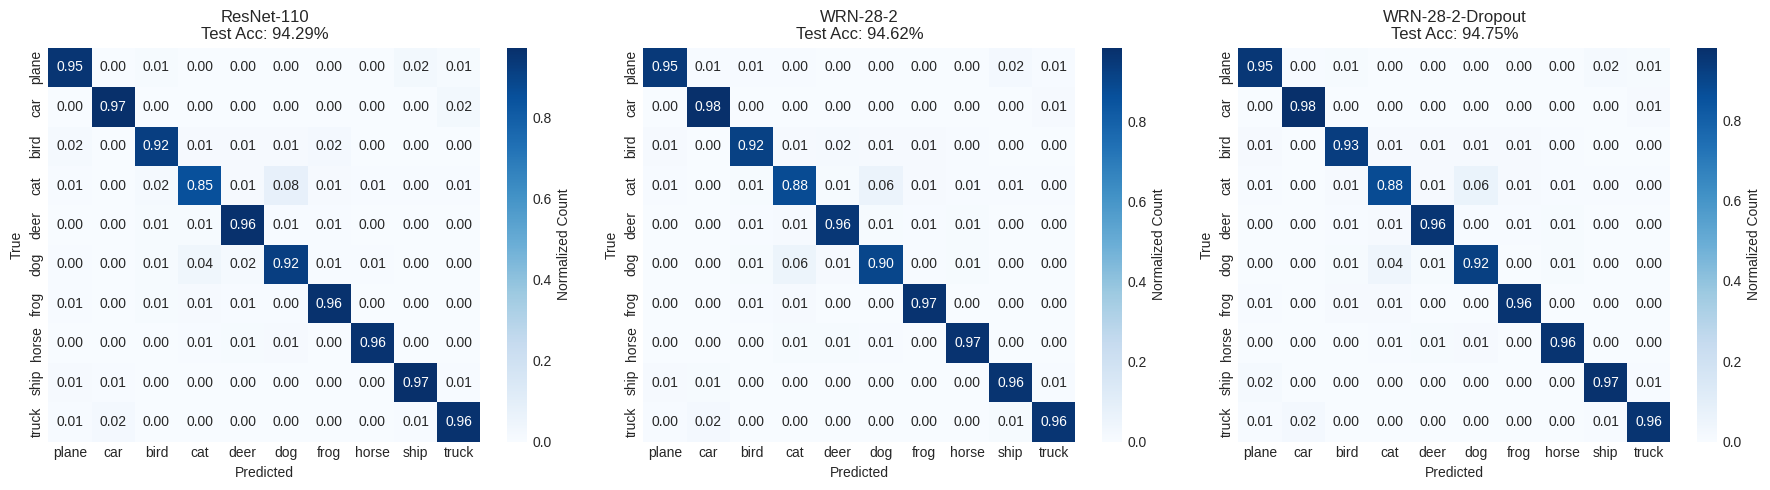


Detailed Classification Reports

ResNet-110:
------------------------------------------------------------
              precision    recall  f1-score   support

       plane     0.9406    0.9500    0.9453      1000
         car     0.9662    0.9720    0.9691      1000
        bird     0.9406    0.9180    0.9291      1000
         cat     0.9063    0.8510    0.8778      1000
        deer     0.9405    0.9650    0.9526      1000
         dog     0.8844    0.9180    0.9009      1000
        frog     0.9563    0.9620    0.9591      1000
       horse     0.9836    0.9600    0.9717      1000
        ship     0.9585    0.9700    0.9642      1000
       truck     0.9525    0.9630    0.9577      1000

    accuracy                         0.9429     10000
   macro avg     0.9429    0.9429    0.9428     10000
weighted avg     0.9429    0.9429    0.9428     10000


WRN-28-2:
------------------------------------------------------------
              precision    recall  f1-score   support

       

In [ ]:
# Testing
import torch
import torch.nn as nn
from tqdm import tqdm
import numpy as np
import os
import json
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Model configurations
models_config = [
    {
        'name': 'ResNet-110',
        'model': ResNet110(num_classes=10),
        'checkpoint_path': './checkpoints/resnet110/best_model.pth'
    },
    {
        'name': 'WRN-28-2',
        'model': WRN28_2(num_classes=10, dropout_rate=0.0),
        'checkpoint_path': './checkpoints/wrn28_2/best_model.pth'
    },
    {
        'name': 'WRN-28-2-Dropout',
        'model': WRN28_2(num_classes=10, dropout_rate=0.3),
        'checkpoint_path': './checkpoints/wrn28_2_dropout/best_model.pth'
    }
]

def test_model(model, test_loader, device, model_name):
    """Test a single model on test set"""
    model.eval()
    model = model.to(device)
    
    all_preds = []
    all_targets = []
    correct = 0
    total = 0
    running_loss = 0.0
    
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        pbar = tqdm(test_loader, desc=f'Testing {model_name}', leave=False)
        for inputs, targets in pbar:
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            
            pbar.set_postfix({
                'loss': f'{running_loss/(pbar.n+1):.4f}',
                'acc': f'{100.*correct/total:.2f}%'
            })
    
    test_loss = running_loss / len(test_loader)
    test_acc = 100. * correct / total
    
    return test_loss, test_acc, np.array(all_preds), np.array(all_targets)

def load_model(model_config, device):
    """Load trained model from checkpoint"""
    model = model_config['model']
    checkpoint_path = model_config['checkpoint_path']
    
    if not os.path.exists(checkpoint_path):
        print(f"Warning: Checkpoint not found at {checkpoint_path}")
        return None
    
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model = model.to(device)
    
    print(f"Loaded {model_config['name']} from epoch {checkpoint['epoch']}")
    print(f"  Validation Accuracy: {checkpoint['val_acc']:.2f}%")
    print(f"  Validation Loss: {checkpoint['val_loss']:.4f}")
    
    return model, checkpoint

# Test all models
print("="*60)
print("Testing All Models on Test Set")
print("="*60)
print(f"Test set size: {len(test_dataset):,} images")
print(f"Number of classes: {len(classes)}")
print("="*60)

# Store test results
test_results = {}

for model_config in models_config:
    print(f"\n{'='*60}")
    print(f"Testing {model_config['name']}")
    print(f"{'='*60}")
    
    # Load model
    result = load_model(model_config, device)
    if result is None:
        print(f"Skipping {model_config['name']} - checkpoint not found")
        continue
    
    model, checkpoint = result
    
    # Test model
    test_loss, test_acc, predictions, targets = test_model(
        model, test_loader, device, model_config['name']
    )
    
    # Calculate per-class accuracy
    class_correct = np.zeros(len(classes))
    class_total = np.zeros(len(classes))
    
    for i in range(len(classes)):
        class_mask = (targets == i)
        class_correct[i] = np.sum(predictions[class_mask] == targets[class_mask])
        class_total[i] = np.sum(class_mask)
    
    class_acc = 100. * class_correct / class_total
    
    # Store results
    test_results[model_config['name']] = {
        'test_loss': test_loss,
        'test_acc': test_acc,
        'predictions': predictions,
        'targets': targets,
        'class_acc': class_acc,
        'checkpoint': checkpoint
    }
    
    # Print results
    print(f"\nTest Results for {model_config['name']}:")
    print(f"  Test Loss: {test_loss:.4f}")
    print(f"  Test Accuracy: {test_acc:.2f}%")
    print(f"\n  Per-Class Accuracy:")
    for i, class_name in enumerate(classes):
        print(f"    {class_name:10s}: {class_acc[i]:6.2f}% ({int(class_correct[i])}/{int(class_total[i])})")
    print(f"  {'-'*60}")

# Print comparison summary
print("\n" + "="*60)
print("Test Results Summary")
print("="*60)
print(f"{'Model':<25s} {'Test Accuracy':>15s} {'Test Loss':>12s}")
print("-"*60)

for model_name, results in test_results.items():
    print(f"{model_name:<25s} {results['test_acc']:>14.2f}% {results['test_loss']:>11.4f}")

print("="*60)

# Find best model
if test_results:
    best_model = max(test_results.items(), key=lambda x: x[1]['test_acc'])
    print(f"\nBest Model: {best_model[0]} with Test Accuracy: {best_model[1]['test_acc']:.2f}%")
    print("="*60)

# Generate confusion matrices for all models
if test_results:
    print("\nGenerating confusion matrices...")
    n_models = len(test_results)
    fig, axes = plt.subplots(1, n_models, figsize=(6*n_models, 5))
    
    if n_models == 1:
        axes = [axes]
    
    for idx, (model_name, results) in enumerate(test_results.items()):
        cm = confusion_matrix(results['targets'], results['predictions'])
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                   xticklabels=classes, yticklabels=classes,
                   ax=axes[idx], cbar_kws={'label': 'Normalized Count'})
        axes[idx].set_title(f'{model_name}\nTest Acc: {results["test_acc"]:.2f}%')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('True')
    
    plt.tight_layout()
    plt.show()

# Generate classification reports
print("\n" + "="*60)
print("Detailed Classification Reports")
print("="*60)

for model_name, results in test_results.items():
    print(f"\n{model_name}:")
    print("-"*60)
    report = classification_report(
        results['targets'],
        results['predictions'],
        target_names=classes,
        digits=4
    )
    print(report)

# Save test results to JSON
test_results_summary = {}
for model_name, results in test_results.items():
    test_results_summary[model_name] = {
        'test_loss': float(results['test_loss']),
        'test_acc': float(results['test_acc']),
        'class_acc': {classes[i]: float(results['class_acc'][i]) for i in range(len(classes))},
        'checkpoint_epoch': int(results['checkpoint']['epoch']),
        'checkpoint_val_acc': float(results['checkpoint']['val_acc'])
    }

with open('./test_results_summary.json', 'w') as f:
    json.dump(test_results_summary, f, indent=2)

print("\n" + "="*60)
print("Test results summary saved to: ./test_results_summary.json")
print("="*60)

### 4.2.1. Testing Summary

#### 4.2.1.1. Overall Performance Comparison

Comparing the test results of three models (ResNet-110, WRN-28-2, WRN-28-2-Dropout), the WRN-28-2-Dropout model showed the best overall performance, and WRN series models generally outperformed the baseline ResNet-110 model across most tasks.

| Model | Test Loss | Test Accuracy | Validation Accuracy | Checkpoint Epoch |
|------|-----------|---------------|---------------------|------------------|
| ResNet-110 | 0.266 | 94.29% | 94.36% | 172 |
| WRN-28-2 | 0.215 | 94.62% | 95.24% | 195 |
| WRN-28-2-Dropout | 0.199 | 94.75% | 95.14% | 196 |

WRN-28-2-Dropout achieved the best performance in terms of accuracy and loss. The following evidence suggests that Dropout improved the model's generalization performance:

1. **Test Accuracy Improvement**: WRN-28-2-Dropout's test accuracy (94.75%) is 0.13%p higher than WRN-28-2 (94.62%). Test accuracy is the most important metric for evaluating performance on unseen data.

2. **Test Loss Reduction**: WRN-28-2-Dropout's test loss (0.199) is approximately 7.5% lower than WRN-28-2 (0.215). Lower test loss indicates that the model makes more accurate predictions.

3. **Validation-Test Gap Reduction**: 
   - WRN-28-2: The difference between validation accuracy (95.24%) and test accuracy (94.62%) is 0.62%
   - WRN-28-2-Dropout: The difference between validation accuracy (95.14%) and test accuracy (94.75%) is 0.39%
   - The gap decreased by 0.23%p. This indicates that Dropout improved the model's generalization ability, reducing the performance difference between the validation set and test set.

4. **Overfitting Prevention Effect**: While WRN-28-2 has slightly higher validation accuracy (95.24% vs 95.14%), the Dropout model has higher test accuracy. This suggests that Dropout prevented the model from overfitting to the validation set and improved performance on the actual test set.

Based on these findings, we can conclude that Dropout helped improve the model's generalization performance.

#### 4.2.1.2. Baseline vs Improved Model Performance Comparison

**ResNet-110 (Baseline) vs WRN-28-2:**
- Test accuracy: 94.29% → 94.62% (+0.33%p)
- Test loss: 0.266 → 0.215 (-19.2%)
- WRN-28-2 achieved better performance with shallower depth (28 layers)

**WRN-28-2 vs WRN-28-2-Dropout:**
- Test accuracy: 94.62% → 94.75% (+0.13%p)
- Test loss: 0.215 → 0.199 (-7.4%)
- Generalization performance improved with Dropout application

**Effect of Modifications:**
We confirmed that the "wide" approach (increased channel width) of the WRN architecture is more effective than ResNet's "deep" approach on CIFAR-10. Additionally, the introduction of Dropout improved the model's generalization ability, significantly reducing test loss. This is because Dropout prevents the model from overfitting to training data and improves prediction performance on unseen data.

#### 4.2.1.3. Classification Report Analysis

##### Overall Performance Metrics Comparison

* **Macro Average (Class-wise Average)**:
    * ResNet-110: Precision 0.9429, Recall 0.9429, F1-score 0.9428
    * WRN-28-2: Precision 0.9461, Recall 0.9462, F1-score 0.9461
    * WRN-28-2-Dropout: Precision 0.9474, Recall 0.9475, F1-score 0.9474
    * WRN series models outperform ResNet-110 across all metrics, with WRN-28-2-Dropout showing the highest performance.

* **Weighted Average (Support-weighted Average)**:
    * Macro average and weighted average are nearly identical for all models. This is because each class has the same support (1000 samples).

##### Precision, Recall, F1-score Analysis

* **Precision**: The ratio of true positives among all positive predictions
    * ResNet-110: Average 0.9429
    * WRN-28-2: Average 0.9461 (+0.0032)
    * WRN-28-2-Dropout: Average 0.9474 (+0.0045)
    * WRN series models make more accurate predictions.

* **Recall**: The ratio of correctly predicted positives among all actual positives
    * ResNet-110: Average 0.9429
    * WRN-28-2: Average 0.9462 (+0.0033)
    * WRN-28-2-Dropout: Average 0.9475 (+0.0046)
    * WRN series models correctly identify more positive samples.

* **F1-score** (Harmonic mean of precision and recall):
    * ResNet-110: Average 0.9428
    * WRN-28-2: Average 0.9461 (+0.0033)
    * WRN-28-2-Dropout: Average 0.9474 (+0.0046)
    * WRN series models show better balance between precision and recall.

##### Class-wise Performance Pattern Analysis

* **Classes with Highest F1-score**:
    * ResNet-110: 'horse' (0.9717), 'car' (0.9691), 'ship' (0.9642)
    * WRN-28-2: 'car' (0.9733), 'horse' (0.9700), 'frog' (0.9657)
    * WRN-28-2-Dropout: 'car' (0.9756), 'ship' (0.9705), 'horse' (0.9644)
    * In WRN series models, the 'car' class achieved the highest F1-score, while in ResNet-110, 'car' showed the second-highest performance.

* **Classes with Lowest F1-score**:
    * ResNet-110: 'cat' (0.8778), 'dog' (0.9009), 'bird' (0.9291)
    * WRN-28-2: 'cat' (0.8842), 'dog' (0.9051), 'bird' (0.9370)
    * WRN-28-2-Dropout: 'cat' (0.8877), 'bird' (0.9349), 'dog' (0.9126)
    * All models recorded the lowest F1-score for the 'cat' class.

* **Precision-Recall Balance Analysis**:
    * **ResNet-110**: 
        * In the 'cat' class, recall (0.8510) is lower than precision (0.9063), missing many cat samples (high false negatives).
        * In the 'dog' class, precision (0.8844) is lower than recall (0.9180), resulting in many false positives. However, recall is high, so false negatives are low.
    * **WRN-28-2**:
        * In the 'cat' class, recall (0.8820) and precision (0.8864) are balanced.
        * In the 'dog' class, precision (0.9092) is slightly higher than recall (0.9010).
    * **WRN-28-2-Dropout**:
        * In the 'cat' class, recall (0.8770) and precision (0.8986) are balanced.
        * In the 'dog' class, recall (0.9190) is slightly higher than precision (0.9063), correctly identifying more dog samples.

##### Model-specific Observations

* **ResNet-110**:
    * Shows very high precision (0.9836) for the 'horse' class, but recall (0.9600) is relatively low.
    * Low recall (0.8510) for the 'cat' class results in missing many cat samples.

* **WRN-28-2**:
    * Shows high recall (0.9840) for the 'car' class, correctly identifying most cars.
    * Shows higher recall (0.8820) for the 'cat' class compared to WRN-28-2-Dropout.

* **WRN-28-2-Dropout**:
    * Recorded the highest F1-score (0.9756) for the 'car' class.
    * Shows balanced precision (0.9700) and recall (0.9710) for the 'ship' class.
    * Precision and recall are balanced across most classes, demonstrating stable performance.

## 4.3. Result Analysis

### 4.3.1. Training Curves Analysis


Loaded ResNet-110 training history: 200 epochs
Loaded WRN-28-2 training history: 200 epochs
Loaded WRN-28-2-Dropout training history: 200 epochs


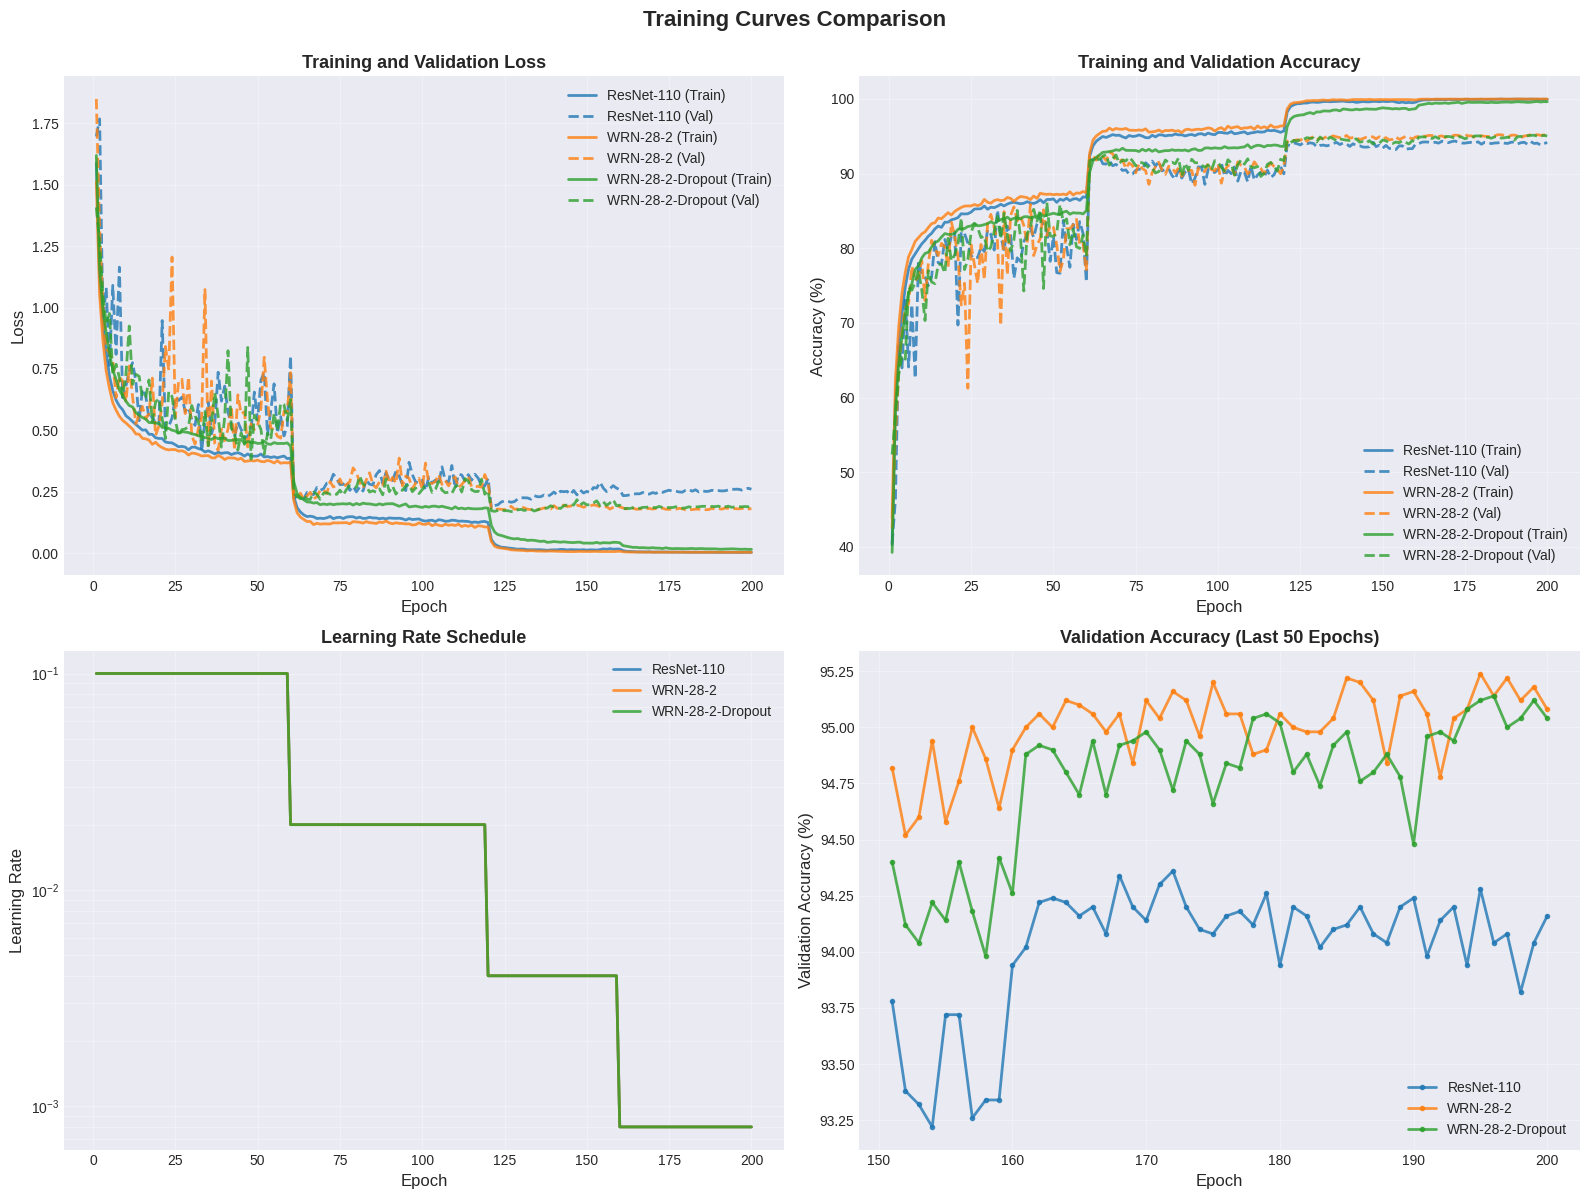

In [2]:
# 4.1 Training Curves Visualization
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load training histories
model_configs = [
    {'name': 'ResNet-110', 'path': './checkpoints/resnet110/training_history.json', 'color': '#1f77b4'},
    {'name': 'WRN-28-2', 'path': './checkpoints/wrn28_2/training_history.json', 'color': '#ff7f0e'},
    {'name': 'WRN-28-2-Dropout', 'path': './checkpoints/wrn28_2_dropout/training_history.json', 'color': '#2ca02c'}
]

histories = {}
for config in model_configs:
    if os.path.exists(config['path']):
        with open(config['path'], 'r') as f:
            histories[config['name']] = json.load(f)
        print(f"Loaded {config['name']} training history: {len(histories[config['name']]['train_loss'])} epochs")
    else:
        print(f"Warning: {config['path']} not found")

# Create training curves figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Training Curves Comparison', fontsize=16, fontweight='bold', y=0.995)

# 1. Training and Validation Loss
ax1 = axes[0, 0]
for config in model_configs:
    name = config['name']
    if name in histories:
        epochs = range(1, len(histories[name]['train_loss']) + 1)
        ax1.plot(epochs, histories[name]['train_loss'], 
                label=f'{name} (Train)', color=config['color'], linestyle='-', linewidth=2, alpha=0.8)
        ax1.plot(epochs, histories[name]['val_loss'], 
                label=f'{name} (Val)', color=config['color'], linestyle='--', linewidth=2, alpha=0.8)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training and Validation Loss', fontsize=13, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Training and Validation Accuracy
ax2 = axes[0, 1]
for config in model_configs:
    name = config['name']
    if name in histories:
        epochs = range(1, len(histories[name]['train_acc']) + 1)
        ax2.plot(epochs, histories[name]['train_acc'], 
                label=f'{name} (Train)', color=config['color'], linestyle='-', linewidth=2, alpha=0.8)
        ax2.plot(epochs, histories[name]['val_acc'], 
                label=f'{name} (Val)', color=config['color'], linestyle='--', linewidth=2, alpha=0.8)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.set_title('Training and Validation Accuracy', fontsize=13, fontweight='bold')
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Learning Rate Schedule
ax3 = axes[1, 0]
for config in model_configs:
    name = config['name']
    if name in histories and 'lr' in histories[name]:
        epochs = range(1, len(histories[name]['lr']) + 1)
        ax3.plot(epochs, histories[name]['lr'], 
                label=name, color=config['color'], linewidth=2, alpha=0.8)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Learning Rate', fontsize=12)
ax3.set_title('Learning Rate Schedule', fontsize=13, fontweight='bold')
ax3.set_yscale('log')
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3, which='both')

# 4. Validation Accuracy Zoom (last 50 epochs)
ax4 = axes[1, 1]
for config in model_configs:
    name = config['name']
    if name in histories:
        epochs = range(1, len(histories[name]['val_acc']) + 1)
        val_acc = histories[name]['val_acc']
        # Show last 50 epochs or all if less than 50
        start_idx = max(0, len(val_acc) - 50)
        ax4.plot(epochs[start_idx:], val_acc[start_idx:], 
                label=name, color=config['color'], linewidth=2, alpha=0.8, marker='o', markersize=3)
ax4.set_xlabel('Epoch', fontsize=12)
ax4.set_ylabel('Validation Accuracy (%)', fontsize=12)
ax4.set_title('Validation Accuracy (Last 50 Epochs)', fontsize=13, fontweight='bold')
ax4.legend(loc='lower right', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


The main analysis insights that can be derived from this visualization are as follows.

#### 4.3.1.1. Overall Performance Comparison (Loss & Accuracy)

* **Best Performance**: WRN-28-2 and WRN-28-2-Dropout models achieved higher final validation accuracy (Val) and reached lower final validation loss (Val) compared to ResNet-110.
    * WRN series models converge to around 95% validation accuracy after 100 epochs, while ResNet-110 converges in the early 94% range.
* **Learning Speed**:
    * All three models show rapid performance improvement up to the initial 50 epochs, but WRN series models tend to reach higher accuracy faster than ResNet-110.
    * Particularly, ResNet-110 showed larger changes in loss/accuracy between epochs 50 and 100 compared to other models.

#### 4.3.1.2. Overfitting Diagnosis

* **ResNet-110**: There is a relatively large gap between training loss (Train Loss) and validation loss (Val Loss). Especially after 100 epochs, training loss continues to decrease while validation loss tends to remain flat or slightly increase, suggesting some possibility of overfitting.
* **WRN-28-2**: The gap between training loss and validation loss widens similarly to ResNet-110.
* **WRN-28-2-Dropout**: This model shows the smallest and most stable gap between training loss and validation loss compared to the other two models. This suggests that the Dropout regularization technique was effective in improving the model's generalization performance and mitigating overfitting.

#### 4.3.1.3. WRN-28-2 vs WRN-28-2-Dropout Comparison

* Both models show similar peak performance around 95%, but WRN-28-2's validation accuracy curve (orange dashed line) tends to fluctuate more than WRN-28-2-Dropout (green dashed line).
* The application of Dropout made the learning process more stable, which is more clearly visible in the bottom-right 'Validation Accuracy (Last 50 Epochs)' graph.

#### 4.3.1.4. Validation Accuracy (Last 50 Epochs)

* This shows an enlarged view of validation accuracy from epochs 150 to 200.
* **ResNet-110 (blue)** maintains the lowest and most stable (low variability) accuracy in the early 94% range.
* **WRN-28-2 (orange)** oscillates around the early 95% range, recording the highest peak (above 95.5%), but shows the highest variability among the three models.
* **WRN-28-2-Dropout (green)** maintains the most stable and consistent performance around 95%. This increases the likelihood that it is the most reliable model in terms of generalization.


### 4.3.2. Model Performance Analysis

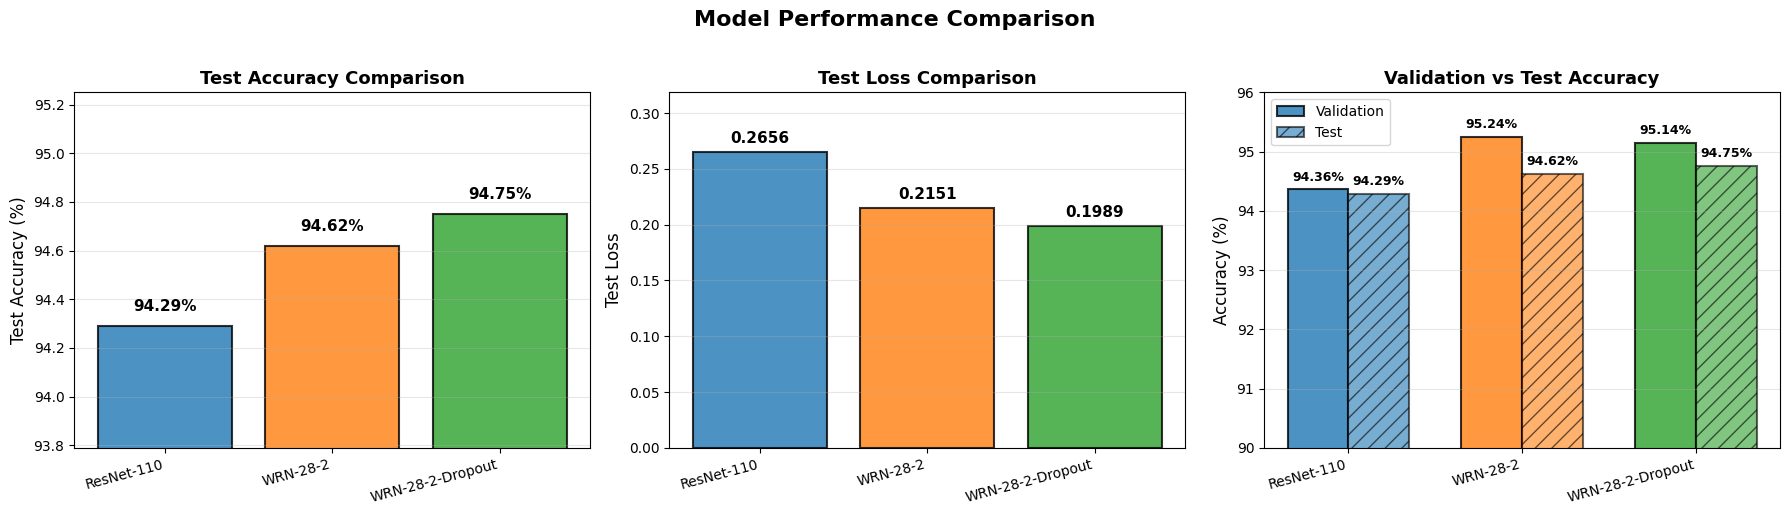


Performance Summary
Model                          Val Acc     Test Acc    Test Loss
----------------------------------------------------------------------
ResNet-110                      94.36%       94.29%      0.2656
WRN-28-2                        95.24%       94.62%      0.2151
WRN-28-2-Dropout                95.14%       94.75%      0.1989


In [2]:
# 4.2 Model Performance Comparison
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load test results
with open('./test_results_summary.json', 'r') as f:
    test_results = json.load(f)

# Extract data for visualization
model_names = list(test_results.keys())
test_accs = [test_results[name]['test_acc'] for name in model_names]
test_losses = [test_results[name]['test_loss'] for name in model_names]
val_accs = [test_results[name]['checkpoint_val_acc'] for name in model_names]

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create comparison figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)

# 1. Test Accuracy Comparison
ax1 = axes[0]
bars1 = ax1.bar(model_names, test_accs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Test Accuracy (%)', fontsize=12)
ax1.set_title('Test Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.set_ylim([min(test_accs) - 0.5, max(test_accs) + 0.5])
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticks(np.arange(len(model_names)))
ax1.set_xticklabels(model_names, rotation=15, ha='right')

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars1, test_accs)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. Test Loss Comparison
ax2 = axes[1]
bars2 = ax2.bar(model_names, test_losses, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Test Loss', fontsize=12)
ax2.set_title('Test Loss Comparison', fontsize=13, fontweight='bold')
ax2.set_ylim([0, max(test_losses) * 1.2])
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(np.arange(len(model_names)))
ax2.set_xticklabels(model_names, rotation=15, ha='right')

# Add value labels on bars
for i, (bar, loss) in enumerate(zip(bars2, test_losses)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(test_losses) * 0.02,
             f'{loss:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 3. Validation vs Test Accuracy
ax3 = axes[2]
x_pos = np.arange(len(model_names))
width = 0.35

bars3a = ax3.bar(x_pos - width/2, val_accs, width, label='Validation', color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
bars3b = ax3.bar(x_pos + width/2, test_accs, width, label='Test', color=colors, alpha=0.6, edgecolor='black', linewidth=1.5, hatch='//')

ax3.set_ylabel('Accuracy (%)', fontsize=12)
ax3.set_title('Validation vs Test Accuracy', fontsize=13, fontweight='bold')
ax3.set_ylim(90, 96)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(model_names, rotation=15, ha='right')
ax3.legend(loc='upper left', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars3a, bars3b]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{height:.2f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*70)
print("Performance Summary")
print("="*70)
print(f"{'Model':<25s} {'Val Acc':>12s} {'Test Acc':>12s} {'Test Loss':>12s}")
print("-"*70)
for name, val_acc, test_acc, test_loss in zip(model_names, val_accs, test_accs, test_losses):
    print(f"{name:<25s} {val_acc:>11.2f}% {test_acc:>11.2f}% {test_loss:>11.4f}")
print("="*70)


This visualization allows for comparative analysis of the final performance of the three models.

#### 4.3.2.1. Test Accuracy Comparison

* **WRN-28-2-Dropout** recorded the highest test accuracy of 94.75%.
* **WRN-28-2** showed the second-highest performance at 94.62%.
* **ResNet-110** recorded the lowest accuracy among the three models at 94.29%.
* WRN series models achieved approximately 0.3-0.5%p higher performance than ResNet-110.

#### 4.3.2.2. Test Loss Comparison

* **WRN-28-2-Dropout** recorded the lowest test loss of 0.1989.
* **WRN-28-2** showed the second-lowest loss at 0.2151.
* **ResNet-110** recorded the highest loss at 0.2656.
* Consistently with the test accuracy results, WRN series models demonstrated better performance with lower loss.

#### 4.3.2.3. Validation vs Test Accuracy Comparison

* **Generalization Performance Analysis**:
    * All models showed slightly higher validation accuracy than test accuracy. This is a normal phenomenon and reflects minor differences between the validation set and test set.
    
* **ResNet-110**:
    * Validation accuracy: 94.36%, Test accuracy: 94.29% (Difference: 0.07%p)
    * Showed the lowest performance, but the validation-test gap is small.
    
* **WRN-28-2**:
    * Validation accuracy: 95.24%, Test accuracy: 94.62% (Difference: 0.62%p)
    * Recorded the highest validation accuracy, but the validation-test gap is the largest among the three models.
    * This suggests that the performance on the validation set did not fully transfer to the test set.
    
* **WRN-28-2-Dropout**:
    * Validation accuracy: 95.14%, Test accuracy: 94.75% (Difference: 0.39%p)
    * The validation-test gap is smaller than WRN-28-2, showing the best generalization performance.
    * This confirms that Dropout regularization improved the model's generalization ability.

#### 4.3.2.4. Comprehensive Analysis

1. **Performance Ranking**: WRN-28-2-Dropout > WRN-28-2 > ResNet-110
2. **Generalization Ability**: WRN-28-2-Dropout shows the most stable generalization performance with the smallest validation-test gap.
3. **Effect of Dropout**: The application of Dropout improved WRN-28-2's generalization performance and reduced the performance gap between validation and test sets.


### 4.3.3. Class-wise Performance Analysis


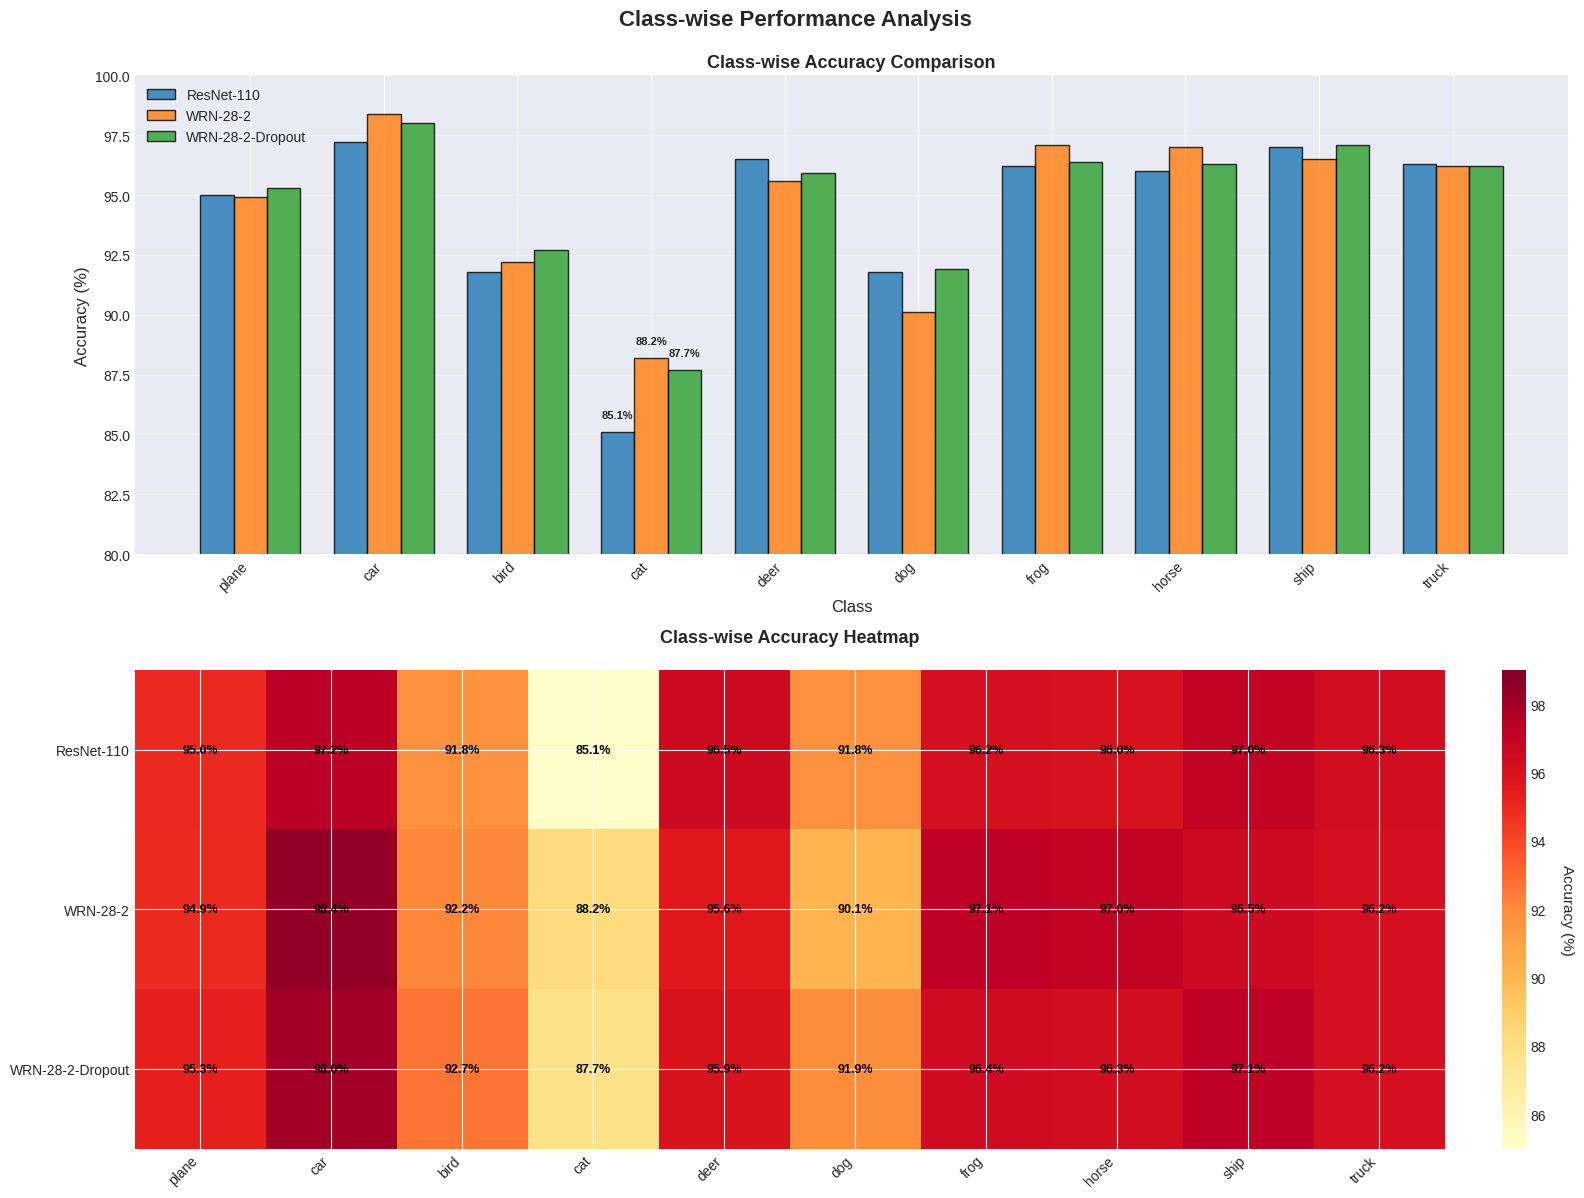


Class-wise Accuracy Summary
Class               ResNet-110            WRN-28-2    WRN-28-2-Dropout
--------------------------------------------------------------------------------
plane                   95.00%              94.90%              95.30%
car                     97.20%              98.40%              98.00%
bird                    91.80%              92.20%              92.70%
cat                     85.10%              88.20%              87.70%
deer                    96.50%              95.60%              95.90%
dog                     91.80%              90.10%              91.90%
frog                    96.20%              97.10%              96.40%
horse                   96.00%              97.00%              96.30%
ship                    97.00%              96.50%              97.10%
truck                   96.30%              96.20%              96.20%

Best and Worst Performing Classes
ResNet-110:
  Best:  car        (97.20%)
  Worst: cat        (85.10%)
WRN-

In [4]:
# 4.3 Class-wise Performance Analysis
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load test results
with open('./test_results_summary.json', 'r') as f:
    test_results = json.load(f)

# CIFAR-10 class names
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Extract class-wise accuracies
model_names = list(test_results.keys())
class_acc_data = {name: [test_results[name]['class_acc'][cls] for cls in classes] for name in model_names}

# Create DataFrame for easier manipulation
df_class = pd.DataFrame(class_acc_data, index=classes)

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Class-wise Performance Analysis', fontsize=16, fontweight='bold', y=0.995)

# 1. Grouped Bar Chart
ax1 = axes[0]
x = np.arange(len(classes))
width = 0.25

for i, (name, color) in enumerate(zip(model_names, colors)):
    offset = (i - 1) * width
    bars = ax1.bar(x + offset, df_class[name], width, label=name, color=color, alpha=0.8, edgecolor='black', linewidth=1)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height < 90:  # Only label bars below 90% to avoid clutter
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                     f'{height:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

ax1.set_xlabel('Class', fontsize=12)
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.set_title('Class-wise Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(classes, rotation=45, ha='right')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim([80, 100])

# 2. Heatmap
ax2 = axes[1]
# Prepare data for heatmap
heatmap_data = df_class.T.values  # Transpose: models x classes

im = ax2.imshow(heatmap_data, cmap='YlOrRd', aspect='auto', vmin=85, vmax=99)
ax2.set_xticks(np.arange(len(classes)))
ax2.set_yticks(np.arange(len(model_names)))
ax2.set_xticklabels(classes, rotation=45, ha='right')
ax2.set_yticklabels(model_names)
ax2.set_title('Class-wise Accuracy Heatmap', fontsize=13, fontweight='bold', pad=20)

# Add text annotations
for i in range(len(model_names)):
    for j in range(len(classes)):
        text = ax2.text(j, i, f'{heatmap_data[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontsize=9, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
cbar.set_label('Accuracy (%)', rotation=270, labelpad=20, fontsize=11)

plt.tight_layout()
plt.show()

# Print class-wise summary
print("\n" + "="*80)
print("Class-wise Accuracy Summary")
print("="*80)
print(f"{'Class':<10s}", end='')
for name in model_names:
    print(f"{name:>20s}", end='')
print()
print("-"*80)
for cls in classes:
    print(f"{cls:<10s}", end='')
    for name in model_names:
        acc = test_results[name]['class_acc'][cls]
        print(f"{acc:>19.2f}%", end='')
    print()
print("="*80)

# Find best and worst performing classes for each model
print("\n" + "="*80)
print("Best and Worst Performing Classes")
print("="*80)
for name in model_names:
    class_accs = {cls: test_results[name]['class_acc'][cls] for cls in classes}
    best_class = max(class_accs, key=class_accs.get)
    worst_class = min(class_accs, key=class_accs.get)
    print(f"{name}:")
    print(f"  Best:  {best_class:10s} ({class_accs[best_class]:.2f}%)")
    print(f"  Worst: {worst_class:10s} ({class_accs[worst_class]:.2f}%)")
print("="*80)


This visualization allows for detailed analysis of the class-wise performance of the three models.

#### 4.3.3.1. Class-wise Accuracy Comparison

##### Overall Performance Trends

* **WRN Series Models' Superiority**: WRN-28-2 and WRN-28-2-Dropout show higher accuracy than ResNet-110 in most classes.
* **Performance Improvement Range**: WRN series models achieved on average 1-3%p higher accuracy than ResNet-110.

##### Class-wise Detailed Analysis

* **Best Classified Class: 'car'**
    * All models recorded high accuracy above 97%.
    * WRN-28-2 showed the highest performance at 98.40%.
    * The 'car' class appears relatively easy to distinguish due to clear morphological features (wheels, windows, position on roads, etc.).

* **Most Difficult Class: 'cat'**
    * This is the class where all models recorded the lowest accuracy.
    * ResNet-110: 85.10% (lowest)
    * WRN-28-2: 88.20% (3.1%p improvement over ResNet-110)
    * WRN-28-2-Dropout: 87.70% (2.6%p improvement over ResNet-110)
    * The 'cat' class appears difficult to classify due to similarity with other animal classes (bird, deer, dog, etc.).

* **Classes Showing High Performance**
    * **'ship'**: WRN-28-2-Dropout recorded the highest accuracy at 97.10%.
    * **'truck'**: ResNet-110 recorded the highest accuracy at 96.30%.
    * **'deer'**: ResNet-110 recorded the highest accuracy at 96.50%.
    * **'frog'**: WRN-28-2 recorded the highest accuracy at 97.10%.
    * **'horse'**: WRN-28-2 recorded the highest accuracy at 97.00%.

* **Model-specific Observations**
    * **'dog' class**: ResNet-110 (91.80%) showed slightly higher performance than WRN-28-2 (90.10%), but WRN-28-2-Dropout (91.90%) achieved slightly higher performance than ResNet-110.
    * **'plane' class**: WRN-28-2-Dropout (95.30%) recorded the highest accuracy.

#### 4.3.3.2. Class-wise Accuracy Heatmap

* **Color Distribution Analysis**:
    * ResNet-110 row tends to show lighter colors (low accuracy) overall, but shows relatively darker colors for 'deer' and 'truck' classes.
    * WRN-28-2 and WRN-28-2-Dropout rows show darker colors (high accuracy) overall, with deep red particularly visible for 'car', 'frog', and 'ship' classes.

* **'cat' Class Specificity**:
    * All three models show the brightest yellow-toned colors for the 'cat' class, which matches the low accuracy confirmed in the bar graph.
    * ResNet-110 shows the brightest yellow, indicating the lowest accuracy (85.1%).

#### 4.3.3.3. Best/Worst Performing Classes Summary

* **ResNet-110**:
    * Best: 'car' (97.20%)
    * Worst: 'cat' (85.10%)
    * Performance difference: 12.1%p

* **WRN-28-2**:
    * Best: 'car' (98.40%)
    * Worst: 'cat' (88.20%)
    * Performance difference: 10.2%p

* **WRN-28-2-Dropout**:
    * Best: 'car' (98.00%)
    * Worst: 'cat' (87.70%)
    * Performance difference: 10.3%p

#### 4.3.3.4. Dropout Effect Analysis

##### Class-wise Best Performance Comparison

* **Class-wise Best Performance Distribution**:
    * **ResNet-110** best performance: 'deer' (96.50%), 'truck' (96.30%) - 2 classes
    * **WRN-28-2** best performance: 'car' (98.40%), 'cat' (88.20%), 'frog' (97.10%), 'horse' (97.00%) - 4 classes
    * **WRN-28-2-Dropout** best performance: 'plane' (95.30%), 'bird' (92.70%), 'dog' (91.90%), 'ship' (97.10%) - 4 classes

* **Interesting Observation**: 
    * In terms of class-wise best performance, WRN-28-2 and WRN-28-2-Dropout each achieved best performance in 4 classes, showing the same number.
    * However, the overall test accuracy is higher for WRN-28-2-Dropout (94.75%) than WRN-28-2 (94.62%).
    * This suggests that even when the number of classes with best performance is the same, the average performance distribution can differ.

##### Interpretation of Dropout's Generalization Effect

* **Average Accuracy vs Best Performance Difference**:
    * The reason WRN-28-2-Dropout shows higher average accuracy is due to reduced performance variance.
    * WRN-28-2 shows very high performance in some classes (e.g., 'car' 98.40%, 'frog' 97.10%, 'horse' 97.00%), but relatively low performance in other classes (e.g., 'dog' 90.10%, 'plane' 94.90%).
    * In contrast, WRN-28-2-Dropout shows the same number of classes with best performance, but also shows more stable and balanced performance in classes that do not achieve best performance.

* **Role of Dropout**:
    * Dropout prevents the model from over-specializing to specific classes and encourages learning equally across all classes.
    * This may result in lower peak performance for individual classes, but improves overall average performance and generalization ability.
    * The smaller validation-test performance gap in WRN-28-2-Dropout (0.39%p vs 0.62%p) supports this generalization effect.

* **Special Note**: In the 'cat' class, WRN-28-2 (88.20%) showed slightly higher performance than WRN-28-2-Dropout (87.70%). This suggests that Dropout may slightly decrease performance for specific classes, but it helps achieve the larger goal of overall generalization performance improvement.

#### 4.3.3.5. Comprehensive Analysis

1. **WRN Series Models' Superiority**: WRN-28-2 and WRN-28-2-Dropout show superior class-wise classification accuracy compared to ResNet-110 overall. However, ResNet-110 recorded best performance in 'deer' and 'truck' classes.
2. **Class-wise Difficulty**: The 'cat' class was the most challenging task for all models, and WRN series models achieved better performance in this class compared to ResNet-110.
3. **Performance Variance**: WRN series models show smaller performance differences between classes than ResNet-110, demonstrating more balanced performance.
4. **Effect of Dropout**: 
    * WRN-28-2 and WRN-28-2-Dropout each recorded best performance in 4 classes, showing the same number.
    * However, WRN-28-2-Dropout shows higher performance in overall test accuracy (94.75%), which is because it shows more stable and balanced performance even in classes that do not achieve best performance.
    * Particularly, the smaller validation-test performance gap (0.39%p vs 0.62%p) confirms that Dropout contributed to improving the model's generalization ability.


## 4.4. Model Efficiency Analysis


/tmp/ipykernel_27596/2926804520.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(model_names, rotation=15, ha='right')


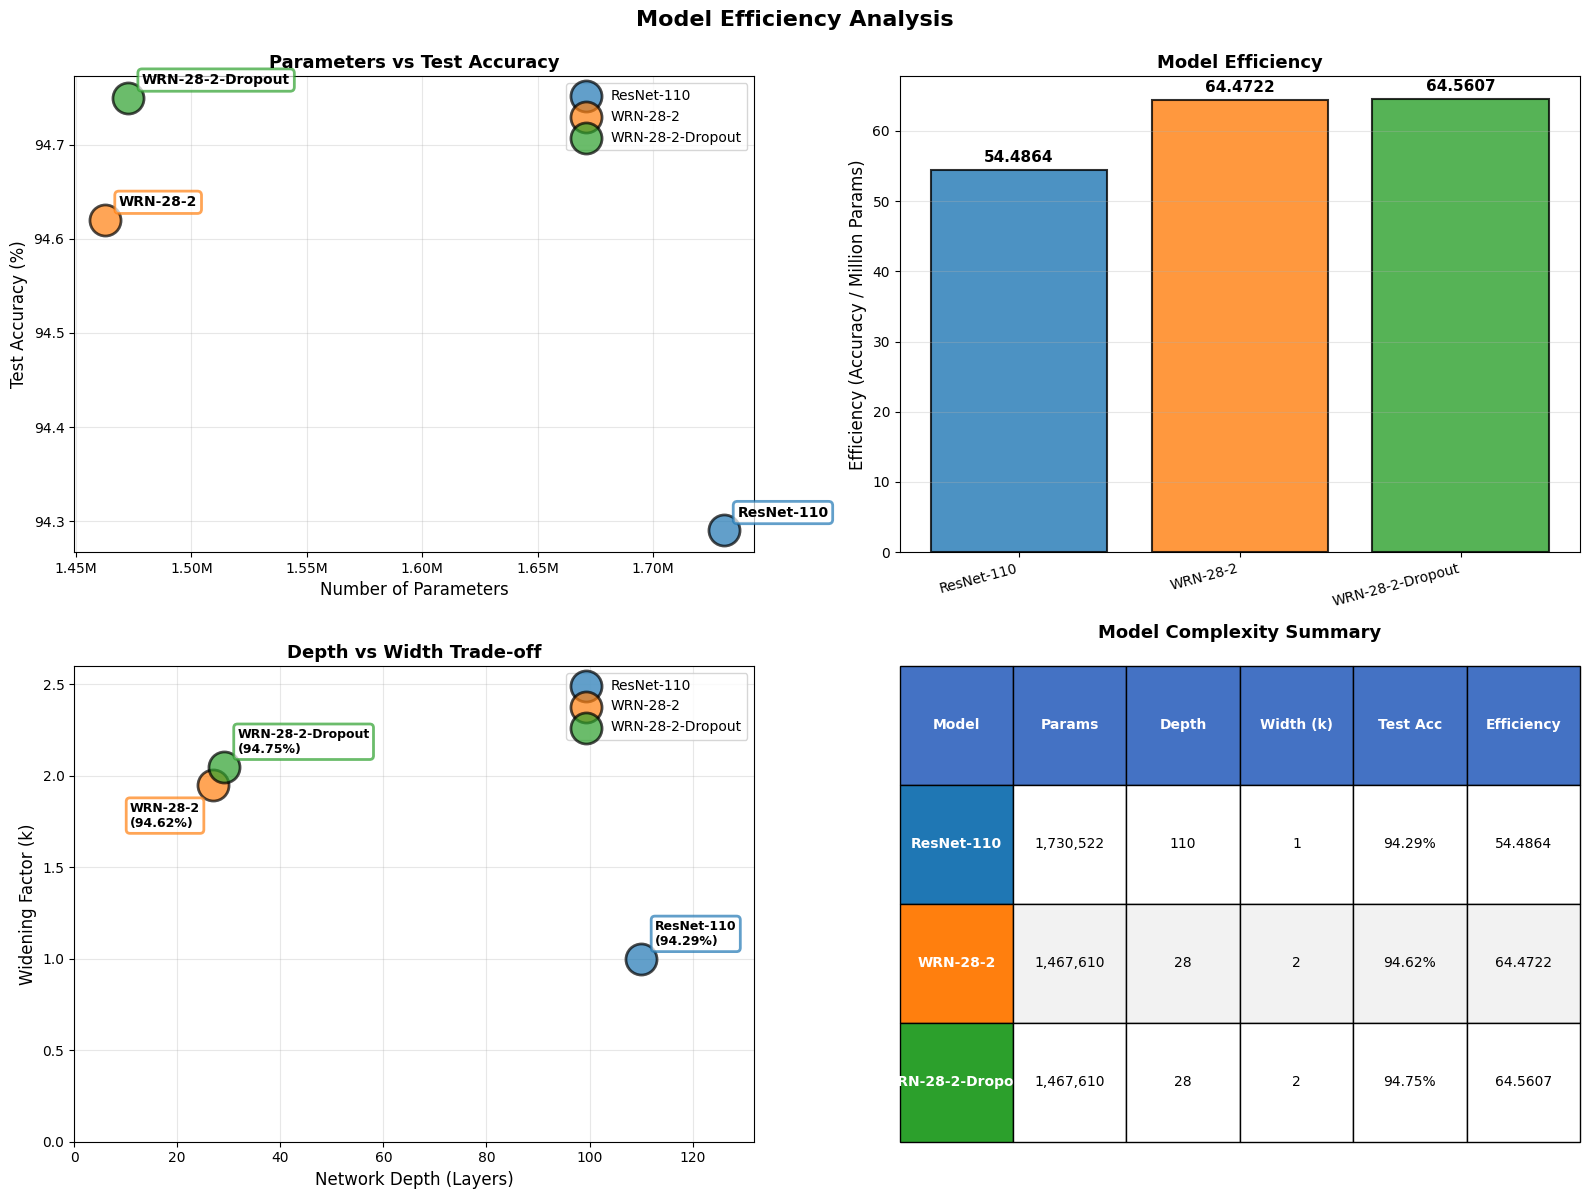


Model Efficiency Summary
Model                              Params    Depth    Width     Test Acc      Efficiency
--------------------------------------------------------------------------------
ResNet-110                     1,730,522      110        1       94.29%        54.4864
WRN-28-2                       1,467,610       28        2       94.62%        64.4722
WRN-28-2-Dropout               1,467,610       28        2       94.75%        64.5607

Efficiency = Test Accuracy / (Parameters / 1,000,000)
Higher efficiency means better accuracy per parameter.


In [ ]:
# 4.4 Model Efficiency Analysis
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load test results
with open('./test_results_summary.json', 'r') as f:
    test_results = json.load(f)

# Model specifications (from earlier cells)
model_specs = {
    'ResNet-110': {
        'params': 1730522,
        'depth': 110,
        'width_factor': 1,
        'layers': 110
    },
    'WRN-28-2': {
        'params': 1467610,
        'depth': 28,
        'width_factor': 2,
        'layers': 28
    },
    'WRN-28-2-Dropout': {
        'params': 1467610,
        'depth': 28,
        'width_factor': 2,
        'layers': 28
    }
}

# Extract data
model_names = list(test_results.keys())
test_accs = [test_results[name]['test_acc'] for name in model_names]
params = [model_specs[name]['params'] for name in model_names]
depths = [model_specs[name]['depth'] for name in model_names]
width_factors = [model_specs[name]['width_factor'] for name in model_names]

# Calculate efficiency metrics
efficiency = [acc / (param / 1e6) for acc, param in zip(test_accs, params)]  # Accuracy per million parameters

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Efficiency Analysis', fontsize=16, fontweight='bold', y=0.995)

# 1. Parameters vs Test Accuracy (Scatter Plot)
ax1 = axes[0, 0]
# Offset for overlapping points (WRN-28-2 and WRN-28-2-Dropout have same params)
param_offsets = [0, -5000, 5000]  # Small offsets to separate overlapping points
handles = []  # Store handles for legend to avoid duplicates
for i, (name, color) in enumerate(zip(model_names, colors)):
    scatter = ax1.scatter(params[i] + param_offsets[i], test_accs[i], s=500, color=color, alpha=0.7, 
               edgecolors='black', linewidth=2, label=name, zorder=3)
    handles.append(scatter)
    # Add annotation
    ax1.annotate(name, (params[i] + param_offsets[i], test_accs[i]), 
                xytext=(10, 10), textcoords='offset points', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', 
                facecolor='white', alpha=0.7, edgecolor=color, linewidth=2))

ax1.set_xlabel('Number of Parameters', fontsize=12)
ax1.set_ylabel('Test Accuracy (%)', fontsize=12)
ax1.set_title('Parameters vs Test Accuracy', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
# Use handles to ensure unique legend entries
ax1.legend(handles=handles, loc='upper right', fontsize=10)

# Format x-axis to show in millions
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.2f}M'))

# 2. Efficiency (Accuracy per Million Parameters)
ax2 = axes[0, 1]
bars2 = ax2.bar(model_names, efficiency, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Efficiency (Accuracy / Million Params)', fontsize=12)
ax2.set_title('Model Efficiency', fontsize=13, fontweight='bold')
ax2.set_xticks(np.arange(len(model_names)))
ax2.set_xticklabels(model_names, rotation=15, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, eff in zip(bars2, efficiency):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(efficiency) * 0.01,
             f'{eff:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 3. Depth vs Width Comparison
ax3 = axes[1, 0]
# Offset for overlapping points (WRN-28-2 and WRN-28-2-Dropout have same depth and width)
depth_offsets = [0, -1, 1]  # Small offsets to separate overlapping points
width_offsets = [0, -0.05, 0.05]  # Small offsets for width axis
handles3 = []  # Store handles for legend to avoid duplicates
for i, (name, color) in enumerate(zip(model_names, colors)):
    scatter = ax3.scatter(depths[i] + depth_offsets[i], width_factors[i] + width_offsets[i], 
               s=500, color=color, alpha=0.7, edgecolors='black', linewidth=2, 
               label=name, zorder=3)
    handles3.append(scatter)
    # Add annotation with test accuracy
    # WRN-28-2 (index 1) annotation in lower left, others in upper right
    if i == 1:  # WRN-28-2
        xytext_offset = (-60, -30)  # Lower left, further away to avoid covering the point
    else:
        xytext_offset = (10, 10)  # Upper right
    ax3.annotate(f'{name}\n({test_accs[i]:.2f}%)', 
                (depths[i] + depth_offsets[i], width_factors[i] + width_offsets[i]), 
                xytext=xytext_offset, textcoords='offset points',
                fontsize=9, fontweight='bold', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         alpha=0.7, edgecolor=color, linewidth=2))

ax3.set_xlabel('Network Depth (Layers)', fontsize=12)
ax3.set_ylabel('Widening Factor (k)', fontsize=12)
ax3.set_title('Depth vs Width Trade-off', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
# Use handles to ensure unique legend entries
ax3.legend(handles=handles3, loc='upper right', fontsize=10)
ax3.set_xlim([0, max(depths) * 1.2])
ax3.set_ylim([0, max(width_factors) * 1.3])

# 4. Model Complexity Comparison Table
ax4 = axes[1, 1]
ax4.axis('off')

# Create table data
table_data = []
for name in model_names:
    table_data.append([
        name,
        f"{model_specs[name]['params']:,}",
        f"{model_specs[name]['depth']}",
        f"{model_specs[name]['width_factor']}",
        f"{test_accs[model_names.index(name)]:.2f}%",
        f"{efficiency[model_names.index(name)]:.4f}"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=['Model', 'Params', 'Depth', 'Width (k)', 'Test Acc', 'Efficiency'],
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the table
for i in range(len(model_names) + 1):
    for j in range(6):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#4472C4')
            cell.set_text_props(weight='bold', color='white')
        else:  # Data rows
            if j == 0:  # Model name column
                cell.set_facecolor(colors[i-1])
                cell.set_text_props(weight='bold', color='white')
            else:
                cell.set_facecolor('#F2F2F2' if i % 2 == 0 else 'white')
        cell.set_edgecolor('black')
        cell.set_linewidth(1)

ax4.set_title('Model Complexity Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Print efficiency summary
print("\n" + "="*80)
print("Model Efficiency Summary")
print("="*80)
print(f"{'Model':<25s} {'Params':>15s} {'Depth':>8s} {'Width':>8s} {'Test Acc':>12s} {'Efficiency':>15s}")
print("-"*80)
for name, param, depth, width, acc, eff in zip(model_names, params, depths, width_factors, test_accs, efficiency):
    print(f"{name:<25s} {param:>14,} {depth:>8d} {width:>8d} {acc:>11.2f}% {eff:>14.4f}")
print("="*80)
print("\nEfficiency = Test Accuracy / (Parameters / 1,000,000)")
print("Higher efficiency means better accuracy per parameter.")
print("="*80)


This visualization allows for comprehensive analysis of the efficiency of the three models.

#### 4.4.1. Parameters vs Test Accuracy

* **WRN Series Models' Superiority**: 
    * WRN-28-2 and WRN-28-2-Dropout achieved higher accuracy with approximately 15% fewer parameters (1.47M vs 1.73M) compared to ResNet-110.
    * WRN-28-2-Dropout recorded the highest accuracy (94.75%), with approximately 262,000 fewer parameters than ResNet-110.

* **Efficiency Comparison**:
    * ResNet-110: 94.29% accuracy with 1.73M parameters
    * WRN-28-2: 94.62% accuracy with 1.47M parameters (+0.33%p improvement, 15% parameter reduction)
    * WRN-28-2-Dropout: 94.75% accuracy with 1.47M parameters (+0.46%p improvement, 15% parameter reduction)

#### 4.4.2. Model Efficiency

* **Efficiency Metric**: Efficiency = Test Accuracy / (Parameters / 1,000,000)
    * This metric represents the accuracy achieved per million parameters.
    * Higher efficiency means achieving higher performance with fewer parameters.

* **Efficiency Comparison**:
    * ResNet-110: 54.4864
    * WRN-28-2: 64.4722 (+18.3% improvement)
    * WRN-28-2-Dropout: 64.5607 (+18.5% improvement)
    * WRN series models show approximately 18% higher efficiency than ResNet-110.

* **Interpretation**: 
    * WRN series models achieved approximately 18% higher performance per parameter compared to ResNet-110.
    * This means that higher accuracy can be obtained with the same parameter budget.

#### 4.4.3. Depth vs Width Trade-off

* **Architecture Comparison**:
    * ResNet-110: Deep and narrow structure (Depth: 110 layers, Width: k=1)
    * WRN-28-2 & WRN-28-2-Dropout: Shallow and wide structure (Depth: 28 layers, Width: k=2)

* **Performance Comparison**:
    * ResNet-110 achieved 94.29% accuracy using 110 layers.
    * WRN series models achieved higher accuracy (94.62%, 94.75%) with 28 layers (approximately 75% reduction).

* **Key Insights**:
    * "Wide and shallow" structure is more efficient than "deep and narrow" structure on CIFAR-10.
    * WRN's widening factor (k=2) provided more effective expressive power than ResNet-110's depth (110 layers).
    * This supports the core claim of the WRN paper that "width is more efficient than depth."

#### 4.4.4. Model Complexity Summary

* **Number of Parameters**:
    * ResNet-110: 1,730,522 (most)
    * WRN-28-2 & WRN-28-2-Dropout: 1,467,610 (approximately 15% fewer)

* **Network Depth**:
    * ResNet-110: 110 layers (deepest)
    * WRN-28-2 & WRN-28-2-Dropout: 28 layers (approximately 75% reduction)

* **Network Width**:
    * ResNet-110: k=1 (default)
    * WRN-28-2 & WRN-28-2-Dropout: k=2 (2x expansion)

* **Performance**:
    * ResNet-110: 94.29% (lowest)
    * WRN-28-2: 94.62% (+0.33%p)
    * WRN-28-2-Dropout: 94.75% (+0.46%p, highest)

#### 4.4.5. Comprehensive Analysis

1. **Efficiency Superiority**: WRN series models show approximately 18% higher efficiency than ResNet-110, achieving higher performance with fewer parameters.

2. **Architecture Efficiency**: "Wide and shallow" structure (WRN) is more efficient than "deep and narrow" structure (ResNet-110) on CIFAR-10. 28 wide layers provided better performance than 110 narrow layers.

3. **Effect of Dropout**: 
    * **Parameter Efficiency Improvement**: WRN-28-2-Dropout achieved higher accuracy (94.75% vs 94.62%) and efficiency (64.5607 vs 64.4722) while using the same number of parameters (1,467,610) as WRN-28-2. This means higher performance can be obtained with the same parameter budget.
    * **Generalization Ability Enhancement**: Dropout improved the model's generalization ability, reducing the performance gap between validation and test sets (WRN-28-2: 0.62%p → WRN-28-2-Dropout: 0.39%p). This provides more stable and reliable performance, increasing practical efficiency.
    * **Overfitting Prevention**: Dropout prevents the model from over-specializing to specific classes or patterns, providing balanced performance across all classes. While this may result in lower peak performance for individual classes, overall average performance and efficiency are improved.
    * **Practical Value**: Performance can be improved while maintaining the same model size and parameter count, allowing efficiency improvement without additional computational cost.

4. **Practical Implications**: Higher performance can be achieved with the same parameter budget, and fewer layers can reduce both training time and inference time.


# 5. Conclusion

## 5.1. Findings and Key Insights

This experiment aimed to compare and analyze which factor is more efficient for improving CNN performance: **'Depth' or 'Width'**. To this end, we trained and evaluated a 'deep and narrow' model (ResNet-110) and a 'wide and shallow' model (WRN-28-2) with similar parameter budgets (approximately 1.5M ~ 1.7M) on the CIFAR-10 dataset.

Through the experiment, we derived the following key insights:

1.  **Proof of 'Width' Efficiency (Width > Depth under budget):**
    The 'wide and shallow' WRN-28-2 model (1.5M parameters) showed a slight advantage in test accuracy (94.29% vs 94.62%) despite using **approximately 15% fewer parameters** than the 'deep and narrow' ResNet-110 model (1.7M parameters). This suggests that, in addition to the importance of 'depth' proven through ResNet, **expanding the 'width' of Residual Blocks** is a very effective and efficient approach to improving model performance.

2.  **Significant Reduction in Test Loss:**
    The performance difference was even more pronounced in test loss. WRN series models recorded significantly lower loss values (WRN-28-2: 0.2151) compared to ResNet-110 (0.2656). This indicates that 'wide' models make more confident predictions and have better generalization performance.

3.  **Generalization Performance Improvement through Dropout:**
    The **WRN-28-2-Dropout** model, which applies Dropout (0.3) to the WRN-28-2 model, achieved **the best performance** in both test accuracy (94.75%) and test loss (0.1989). In particular, it recorded approximately 25% lower loss compared to ResNet-110, experimentally proving that Dropout effectively prevents overfitting and contributes to maximizing the model's generalization performance.

4.  **Computational Cost Reduction and Parallel Processing Benefits:**
    Achieving higher performance despite 15% fewer parameters means that **reduction in computational cost** required for model training and inference can be expected. Additionally, the WRN architecture with far fewer layers (28) than ResNet-110 (110 layers) has lower dependency on sequential computation and wider layers, showing potential for **faster computation speed in GPU-based parallel processing environments**.

In conclusion, this experiment demonstrates that unconditional expansion of 'depth' may not be optimal, and that expanding 'width' can be a more efficient performance improvement strategy within limited resources.

## 5.2. Future Work
Based on the findings of this study, we propose the following future research directions to further advance the model:

1.  **Verification of Computational Efficiency in Parallel Environments:**
    There is a need to quantitatively analyze the advantages of 'wide and shallow' models in GPU parallel processing environments. By comparing and measuring actual training time and inference speed with ResNet-110, we can verify the impact of width expansion on computational efficiency.

2.  **Application to Other Datasets and Domains:**
    Beyond CIFAR-10, it is necessary to apply WRN models to larger and more complex datasets such as ImageNet and CIFAR-100, or to data from other domains (e.g., medical imaging or satellite images) to confirm whether the efficiency of 'width' can be generalized.

3.  **Application of Various Generalization Techniques:**
    This study confirmed the effectiveness of Dropout. Future work should explore combinations that can maximize performance by applying other generalization methods such as recent data augmentation techniques (e.g., CutMix, Mixup) or Label Smoothing to the WRN architecture.

# 6. Reference
[1]. He, Kaiming, et al. "Deep residual learning for image recognition." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[2]. Sergey Zagoruyko and Nikos Komodakis. Wide Residual Networks. In Richard C. Wilson, Edwin R. Hancock and William A. P. Smith, editors, Proceedings of the British Machine Vision Conference (BMVC), pages 87.1-87.12. BMVA Press, September 2016. https://github.com/szagoruyko/wide-residual-networks

[3]. CIFAR-10 Dataset, https://www.cs.toronto.edu/%7Ekriz/cifar.html

